<a href="https://colab.research.google.com/github/flomok/piggy_bank/blob/main/JointBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 仓库地址，我只是把代码都复制到笔记本上了
https://github.com/monologg/JointBERT

In [ ]:
# !wget https://github.com/monologg/JointBERT/archive/refs/heads/master.zip


--2024-08-07 07:50:00--  https://github.com/monologg/JointBERT/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/monologg/JointBERT/zip/refs/heads/master [following]
--2024-08-07 07:50:00--  https://codeload.github.com/monologg/JointBERT/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ] 436.58K  2.06MB/s    in 0.2s    

2024-08-07 07:50:01 (2.06 MB/s) - ‘master.zip’ saved [447055]



In [ ]:
# !unzip master.zip

Archive:  master.zip
00324f60dda4a491b2913bc3065ae93966caea3f
   creating: JointBERT-master/
  inflating: JointBERT-master/.gitignore  
  inflating: JointBERT-master/LICENSE  
  inflating: JointBERT-master/README.md  
   creating: JointBERT-master/data/
   creating: JointBERT-master/data/atis/
   creating: JointBERT-master/data/atis/dev/
  inflating: JointBERT-master/data/atis/dev/label  
  inflating: JointBERT-master/data/atis/dev/seq.in  
  inflating: JointBERT-master/data/atis/dev/seq.out  
  inflating: JointBERT-master/data/atis/intent_label.txt  
  inflating: JointBERT-master/data/atis/slot_label.txt  
   creating: JointBERT-master/data/atis/test/
  inflating: JointBERT-master/data/atis/test/label  
  inflating: JointBERT-master/data/atis/test/seq.in  
  inflating: JointBERT-master/data/atis/test/seq.out  
   creating: JointBERT-master/data/atis/train/
  inflating: JointBERT-master/data/atis/train/label  
  inflating: JointBERT-master/data/atis/train/seq.in  
  inflating: JointBER

# atis data

你提供的数据是一条来自 ATIS（Airline Travel Information System）数据集的示例。这个数据集通常用于训练和评估自然语言处理模型，特别是在意图识别和槽位填充任务中。下面是对这条数据的详细解释：

### 示例数据

- **输入句子（`seq.in`）**:
  ```
  i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
  ```

- **输出标签（`seq.out`）**:
  ```
  O O O O O B-fromloc.city_name O B-depart_time.time I-depart_time.time O O O B-toloc.city_name O B-arrive_time.time O O B-arrive_time.period_of_day
  ```

- **任务类型**: `atis_flight`

### 解释

1. **输入句子**:
   这是一句用户的自然语言请求，描述了他们的航班需求。这句话包含了起始地点、时间、目的地等信息。

2. **输出标签**:
   这些标签是为了标注输入句子中的每个词的类别，用于模型训练。这里的标签是基于实体识别（NER）或槽位填充的任务。

   - `O`：表示该词不属于任何特定的槽位（即“Other”）。
   - `B-fromloc.city_name`：表示该词是起始地点城市名的开始部分。
   - `I-depart_time.time`：表示该词是出发时间的一部分（即“Inside”）。
   - `B-toloc.city_name`：表示该词是目的地城市名的开始部分。
   - `B-arrive_time.time`：表示该词是到达时间的一部分。
   - `B-arrive_time.period_of_day`：表示该词是到达时间的时间段部分（如“morning”）。

### 具体例子

- **i**: `O` (普通词)
- **want**: `O` (普通词)
- **to**: `O` (普通词)
- **fly**: `O` (普通词)
- **from**: `O` (普通词)
- **boston**: `B-fromloc.city_name` (表示起始城市名的开始)
- **at**: `O` (普通词)
- **838**: `B-depart_time.time` (表示出发时间的开始)
- **am**: `I-depart_time.time` (表示出发时间的继续)
- **and**: `O` (普通词)
- **arrive**: `O` (普通词)
- **in**: `O` (普通词)
- **denver**: `B-toloc.city_name` (表示目的城市名的开始)
- **at**: `O` (普通词)
- **1110**: `B-arrive_time.time` (表示到达时间的开始)
- **in**: `O` (普通词)
- **the**: `O` (普通词)
- **morning**: `B-arrive_time.period_of_day` (表示到达时间的时间段)

### 任务类型

- **`atis_flight`**: 表示这是与航班相关的信息提取任务。在这个任务中，你的模型需要从输入句子中提取出航班相关的信息，如起始地点、出发时间、目的地和到达时间等。

这个示例展示了如何将自然语言文本转换为结构化信息，以便用于训练和评估自然语言处理模型。


 ATIS 数据集中的一些标签翻译：

- atis_flight: 航班查询
- atis_restriction: 旅行限制
- atis_ground_service: 地面服务
- atis_abbreviation: 缩略语解释

# /Users/zyb/Desktop/JointBERT-master/data/vocab_process.py

定义了一个 vocab_process 函数，并在脚本执行时**处理两个数据集（atis 和 snips**）。函数的主要任务是从指定的数据目录中**读取标签文件**，处理并生成两个词汇表文件：一个用于意图标签（intent labels），一个用于槽位标签（slot labels）
**加粗文字**







'intent_label.txt'和'slot_label.txt'是根据atis数据集的label、seq.in和seq.out生成的标签文件，分别是意图标签和槽位标签

## vocab_process

In [ ]:
import os

# vocab_process，接收一个参数 data_dir。
# slot_label_vocab 和 intent_label_vocab 是词汇表文件的路径
def vocab_process(data_dir):
    slot_label_vocab = 'slot_label.txt'
    intent_label_vocab = 'intent_label.txt'
  # 1、意图标签处理
# train_dir 是训练数据的目录路径。
    train_dir = os.path.join(data_dir, 'train')
    # intent。打开训练数据目录中的 label 文件进行读取，并同时打开 intent_label_vocab 文件进行写入。
    with open(os.path.join(train_dir, 'label'), 'r', encoding='utf-8') as f_r, open(os.path.join(data_dir, intent_label_vocab), 'w',
                                                                                    encoding='utf-8') as f_w:
    # 从 label 文件中读取每一行，去除前后空白字符，将每行的标签加入 intent_vocab 集合中，确保标签唯一。
        intent_vocab = set()
        for line in f_r:
            line = line.strip()
            intent_vocab.add(line)
# 将额外的标记 "UNK"（表示未知词汇）写入 intent_label_vocab 文件。
        additional_tokens = ["UNK"]
        for token in additional_tokens:
            f_w.write(token + '\n')
# 将 intent_vocab 集合中的标签按字母顺序排序，并写入文件中。
        intent_vocab = sorted(list(intent_vocab))
        for intent in intent_vocab:
            f_w.write(intent + '\n')

    # 2、slot槽位标签处理
    # 打开训练数据目录中的 seq.out 文件进行读取，并同时打开 slot_label_vocab 文件进行写入。
    with open(os.path.join(train_dir, 'seq.out'), 'r', encoding='utf-8') as f_r, open(os.path.join(data_dir, slot_label_vocab), 'w',
                                                                                      encoding='utf-8') as f_w:
    # 从 seq.out 文件中读取每一行，将每行拆分成多个槽位标签，并将每个槽位标签加入 slot_vocab 集合中，确保唯一。
        slot_vocab = set()
        for line in f_r:
            line = line.strip()
            slots = line.split()
            for slot in slots:
                slot_vocab.add(slot)
# 对 slot_vocab 集合中的槽位标签进行排序，排序规则为首先按标签的后两位字符排序，然后按前两位字符排序
        slot_vocab = sorted(list(slot_vocab), key=lambda x: (x[2:], x[:2]))
# 将额外的标记 "PAD"（表示填充标记）和 "UNK"（表示未知标记）写入 slot_label_vocab 文件。
        # Write additional tokens
        additional_tokens = ["PAD", "UNK"]
        for token in additional_tokens:
            f_w.write(token + '\n')
# 将 slot_vocab 集合中的槽位标签按排序顺序写入文件中。
        for slot in slot_vocab:
            f_w.write(slot + '\n')

# 当脚本直接运行时，调用 vocab_process 函数处理 atis 和 snips 数据集。
if __name__ == "__main__":
    vocab_process('/content/drive/MyDrive/joint_bert/JointBERT-master/data/atis')
    vocab_process('/content/drive/MyDrive/joint_bert/JointBERT-master/data/snips')


# /Users/zyb/Desktop/JointBERT-master/model/module.py

这段代码定义了两个神经网络模型的类：`IntentClassifier` 和 `SlotClassifier`，它们都继承自 `torch.nn.Module`。下面是对这两个类的详细解释：

### 1. `IntentClassifier` 类

#### 目的：
用于意图分类任务的神经网络模型。

#### 代码详解：

```python
class IntentClassifier(nn.Module):
    def __init__(self, input_dim, num_intent_labels, dropout_rate=0.):
        super(IntentClassifier, self).__init__()
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(input_dim, num_intent_labels)
```

- **`__init__` 方法**：
  - `input_dim`：输入特征的维度。
  - `num_intent_labels`：意图标签的数量（即输出的维度）。
  - `dropout_rate`：丢弃率，用于控制 dropout 层的丢弃比例。

  **层定义**：
  - **`self.dropout`**：一个 dropout 层，用于在训练过程中防止过拟合。`dropout_rate` 决定了丢弃的概率。
  - **`self.linear`**：一个全连接层，将输入的特征维度映射到意图标签的数量。

```python
    def forward(self, x):
        x = self.dropout(x)
        return self.linear(x)
```

- **`forward` 方法**：
  - `x`：输入特征。
  - **`self.dropout(x)`**：在通过全连接层之前，对输入应用 dropout。
  - **`self.linear(x)`**：将 dropout 后的特征通过全连接层进行映射。

### 2. `SlotClassifier` 类

#### 目的：
用于槽位分类任务的神经网络模型。

#### 代码详解：

```python
class SlotClassifier(nn.Module):
    def __init__(self, input_dim, num_slot_labels, dropout_rate=0.):
        super(SlotClassifier, self).__init__()
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(input_dim, num_slot_labels)
```

- **`__init__` 方法**：
  - `input_dim`：输入特征的维度。
  - `num_slot_labels`：槽位标签的数量（即输出的维度）。
  - `dropout_rate`：丢弃率，用于控制 dropout 层的丢弃比例。

  **层定义**：
  - **`self.dropout`**：一个 dropout 层，用于在训练过程中防止过拟合。
  - **`self.linear`**：一个全连接层，将输入的特征维度映射到槽位标签的数量。

```python
    def forward(self, x):
        x = self.dropout(x)
        return self.linear(x)
```

- **`forward` 方法**：
  - `x`：输入特征。
  - **`self.dropout(x)`**：在通过全连接层之前，对输入应用 dropout。
  - **`self.linear(x)`**：将 dropout 后的特征通过全连接层进行映射。

### 总结

- `IntentClassifier` 和 `SlotClassifier` 都是简单的前馈神经网络，用于分类任务。它们包含一个 dropout 层和一个全连接层。
- **Dropout**：用于减少过拟合，特别是在训练过程中。
- **Linear Layer**：负责将输入映射到目标类别的数量。

## module.py

In [ ]:
import torch.nn as nn

# 用于意图分类任务的神经网络模型。
# input_dim：输入特征的维度。num_intent_labels：意图标签的数量（即输出的维度）。dropout_rate：丢弃率，用于控制 dropout 层的丢弃比例。
class IntentClassifier(nn.Module):
    def __init__(self, input_dim, num_intent_labels, dropout_rate=0.):
        super(IntentClassifier, self).__init__()
        self.dropout = nn.Dropout(dropout_rate)
        # 全连接层，将输入的特征维度映射到意图标签的数量。
        self.linear = nn.Linear(input_dim, num_intent_labels)

    def forward(self, x):
        x = self.dropout(x)
        return self.linear(x)

# 用于槽位分类任务的神经网络模型。
# 输入特征的维度。槽位标签的数量（即输出的维度）
class SlotClassifier(nn.Module):
    def __init__(self, input_dim, num_slot_labels, dropout_rate=0.):
        super(SlotClassifier, self).__init__()
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(input_dim, num_slot_labels)

    def forward(self, x):
        x = self.dropout(x)
        return self.linear(x)


# from .modeling_jointbert import JointBERT
# from .modeling_jointdistilbert import JointDistilBERT
# from .modeling_jointalbert import JointAlbert

JointBERT

In [ ]:
!pip install torchcrf

In [ ]:
!pip show torchcrf


Name: TorchCRF
Version: 1.1.0
Summary: An Implementation of Conditional Random Fields in pytorch
Home-page: https://github.com/s14t284/TorchCRF
Author: Ryuya Ikeda
Author-email: rikeda71@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, torch
Required-by: 


## JointBERT

In [ ]:
import torch
import torch.nn as nn
# from transformers.modeling_bert import BertPreTrainedModel, BertModel, BertConfig
from transformers import BertPreTrainedModel, BertModel, BertConfig
from TorchCRF import CRF#torchcrf 是用于条件随机场 (CRF) 的 PyTorch 实现，用于序列标注任务。
# .module 中的 IntentClassifier 和 SlotClassifier 是自定义的分类器，用于意图分类和槽位分类。
# from .module import IntentClassifier, SlotClassifier

# 联合模型 JointBERT，它结合了 BERT 模型和自定义的意图分类器与槽位分类器，用于同时进行意图分类和槽位标注任务。
class JointBERT(BertPreTrainedModel):
    def __init__(self, config, args, intent_label_lst, slot_label_lst):
        super(JointBERT, self).__init__(config)
        self.args = args
        self.num_intent_labels = len(intent_label_lst)#分别存储意图标签和槽位标签的数量。
        self.num_slot_labels = len(slot_label_lst)
        self.bert = BertModel(config=config)  # Load pretrained bert
# 用于意图分类和槽位分类的自定义分类器。
        self.intent_classifier = IntentClassifier(config.hidden_size, self.num_intent_labels, args.dropout_rate)
        self.slot_classifier = SlotClassifier(config.hidden_size, self.num_slot_labels, args.dropout_rate)
# 如果 args.use_crf 为 True，则初始化 CRF 层，用于序列标注任务。
        if args.use_crf:
            self.crf = CRF(num_tags=self.num_slot_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, token_type_ids, intent_label_ids, slot_labels_ids):
        outputs = self.bert(input_ids, attention_mask=attention_mask,
                            token_type_ids=token_type_ids)  # sequence_output, pooled_output, (hidden_states), (attentions)
        # self.bert 处理输入数据，生成 sequence_output 和 pooled_output。sequence_output 是 BERT 模型的最后一层隐藏状态的输出，pooled_output 是 [CLS] token 对应的输出。
        # output=（sequence_output、pooled_output、 hidden_states 和 attentions）
        sequence_output = outputs[0]# 是BERT 的最后一层隐藏状态的输出=(batch_size, sequence_length, hidden_size)
        pooled_output = outputs[1]  # 是[CLS] token 的输出，经过池化操作得到的向量=(batch_size, hidden_size)
# intent_logits 通过 self.intent_classifier 计算意图分类的 logits。
        intent_logits = self.intent_classifier(pooled_output)#=(batch_size, num_intent_labels)。
        # slot_logits 通过 self.slot_classifier 计算槽位分类的 logits。
        slot_logits = self.slot_classifier(sequence_output)

        total_loss = 0
        # 1. Intent Softmax
        # 如果 intent_label_ids 存在，使用均方误差损失 (MSELoss) 或交叉熵损失 (CrossEntropyLoss) 计算意图损失，并将其加到 total_loss 中。
        # intent_loss_fct 是意图分类的损失函数，通常是 nn.CrossEntropyLoss() 或 nn.MSELoss()，取决于意图标签的数量
        if intent_label_ids is not None:
          # 如果意图标签是二分类（即 self.num_intent_labels == 1），使用均方误差损失 (MSELoss)
            if self.num_intent_labels == 1:
                intent_loss_fct = nn.MSELoss()
# 意图分类的预测logits=intent_logits=logits=(batch_size, num_intent_labels) vs 真实意图标签=(batch_size)（每个样本一个标签）。
# view(-1) 将 intent_logits 重新排列成一维张量，其形状为 (batch_size * num_intent_labels)。这样做是为了使 logits 与标签的形状一致，以便计算损失。
# view(-1) 将 intent_label_ids 重新排列成一维张量，其形状为 (batch_size)。这样做是为了与 logits 进行对比。
                intent_loss = intent_loss_fct(intent_logits.view(-1), intent_label_ids.view(-1))
            else:#如果是多分类（即 self.num_intent_labels > 1），使用交叉熵损失 (CrossEntropyLoss)。
                intent_loss_fct = nn.CrossEntropyLoss()
                # 损失函数期望 input (这里是 intent_logits.view(-1)) 是预测 logits，target (这里是 intent_label_ids.view(-1)) 是实际标签的索引。
                intent_loss = intent_loss_fct(intent_logits.view(-1, self.num_intent_labels), intent_label_ids.view(-1))
            total_loss += intent_loss

        # 2. Slot Softmax
        # 如果 slot_labels_ids 存在，并且 args.use_crf 为 True，使用 CRF 计算槽位损失。
        # 检查是否提供了槽位标签 (slot_labels_ids)。如果 slot_labels_ids 为 None，则不会计算槽位损失。在训练时，这通常是必须的，因为计算损失需要实际标签。
        if slot_labels_ids is not None:
            if self.args.use_crf:#布尔值参数，指示是否使用 CRF 层来计算槽位损失。
            # self.crf: 条件随机场 (CRF) 层，用于处理序列标注任务。
                slot_loss = self.crf(slot_logits, slot_labels_ids, mask=attention_mask.byte(), reduction='mean')
                slot_loss = -1 * slot_loss  # negative log-likelihood
            else:#否则，使用交叉熵损失计算槽位损失。根据 attention_mask 只保留有效部分的损失，并加权到 total_loss 中。
                slot_loss_fct = nn.CrossEntropyLoss(ignore_index=self.args.ignore_index)
                # Only keep active parts of the loss
                if attention_mask is not None:
                    active_loss = attention_mask.view(-1) == 1
                    active_logits = slot_logits.view(-1, self.num_slot_labels)[active_loss]
                    active_labels = slot_labels_ids.view(-1)[active_loss]
                    slot_loss = slot_loss_fct(active_logits, active_labels)
                else:
                    slot_loss = slot_loss_fct(slot_logits.view(-1, self.num_slot_labels), slot_labels_ids.view(-1))
            total_loss += self.args.slot_loss_coef * slot_loss
# outputs[2:]: hidden_states 和 attentions（如果请求的话）
# hidden_states（如果设置了 output_hidden_states=True）：一个元组，包含每一层的隐藏状态，形状为 (batch_size, sequence_length, hidden_size)。
# attentions（如果设置了 output_attentions=True）：一个元组，包含每一层的注意力权重，形状为 (batch_size, num_attention_heads, sequence_length, sequence_length)。
        outputs = ((intent_logits, slot_logits),) + outputs[2:]  # add hidden states and attention if they are here

        outputs = (total_loss,) + outputs
# 将意图 logits 和槽位 logits 以及可能的隐藏状态和注意力信息一起返回。
        return outputs  # (loss), logits, (hidden_states), (attentions) # Logits is a tuple of intent and slot logits


**`使用 CRF`**

self.crf(slot_logits, slot_labels_ids, mask=attention_mask.byte(), reduction='mean'):

slot_logits: 模型对每个 token 的槽位标签的预测 logits，形状为 (batch_size, sequence_length, num_slot_labels)。
slot_labels_ids: 实际的槽位标签，形状为 (batch_size, sequence_length)。
mask=attention_mask.byte(): 注意力掩码，指示模型应关注的 token。attention_mask.byte() 将掩码转换为字节类型，以适应 CRF 的要求。
reduction='mean': 对所有 token 的损失取平均值。
slot_loss = -1 * slot_loss:

CRF 返回的是对数似然损失，因此需要取负值来将其转换为损失值。


**`不使用 CRF`**

  slot_loss_fct: 使用的损失函数，nn.CrossEntropyLoss()，用于计算槽位分类的交叉熵损失。
  ignore_index=self.args.ignore_index:忽略指定的标签索引，在计算损失时不会考虑这些标签。

处理活跃部分的损失：

  attention_mask.view(-1) == 1: 将注意力掩码展平，并找出活跃的 token（掩码值为 1 的部分）。
  active_logits: 仅包含活跃 token 的 logits。
  active_labels: 仅包含活跃 token 的标签。

slot_loss_fct(active_logits, active_labels):计算活跃部分的交叉熵损失。

如果没有 attention_mask:直接计算所有 token 的损失。

self.args.slot_loss_coef: 一个系数，用于调整槽位损失在总损失中的权重。

total_loss: 累加所有损失（意图损失和槽位损失）


**`返回结果`**

outputs: 包含意图 logits 和槽位 logits 以及 BERT 模型返回的其他信息（如隐藏状态和注意力，如果有的话）。
outputs[2:]: 将可能的隐藏状态和注意力信息添加回输出中。
(total_loss,) + outputs: 将总损失 (total_loss) 放在输出的最前面，并返回最终的结果。

**`总结`**

代码块首先检查是否提供了槽位标签，并根据是否使用 CRF 来选择计算槽位损失的方法。
如果使用 CRF，计算 CRF 的负对数似然损失。
如果不使用 CRF，使用交叉熵损失计算槽位分类的损失。
计算得到的槽位损失与总损失 (total_loss) 相加，并将总损失和模型输出一起返回。

JointAlbert

/Users/zyb/Desktop/JointBERT-master/model/modeling_jointalbert.py

In [ ]:
import torch
import torch.nn as nn
from transformers import AlbertPreTrainedModel, AlbertModel, AlbertConfig
from TorchCRF import CRF
# from .module import IntentClassifier, SlotClassifier


class JointAlbert(AlbertPreTrainedModel):
    def __init__(self, config, args, intent_label_lst, slot_label_lst):
        super(JointAlbert, self).__init__(config)
        self.args = args
        self.num_intent_labels = len(intent_label_lst)
        self.num_slot_labels = len(slot_label_lst)
        self.albert = AlbertModel(config=config)  # Load pretrained bert

        self.intent_classifier = IntentClassifier(config.hidden_size, self.num_intent_labels, args.dropout_rate)
        self.slot_classifier = SlotClassifier(config.hidden_size, self.num_slot_labels, args.dropout_rate)

        if args.use_crf:
            self.crf = CRF(num_tags=self.num_slot_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, token_type_ids, intent_label_ids, slot_labels_ids):
        outputs = self.albert(input_ids, attention_mask=attention_mask,
                              token_type_ids=token_type_ids)  # sequence_output, pooled_output, (hidden_states), (attentions)
        sequence_output = outputs[0]
        pooled_output = outputs[1]  # [CLS]

        intent_logits = self.intent_classifier(pooled_output)
        slot_logits = self.slot_classifier(sequence_output)

        total_loss = 0
        # 1. Intent Softmax
        if intent_label_ids is not None:
            if self.num_intent_labels == 1:
                intent_loss_fct = nn.MSELoss()
                intent_loss = intent_loss_fct(intent_logits.view(-1), intent_label_ids.view(-1))
            else:
                intent_loss_fct = nn.CrossEntropyLoss()
                intent_loss = intent_loss_fct(intent_logits.view(-1, self.num_intent_labels), intent_label_ids.view(-1))
            total_loss += intent_loss

        # 2. Slot Softmax
        if slot_labels_ids is not None:
            if self.args.use_crf:
                slot_loss = self.crf(slot_logits, slot_labels_ids, mask=attention_mask.byte(), reduction='mean')
                slot_loss = -1 * slot_loss  # negative log-likelihood
            else:
                slot_loss_fct = nn.CrossEntropyLoss(ignore_index=self.args.ignore_index)
                # Only keep active parts of the loss
                if attention_mask is not None:
                    active_loss = attention_mask.view(-1) == 1
                    active_logits = slot_logits.view(-1, self.num_slot_labels)[active_loss]
                    active_labels = slot_labels_ids.view(-1)[active_loss]
                    slot_loss = slot_loss_fct(active_logits, active_labels)
                else:
                    slot_loss = slot_loss_fct(slot_logits.view(-1, self.num_slot_labels), slot_labels_ids.view(-1))
            total_loss += self.args.slot_loss_coef * slot_loss

        outputs = ((intent_logits, slot_logits),) + outputs[2:]  # add hidden states and attention if they are here

        outputs = (total_loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions) # Logits is a tuple of intent and slot logits


JointDistilBERT
/Users/zyb/Desktop/JointBERT-master/model/modeling_jointdistilbert.py

In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertPreTrainedModel, DistilBertModel, DistilBertConfig
from TorchCRF import CRF
# from .module import IntentClassifier, SlotClassifier


class JointDistilBERT(DistilBertPreTrainedModel):
    def __init__(self, config, args, intent_label_lst, slot_label_lst):
        super(JointDistilBERT, self).__init__(config)
        self.args = args
        self.num_intent_labels = len(intent_label_lst)
        self.num_slot_labels = len(slot_label_lst)
        self.distilbert = DistilBertModel(config=config)  # Load pretrained bert

        self.intent_classifier = IntentClassifier(config.hidden_size, self.num_intent_labels, args.dropout_rate)
        self.slot_classifier = SlotClassifier(config.hidden_size, self.num_slot_labels, args.dropout_rate)

        if args.use_crf:
            self.crf = CRF(num_tags=self.num_slot_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, intent_label_ids, slot_labels_ids):
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)  # last-layer hidden-state, (hidden_states), (attentions)
        sequence_output = outputs[0]
        pooled_output = sequence_output[:, 0]  # [CLS]

        intent_logits = self.intent_classifier(pooled_output)
        slot_logits = self.slot_classifier(sequence_output)

        total_loss = 0
        # 1. Intent Softmax
        if intent_label_ids is not None:
            if self.num_intent_labels == 1:
                intent_loss_fct = nn.MSELoss()
                intent_loss = intent_loss_fct(intent_logits.view(-1), intent_label_ids.view(-1))
            else:
                intent_loss_fct = nn.CrossEntropyLoss()
                intent_loss = intent_loss_fct(intent_logits.view(-1, self.num_intent_labels), intent_label_ids.view(-1))
            total_loss += intent_loss

        # 2. Slot Softmax
        if slot_labels_ids is not None:
            if self.args.use_crf:
                slot_loss = self.crf(slot_logits, slot_labels_ids, mask=attention_mask.byte(), reduction='mean')
                slot_loss = -1 * slot_loss  # negative log-likelihood
            else:
                slot_loss_fct = nn.CrossEntropyLoss(ignore_index=self.args.ignore_index)
                # Only keep active parts of the loss
                if attention_mask is not None:
                    active_loss = attention_mask.view(-1) == 1
                    active_logits = slot_logits.view(-1, self.num_slot_labels)[active_loss]
                    active_labels = slot_labels_ids.view(-1)[active_loss]
                    slot_loss = slot_loss_fct(active_logits, active_labels)
                else:
                    slot_loss = slot_loss_fct(slot_logits.view(-1, self.num_slot_labels), slot_labels_ids.view(-1))
            total_loss += self.args.slot_loss_coef * slot_loss

        outputs = ((intent_logits, slot_logits),) + outputs[1:]  # add hidden states and attention if they are here

        outputs = (total_loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions) # Logits is a tuple of intent and slot logits


# /Users/zyb/Desktop/JointBERT-master/utils.py

## MODEL_CLASSES

## MODEL_PATH_MAP

## get_intent_labels

## **get_slot_labels**

## load_tokenizer

## init_logger

## set_seed








In [ ]:
!pip install seqeval

In [ ]:
import os
import random
import logging

import torch
import numpy as np
from seqeval.metrics import precision_score, recall_score, f1_score

from transformers import BertConfig, DistilBertConfig, AlbertConfig
from transformers import BertTokenizer, DistilBertTokenizer, AlbertTokenizer

# from model import JointBERT, JointDistilBERT, JointAlbert

MODEL_CLASSES = {
    'bert': (BertConfig, JointBERT, BertTokenizer),
    'distilbert': (DistilBertConfig, JointDistilBERT, DistilBertTokenizer),
    'albert': (AlbertConfig, JointAlbert, AlbertTokenizer)
}

MODEL_PATH_MAP = {
    'bert': 'bert-base-uncased',
    'distilbert': 'distilbert-base-uncased',
    'albert': 'albert-xxlarge-v1'
}

# 从指定的文件中读取意图标签。
# 使用 os.path.join 函数构建文件路径。路径是由 args 对象中的三个属性（data_dir, task, intent_label_file）组合而成的。例如，如果 args.data_dir 是 "data", args.task 是 "task1", args.intent_label_file 是 "intent_labels.txt"，那么构建的文件路径就是 "data/task1/intent_labels.txt"。
# # 列表解析（list comprehension）来读取文件并处理每一行：
#   open(file_path, 'r', encoding='utf-8') 以读取模式（'r'）打开指定路径的文件，并指定编码为 UTF-8。
#   for label in open(file_path, 'r', encoding='utf-8') 对文件中的每一行进行迭代，每行作为一个字符串（即 label）。
#   label.strip() 对每行字符串进行去除首尾空格（包括换行符等）。
#   [label.strip() for label in ...] 将去除空格后的每行字符串作为列表的元素，并返回这个列表。
def get_intent_labels(args):
    return [label.strip() for label in open(os.path.join(args.data_dir, args.task, args.intent_label_file), 'r', encoding='utf-8')]

def get_slot_labels(args):
    return [label.strip() for label in open(os.path.join(args.data_dir, args.task, args.slot_label_file), 'r', encoding='utf-8')]

# 加载预训练的 tokenizer。
# args：一个包含模型类型和模型名称或路径的参数对象。通常这个对象会包含以下两个属性：
# args.model_type：字符串，指定模型类型，例如 'bert', 'distilbert', 'albert'。
# args.model_name_or_path：字符串，指定预训练模型的名称或路径，例如 'bert-base-uncased', 'distilbert-base-uncased', 'albert-base-v2'。
# 从 MODEL_CLASSES 字典中获取对应模型类型的配置类、模型类和 tokenizer 类。[2] 取出的是第三个元素，即 tokenizer 类。
# 调用 tokenizer_class.from_pretrained 方法，使用 args.model_name_or_path 加载预训练的 tokenizer。
def load_tokenizer(args):
    return MODEL_CLASSES[args.model_type][2].from_pretrained(args.model_name_or_path)

#  init_logger 的函数，没有参数。该函数用于配置日志记录器（logger）。
# format：日志消息的格式。这个格式字符串定义了日志消息的显示方式。
# %(asctime)s：日志消息的时间戳。
# %(levelname)s：日志的级别名称（如 INFO, DEBUG, WARNING）。
# %(name)s：记录器的名称（通常是模块名）。
# %(message)s：日志消息的内容。
# datefmt：时间戳的格式。：'%m/%d/%Y %H:%M:%S'
#     %m：月份（01到12）。
#     %d：日期（01到31）。
#     %Y：四位数的年份。
#     %H：24小时制的小时（00到23）。
#     %M：分钟（00到59）。
#     %S：秒钟（00到59）。
# level：日志记录器的最低日志级别。只有级别高于或等于这个值的日志消息会被记录：logging.INFO
#     这设置为 INFO，意味着 INFO, WARNING, ERROR, CRITICAL 级别的日志消息会被记录，而 DEBUG 级别的日志消息将被忽略。
# 调用 init_logger() 函数后，可以使用以下方式记录日志消息：
#     import logging
#     init_logger()
#     logger = logging.getLogger(__name__)
#     logger.debug('This is a debug message')  # 这条消息不会被记录，因为级别低于 INFO
#     logger.info('This is an info message')   # 这条消息会被记录
#     logger.warning('This is a warning message')  # 这条消息会被记录
#     logger.error('This is an error message')  # 这条消息会被记录
#     logger.critical('This is a critical message')  # 这条消息会被记录
# init_logger 函数通过 logging.basicConfig 配置了日志系统的基本设置，定义了日志消息的格式、时间格式和日志级别。这使得程序中的日志记录变得一致且易于管理
def init_logger():
    # 配置根日志记录器的基本设置。
    logging.basicConfig(format='%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                        datefmt='%m/%d/%Y %H:%M:%S',
                        level=logging.INFO)

def set_seed(args):
    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    if not args.no_cuda and torch.cuda.is_available():
        torch.cuda.manual_seed_all(args.seed)


# /Users/zyb/Desktop/JointBERT-master/data_loader.py

这段代码定义了一个 `InputExample` 类，用于处理序列分类任务中的单个训练或测试示例。下面是对这个类及其方法的详细解释：

### `InputExample` 类

#### 目的
`InputExample` 类表示一个用于**序列分类任务（如意图识别和槽位标注）的单个示例**，通常用于**将数据组织成模型可以理解的格式。**

#### 构造函数 `__init__`

```python
def __init__(self, guid, words, intent_label=None, slot_labels=None):
    self.guid = guid
    self.words = words
    self.intent_label = intent_label
    self.slot_labels = slot_labels
```

- **`guid`**：唯一标识符，用于**标识该示例**。可以是一个字符串或其他唯一的标识。
- **`words`**：一个包含**序列中所有单词的列表**。通常是输入文本的分词结果。
- **`intent_label`**：可选参数，表示该示例的**意图标签。**用于训练或测试意图分类模型。
- **`slot_labels`**：可选参数，表示该示例的**槽位标签**。用于训练或测试槽位标注模型。

#### 方法

- **`__repr__`**：

  ```python
  def __repr__(self):
      return str(self.to_json_string())
  ```

  返回**类实例的字符串表示**，使用 **JSON 格式进行序列化**，便于调试和日志记录。

- **`to_dict`**：

  ```python
  def to_dict(self):
      """Serializes this instance to a Python dictionary."""
      output = copy.deepcopy(self.__dict__)
      return output
  ```

  将**实例序列化为 Python 字典**。使用 `copy.deepcopy` 确保不会修改原始对象的字典表示。

- **`to_json_string`**：

  ```python
  def to_json_string(self):
      """Serializes this instance to a JSON string."""
      return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"
  ```

  将**实例序列化为 JSON 字符串**。使用 `json.dumps` 以 JSON 格式输出，并且设置缩进和排序，以便于人类阅读。

### 总结

- `InputExample` 类用于**表示单个示例，包括输入数据和对应的标签。**
- 提供了将**实例转换为字典和 JSON 字符串**的方法，便于保存和传输数据。
- `__repr__` 方法使得**对象的打印输出**更为友好和可读。




#### 在 Python 中，深拷贝和浅拷贝都是用于复制对象的两种方式，但它们在处理复杂对象（如嵌套列表或字典）时有不同的行为。

### 浅拷贝（Shallow Copy）
浅拷贝创建一个新对象，但并不递归地复制子对象，因此新对象中的子对象仍然是原始对象中的子对象的引用。可以通过以下方式实现浅拷贝：

- 使用`copy`模块的`copy`函数。
- 使用对象自带的复制方法（如列表的`slice`操作）。

```python
import copy

original_list = [1, 2, [3, 4]]
shallow_copy = copy.copy(original_list)

shallow_copy[2][0] = 'changed'
print(original_list)  # Output: [1, 2, ['changed', 4]]
```

在这个例子中，修改`shallow_copy`中的嵌套列表也会影响`original_list`，因为它们共享相同的嵌套列表对象。

##### 深拷贝（Deep Copy）
深拷贝创建一个新对象，同时递归地复制所有子对象，因此新对象和原始对象完全独立。可以通过`copy`模块的`deepcopy`函数实现深拷贝：

```python
import copy

original_list = [1, 2, [3, 4]]
deep_copy = copy.deepcopy(original_list)

deep_copy[2][0] = 'changed'
print(original_list)  # Output: [1, 2, [3, 4]]
```

在这个例子中，修改`deep_copy`中的嵌套列表不会影响`original_list`，因为它们是完全独立的对象。

##### 主要区别
- **引用关系**:
  - **浅拷贝**: 只复制对象本身，不复制子对象，子对象仍然是引用。
  - **深拷贝**: 递归地复制对象和所有子对象，创建完全独立的副本。
  
- **内存使用**:
  - **浅拷贝**: 更节省内存，因为它只复制了对象的引用。
  - **深拷贝**: 使用更多内存，因为它复制了整个对象树。

##### 适用场景
- **浅拷贝**: 适用于不需要修改嵌套对象的场景。
- **深拷贝**: 适用于需要修改嵌套对象，且不希望影响原始对象的场景。

##### 实现方式
- **浅拷贝**:
  - `copy.copy()`
  - 切片操作 `list[:]`
  - 使用内置函数，如`dict.copy()`, `set.copy()`

- **深拷贝**:
  - `copy.deepcopy()`

参考文献：
- [Python 官方文档 - copy 模块](https://docs.python.org/3/library/copy.html)
- [Real Python - Shallow vs Deep Copying of Python Objects](https://realpython.com/copying-python-objects/)

## data_loader.py

In [ ]:
import os
import copy
import json
import logging

import torch
from torch.utils.data import TensorDataset

# from utils import get_intent_labels, get_slot_labels

logger = logging.getLogger(__name__)

# InputExample 类用于表示单个示例，包括输入数据和对应的标签。
class InputExample(object):
    """
    A single training/test example for simple sequence classification.

    Args:
        guid: Unique id for the example.
        words: list. The words of the sequence.
        intent_label: (Optional) string. The intent label of the example.
        slot_labels: (Optional) list. The slot labels of the example.
    """

    def __init__(self, guid, words, intent_label=None, slot_labels=None):
        self.guid = guid
        self.words = words
        self.intent_label = intent_label
        self.slot_labels = slot_labels
# __repr__ 方法使得对象的打印输出更为友好和可读。
    def __repr__(self):
        return str(self.to_json_string())

# 提供了将实例转换为字典和 JSON 字符串的方法，便于保存和传输数据。
    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"


以下是代码 `json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"` 的中文详细解释：

### json.dumps
这段代码将对象转换为 JSON 格式的字符串，并美化输出。通常用于将对象的属性和值以易读的格式输出，例如调试、日志记录或存储数据。

### 代码分解
让我们一步一步分析这段代码：

1. **`self.to_dict()`**
   - `self` 是指当前对象。
   - `to_dict()` 是一个方法，它将对象的属性和值转换为一个字典。
   - 假设 `self` 是一个包含属性 `name` 和 `age` 的对象，`to_dict()` 方法可能返回 `{ "name": "John", "age": 30 }`。

2. **`json.dumps(..., indent=2, sort_keys=True)`**
   - `json.dumps()` 方法将 Python 对象（如字典）转换为 JSON 格式的字符串。
   - `indent=2` 参数指定输出 JSON 字符串时每个缩进级别的空格数，这样可以使输出更具可读性。例如，使用缩进级别为 2 的格式：
     ```json
     {
       "age": 30,
       "name": "John"
     }
     ```
   - `sort_keys=True` 参数指定 JSON 对象中的键应该按字母顺序排序。例如，字典 `{ "name": "John", "age": 30 }` 将会被转换为：
     ```json
     {
       "age": 30,
       "name": "John"
     }
     ```

3. **`+ "\n"`**
   - 这一部分代码将一个换行符 `"\n"` 添加到生成的 JSON 字符串末尾。
   - 这样做可以确保输出的 JSON 字符串在文件或控制台中占据一整行，并在结束时换行，便于进一步的日志记录或输出操作。

### 综合解释
整段代码 `json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"` 的作用是：
1. 将当前对象 (`self`) 的属性和值转换为字典。
2. 将该字典转换为美化的 JSON 格式字符串，键按字母顺序排序，每个缩进级别使用 2 个空格。
3. 在生成的 JSON 字符串末尾添加一个换行符。

### 示例
假设 `self` 是一个包含以下属性的对象：
```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def to_dict(self):
        return {"name": self.name, "age": self.age}
```

实例化并使用这段代码：
```python
person = Person("John", 30)
json_output = json.dumps(person.to_dict(), indent=2, sort_keys=True) + "\n"
print(json_output)
```

输出结果将是：
```json
{
  "age": 30,
  "name": "John"
}
```

### 总结
这段代码用于将对象的属性和值以美化且排序的 JSON 格式输出，并在末尾添加一个换行符，使其更易读和使用。

`InputFeatures` 类表示一个数据特征的单一集合，通常用于深度学习模型的输入。它将数据转换成模型可以处理的格式，包括了模型所需的输入特征和标签。

### `InputFeatures` 类

#### 构造函数 `__init__`

```python
def __init__(self, input_ids, attention_mask, token_type_ids, intent_label_id, slot_labels_ids):
    self.input_ids = input_ids
    self.attention_mask = attention_mask
    self.token_type_ids = token_type_ids
    self.intent_label_id = intent_label_id
    self.slot_labels_ids = slot_labels_ids
```

- **`input_ids`**：输入序列的 ID 表示。通常是**文本经过 tokenizer处理后的 ID 序列。**
- **`attention_mask`**：用于指示哪些 token 是实际的输入 token，哪些是填充 token。通常是一个布尔值的序列。
- **`token_type_ids`**：表**示不同类型的 token**，例如在 BERT 中用于区分句子 A 和句子 B。
- **`intent_label_id`**：意图标签的 ID，表示该示例的**意图分类标签。**
- **`slot_labels_ids`**：槽位标签的 ID 列表，表示该示例中的**每个 token 对应的槽位标签。**

#### 方法

- **`__repr__`**：

  ```python
  def __repr__(self):
      return str(self.to_json_string())
  ```

  返回**对象的字符串表示，使用 JSON 格式进行序列化，**便于调试和日志记录。

- **`to_dict`**：

  ```python
  def to_dict(self):
      """Serializes this instance to a Python dictionary."""
      output = copy.deepcopy(self.__dict__)
      return output
  ```

  将**对象转换为 Python 字典**。使用 `copy.deepcopy` 以确保不会修改原始对象的字典表示。

- **`to_json_string`**：

  ```python
  def to_json_string(self):
      """Serializes this instance to a JSON string."""
      return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"
  ```

  将**对象序列化为 JSON 字符串**。使用 `json.dumps` 以 JSON 格式输出，并且设置缩进和排序，以便于人类阅读。

### 总结

- `InputFeatures` 类用于表示深度学习模型的输入特征，包括模型所需的所有输入信息和标签。
- 提供了将实例转换为字典和 JSON 字符串的方法，便于数据保存和传输。
- `__repr__` 方法使得对象的打印输出更为友好和可读。

### InputFeatures代码

In [ ]:
# `InputFeatures` 类表示一个数据特征的单一集合，通常用于深度学习模型的输入。
# 它将数据转换成模型可以处理的格式，包括了模型所需的输入特征和标签。
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, attention_mask, token_type_ids, intent_label_id, slot_labels_ids):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.token_type_ids = token_type_ids
        self.intent_label_id = intent_label_id
        self.slot_labels_ids = slot_labels_ids
# - `__repr__` 方法使得对象的打印输出更为友好和可读
    def __repr__(self):
        return str(self.to_json_string())
# 提供了将实例转换为字典和 JSON 字符串的方法，便于数据保存和传输。
    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"

`JointProcessor` 类用于**处理 JointBERT 数据集，负责从文本文件中读取数据，并将其转换为训练或评估所需的 `InputExample` 实例。**它包括以下主要功能：

### 类 `JointProcessor`

#### 构造函数 `__init__`

- **`args`**: 参数对象，通常包括**数据目录和任务**等配置。
- **`intent_labels`**: 从 `args` 获取的**意图标签列表**。
- **`slot_labels`**: 从 `args` 获取的**槽位标签列表。**
- **`input_text_file`**: **输入文本文件**的文件名。
- **`intent_label_file`**:** 意图标签文件**的文件名。
- **`slot_labels_file`**: **槽位标签文件**的文件名。

这段代码是 `JointProcessor` 类中的初始化方法 `__init__`，用于**初始化处理类的实例**。以下是每一行的中文解释：

```python
def __init__(self, args):
```
- **`__init__`** 方法是类的构造函数，用于在创建类的实例时初始化对象的状态。`self` 是指当前实例，`args` 是传递给构造函数的参数，通常是包含配置信息的对象或字典。

```python
    self.args = args
```
- 将传入的 `args` 参数保存到实例变量 `self.args` 中。**`self.args` 用于存储配置参数，**以便在类的其他方法中访问这些配置。

```python
    self.intent_labels = get_intent_labels(args)
```
- 调用 `get_intent_labels` 函数，并将 `args` 作为参数传递，返回的结果保存到实例变量 `self.intent_labels` 中。**`get_intent_labels` 函数应该是根据传入的 `args` 获取意图标签列表**。意图标签用于**分类任务，**标识文本中的意图类别。

```python
    self.slot_labels = get_slot_labels(args)
```
- 调用 `get_slot_labels` 函数，并将 `args` 作为参数传递，返回的结果保存到实例变量 `self.slot_labels` 中。**`get_slot_labels` 函数应该是根据传入的 `args` 获取槽标签列表。**槽标签用于**槽填充任务，标识文本中每个词的角色或实体类型。**

```python
    self.input_text_file = 'seq.in'
```
- 将**文件名 `'seq.in'**` 赋值给实例变量 `self.input_text_file`。这个变量指定了**包含输入文本数据的文件名**。

```python
    self.intent_label_file = 'label'
```
- 将文件名 `'label'` 赋值给实例变量 `self.intent_label_file`。这个变量指定了包含意图标签的文件名。

```python
    self.slot_labels_file = 'seq.out'
```
- 将文件名 `'seq.out'` 赋值给实例变量 `self.slot_labels_file`。这个变量指定了**包含槽标签的文件名。**

### 总结：
这段初始化代码的作用是设置 `JointProcessor` 类实例的基本属性，包括配置参数、意图标签、槽标签以及相关的数据文件名。这些属性为后续的数据处理和模型训练提供了必要的基础。

#### 类方法 `_read_file`


- **功能**: 读取指定文件中的内容，并将每行数据去掉空白字符后存储到一个列表中。
- **参数**:
  - `input_file`: 文件路径。
  - `quotechar`（可选）: 用于处理引号字符（默认 `None`）。

这段代码定义了 `JointProcessor` 类中的一个类方法 `_read_file`。以下是对这段代码的详细中文解释：

```python
@classmethod
def _read_file(cls, input_file, quotechar=None):
```
- **`@classmethod`** 装饰器将这个方法标记为类方法，而不是实例方法。类方法的第一个参数是类本身（`cls`），而不是类的实例。这样的方法可以通过类来调用，而不需要实例化对象。
- **`def _read_file(cls, input_file, quotechar=None)`** 定义了 `_read_file` 方法，它接受两个参数：`input_file` 和 `quotechar`。`input_file` 是文件路径，`quotechar` 是用于处理引号的字符（虽然在这个方法中没有使用）。

```python
    """Reads a tab separated value file."""
```
- 这是方法的文档字符串，描述了这个方法的功能。这里说明这个方法用于读取制表符分隔的值文件（TSV 文件）。但实际上这个方法并没有处理制表符，读取的是普通文本文件。

```python
    with open(input_file, "r", encoding="utf-8") as f:
```
- 使用 `with` 语句打开指定路径的文件 `input_file`，以只读模式（`"r"`）打开，并指定编码为 `utf-8`。`with` 语句确保文件在操作完成后会被正确关闭。

```python
        lines = []
        for line in f:
            lines.append(line.strip())
```
- 创建一个空列表 `lines` 用于存储文件中的每一行。遍历文件对象 `f` 中的每一行，将每行的前后空白字符（包括换行符）去除（使用 `strip()` 方法），然后将处理后的行添加到 `lines` 列表中。

```python
        return lines
```
- 返回包含文件中所有行的列表 `lines`。每一行都是一个去除了前后空白字符的字符串。

### 总结
`_read_file` 方法用于读取指定路径的文本文件，并将文件中的每一行去除前后空白后存储在列表中，最终返回这个列表。这个方法可以用来处理文本文件中的行数据，以便在后续的数据处理和分析中使用。

#### 实例方法 `_create_examples`


- **功能**: 将文本、意图和槽位信息转换为 `InputExample` 实例。
- **参数**:
  - `texts`: 文本数据列表。
  - `intents`: 意图标签列表。
  - `slots`: 槽位标签列表。
  - `set_type`: 数据集类型（如 "train"、"dev"、"test"）。
- **返回值**: `InputExample` 实例列表。

这段代码定义了 `JointProcessor` 类中的一个方法 `_create_examples`。以下是对这段代码的详细中文解释：

```python
def _create_examples(self, texts, intents, slots, set_type):
    """Creates examples for the training and dev sets."""
```
- **`def _create_examples(self, texts, intents, slots, set_type)`** 定义了一个实例方法 `_create_examples`，用于创建训练集和开发集的示例数据。
- **`texts`**: 输入文本数据的列表。
- **`intents`**: 意图标签的列表，与 `texts` 对应。
- **`slots`**: 槽位标签的列表，与 `texts` 对应。
- **`set_type`**: 数据集的类型（例如“train”、“dev”），用于生成唯一标识符（`guid`）。

```python
    examples = []
```
- 创建一个空列表 `examples`，用于存储生成的 `InputExample` 实例。

```python
    for i, (text, intent, slot) in enumerate(zip(texts, intents, slots)):
        guid = "%s-%s" % (set_type, i)
```
- 使用 `enumerate` 遍历 `texts`、`intents` 和 `slots`，`i` 是索引，`text`、`intent` 和 `slot` 分别是对应的文本、意图和槽位标签。
- **`guid`**: 生成唯一标识符，格式为 `set_type-i`，其中 `set_type` 是数据集类型（如“train”），`i` 是当前样本的索引。

```python
        # 1. input_text
        words = text.split()  # Some are spaced twice
```
- **`words`**: 将 `text`（字符串）按空格拆分成单词列表。如果文本中有多余的空格，这会将其去掉。

```python
        # 2. intent
        intent_label = self.intent_labels.index(intent) if intent in self.intent_labels else self.intent_labels.index("UNK")
```
- **`intent_label`**: 根据意图 `intent` 获取其在 `self.intent_labels` 列表中的索引。如果 `intent` 不在 `self.intent_labels` 中，则使用 `"UNK"`（未知标签）的索引。

```python
        # 3. slot
        slot_labels = []
        for s in slot.split():
            slot_labels.append(self.slot_labels.index(s) if s in self.slot_labels else self.slot_labels.index("UNK"))
```
- **`slot_labels`**: 初始化一个空列表，用于存储槽位标签。
- 遍历 `slot`（槽位字符串）中的每个槽位标签，按空格拆分。如果槽位标签 `s` 在 `self.slot_labels` 中，则获取其索引；否则使用 `"UNK"` 的索引。

```python
        assert len(words) == len(slot_labels)
```
- **`assert`** 语句确保 `words` 和 `slot_labels` 的长度相等。如果不相等，会引发 `AssertionError`，说明数据存在问题。

```python
        examples.append(InputExample(guid=guid, words=words, intent_label=intent_label, slot_labels=slot_labels))
```
- 将生成的 `InputExample` 实例（包含 `guid`、`words`、`intent_label` 和 `slot_labels`）添加到 `examples` 列表中。

```python
    return examples
```
- 返回包含所有示例的 `examples` 列表。

### 总结
`_create_examples` 方法的作用是从文本、意图和槽位标签数据中创建 `InputExample` 实例，并将这些实例存储在列表中返回。它根据提供的数据生成用于训练和开发的数据示例，确保每个示例都包含唯一的标识符和正确的标签索引。

#### 实例方法 `get_examples`

- **功能**: 根据模式读取文件并创建 `InputExample` 实例。
- **参数**:
  - `mode`: 数据集模式（如 "train"、"dev"、"test"）。
- **返回值**: `InputExample` 实例列表。
这段代码定义了 `JointProcessor` 类中的一个方法 `get_examples`。以下是对这段代码的详细解释：

```python
def get_examples(self, mode):
    """
    Args:
        mode: train, dev, test
    """
```
- **`def get_examples(self, mode)`**: 定义了一个实例方法 `get_examples`，用于获取指定模式的数据示例。
- **`mode`**: 数据集的类型，可以是 `"train"`、`"dev"` 或 `"test"`，表示训练集、开发集或测试集。

```python
    data_path = os.path.join(self.args.data_dir, self.args.task, mode)
```
- **`data_path`**: 构建数据文件的路径。通过 `os.path.join` 将 `self.args.data_dir`（数据目录）、`self.args.task`（任务名称）和 `mode`（数据集类型）拼接成完整的数据路径。

```python
    logger.info("LOOKING AT {}".format(data_path))
```
- **`logger.info`**: 记录日志，输出正在查看的数据路径。这有助于跟踪程序的执行过程。

```python
    return self._create_examples(
        texts=self._read_file(os.path.join(data_path, self.input_text_file)),
        intents=self._read_file(os.path.join(data_path, self.intent_label_file)),
        slots=self._read_file(os.path.join(data_path, self.slot_labels_file)),
        set_type=mode
    )
```
- **`self._create_examples`**: 调用 `_create_examples` 方法来创建数据示例。传递的参数包括：
  - **`texts`**: 通过 `self._read_file` 读取输入文本文件的内容。文件路径由 `data_path` 和 `self.input_text_file` 组成。
  - **`intents`**: 通过 `self._read_file` 读取意图标签文件的内容。文件路径由 `data_path` 和 `self.intent_label_file` 组成。
  - **`slots`**: 通过 `self._read_file` 读取槽位标签文件的内容。文件路径由 `data_path` 和 `self.slot_labels_file` 组成。
  - **`set_type`**: 数据集的类型（即 `mode`）。

### 总结
`get_examples` 方法的作用是从指定的数据模式（训练集、开发集或测试集）中读取文本、意图和槽位标签文件，生成并返回 `InputExample` 实例列表。通过构建数据路径、读取文件内容和调用 `_create_examples` 方法，该方法提供了用于训练和评估的数据示例。


### 总结

- `JointProcessor` 负责将 JointBERT 数据集中的文本、意图和槽位标签转化为模型所需的格式。
- 通过 `_read_file` 方法读取文件内容，通过 `_create_examples` 方法将内容转换为 `InputExample` 实例。
- `get_examples` 方法是主要接口，根据模式加载相应的数据集。

JointProcessor 类用于处理 JointBERT 数据集，主要任务是将文本、意图标签和槽位标签转换为模型训练和评估所需的格式。下面是整体的处理流程和关键方法：

初始化 (__init__ 方法):

设置实例属性，包括配置参数、意图标签、槽位标签以及数据文件名。
初始化参数对象（如数据目录和任务等配置）。
获取意图标签列表和槽位标签列表。
读取文件 (_read_file 方法):

通过类方法读取指定文件中的内容，将每行数据去掉空白字符后存储到列表中。
用于读取输入文本、意图标签和槽位标签文件。
创建示例 (_create_examples 方法):

从文本、意图和槽位标签数据中创建 InputExample 实例。
遍历文本数据列表，将每个文本、意图和槽位标签转化为 InputExample 对象。
包括以下步骤：
生成唯一标识符（如 train-1）。
将文本按空格拆分成单词列表。
根据意图获取其在意图标签列表中的索引。
将槽位标签拆分并获取每个标签在槽位标签列表中的索引。
确保文本单词和槽位标签的数量一致。
创建并存储 InputExample 实例。
获取示例 (get_examples 方法):

根据模式（如 train、dev、test）读取文件并调用 _create_examples 方法创建 InputExample 实例列表。
拼接数据路径，读取输入文本、意图标签和槽位标签文件内容。
调用 _create_examples 方法生成并返回 InputExample 列表。

### JointProcessor代码

In [ ]:
# - `JointProcessor` 负责将 JointBERT 数据集中的文本、意图和槽位标签转化为模型所需的格式。
# - 通过 `_read_file` 方法读取文件内容，通过 `_create_examples` 方法将内容转换为 `InputExample` 实例。
# - `get_examples` 方法是主要接口，根据模式加载相应的数据集。
# 处理 JointBERT 数据集，负责从文本文件中读取数据，并将其转换为训练或评估所需的 `InputExample` 实例。
class JointProcessor(object):
    """Processor for the JointBERT data set """
# 设置 `JointProcessor` 类实例的基本属性，包括配置参数、意图标签、槽标签以及相关的数据文件名。这些属性为后续的数据处理和模型训练提供了必要的基础。
    def __init__(self, args):
        self.args = args#参数对象，通常包括**数据目录和任务**等配置
        self.intent_labels = get_intent_labels(args)#意图标签列表
        self.slot_labels = get_slot_labels(args)#槽位标签列表

        self.input_text_file = 'seq.in'#将文件名 `'seq.in'` 赋值给实例变量 `self.input_text_file`。这个变量指定了**包含输入文本数据的文件名**。
        self.intent_label_file = 'label'# 将文件名 `'label'` 赋值给实例变量 `self.intent_label_file`。这个变量指定了包含意图标签的文件名。
        self.slot_labels_file = 'seq.out'#将文件名 `'seq.out'` 赋值给实例变量 `self.slot_labels_file`。这个变量指定了**包含槽标签的文件名。
# 读取指定文件中的内容，并将每行数据去掉空白字符后存储到一个列表中
# **`@classmethod`** 装饰器将这个方法标记为类方法，而不是实例方法。类方法的第一个参数是类本身（`cls`），而不是类的实例。这样的方法可以通过类来调用，而不需要实例化对象。
    @classmethod
    def _read_file(cls, input_file, quotechar=None):#_read_file有两个参数：`input_file` 是文件路径，`quotechar` 是用于处理引号的字符（虽然在这个方法中没有使用）。
        """Reads a tab separated value file."""#说明这个方法用于读取制表符分隔的值文件（TSV 文件）。但实际上这个方法并没有处理制表符，读取的是普通文本文件。
        # 用 `with` 语句打开指定路径的文件 `input_file`，以只读模式（`"r"`）打开，并指定编码为 `utf-8`。`with` 语句确保文件在操作完成后会被正确关闭。
        with open(input_file, "r", encoding="utf-8") as f:
            lines = []
            for line in f:
        # 空列表 `lines` 用于存储文件中的每一行。遍历文件对象 `f` 中的每一行，将每行的前后空白字符（包括换行符）去除（使用 `strip()` 方法），然后将处理后的行添加到 `lines` 列表中。
                lines.append(line.strip())
            return lines#包含文件中所有行的列表 `lines`。每一行都是一个去除了前后空白字符的字符串。
# `_create_examples` 方法的作用是从文本、意图和槽位标签数据中创建 `InputExample` 实例，并将这些实例存储在列表中返回。它根据提供的数据生成用于训练和开发的数据示例，确保每个示例都包含唯一的标识符和正确的标签索引。
    # `text s`: 文本数据列表。intents: 意图标签列表，slots`: 槽位标签列表。`set_type`: 数据集类型（如 "train"、"dev"、"test"）。返回值: `InputExample` 实例列表。
    def _create_examples(self, texts, intents, slots, set_type):
        """Creates examples for the training and dev sets."""
        examples = []#空列表 `examples`，用于存储生成的 `InputExample` 实例。
        # 使用 `enumerate` 遍历 `texts`、`intents` 和 `slots`，`i` 是索引，`text`、`intent` 和 `slot` 分别是对应的文本、意图和槽位标签
        for i, (text, intent, slot) in enumerate(zip(texts, intents, slots)):
            guid = "%s-%s" % (set_type, i)#生成唯一标识符，格式为 `set_type-i`，其中 `set_type` 是数据集类型（如“train”），`i` 是当前样本的索引
            # 1. input_text。word是将 `text`（字符串）按空格拆分成单词列表。如果文本中有多余的空格，这会将其去掉。
            words = text.split()  # Some are spaced twice
            # 2. intent
            # 根据意图 `intent` 获取其在 `self.intent_labels` 列表中的索引。如果 `intent` 不在 `self.intent_labels` 中，则使用 `"UNK"`（未知标签）的索引。
            intent_label = self.intent_labels.index(intent) if intent in self.intent_labels else self.intent_labels.index("UNK")
            # 3. slot
            slot_labels = []#空列表，用于存储槽位标签。
            for s in slot.split():#遍历 `slot`（槽位字符串）中的每个槽位标签，按空格拆分。如果槽位标签 `s` 在 `self.slot_labels` 中，则获取其索引；否则使用 `"UNK"` 的索引。
                slot_labels.append(self.slot_labels.index(s) if s in self.slot_labels else self.slot_labels.index("UNK"))
        # 确保 `words` 和 `slot_labels` 的长度相等。如果不相等，会引发 `AssertionError`，说明数据存在问题。
            assert len(words) == len(slot_labels)
          # 将生成的 `InputExample` 实例（包含 `guid`、`words`、`intent_label` 和 `slot_labels`）添加到 `examples` 列表中。
            examples.append(InputExample(guid=guid, words=words, intent_label=intent_label, slot_labels=slot_labels))
        return examples#包含所有示例的 `examples` 列表。
# 根据模式读取文件并调用_create_examples创建 `InputExample` 实例。返回`InputExample` 实例列表。
    def get_examples(self, mode):
        """
        Args:
            mode: train, dev, test。`mode`: 数据集模式（如 "train"、"dev"、"test"）。
        """#通过 `os.path.join` 将 `self.args.data_dir`（数据目录）、`self.args.task`（任务名称）和 `mode`（数据集类型）拼接成完整的数据路径。
        data_path = os.path.join(self.args.data_dir, self.args.task, mode)
        logger.info("LOOKING AT {}".format(data_path))#记录日志，输出正在查看的数据路径。这有助于跟踪程序的执行过程。
        # 调用 `_create_examples` 方法来创建数据示例
        return self._create_examples(texts=self._read_file(os.path.join(data_path, self.input_text_file)),
                                     intents=self._read_file(os.path.join(data_path, self.intent_label_file)),
                                     slots=self._read_file(os.path.join(data_path, self.slot_labels_file)),
                                     set_type=mode)
          # - **`texts`**: 通过 `self._read_file` 读取输入文本文件的内容。文件路径由 `data_path` 和 `self.input_text_file` 组成。
          # - **`intents`**: 通过 `self._read_file` 读取意图标签文件的内容。文件路径由 `data_path` 和 `self.intent_label_file` 组成。
          # - **`slots`**: 通过 `self._read_file` 读取槽位标签文件的内容。文件路径由 `data_path` 和 `self.slot_labels_file` 组成。
          # - **`set_type`**: 数据集的类型（即 `mode`）。
processors = {
    "atis": JointProcessor,
    "snips": JointProcessor
}



这行代码 `guid = "%s-%s" % (set_type, i)` 的作用是创建一个唯一的标识符 (GUID, Globally Unique Identifier)。以下是详细解释：

### guid = "%s-%s" % (set_type, i)
在许多情况下，需要为每一个数据实例分配一个唯一标识符，以便在后续处理或识别过程中能唯一地引用该实例。通常在数据处理、机器学习或数据库操作中都需要这样的标识符。

### 代码分解
让我们逐步解析这段代码：

1. **`"%s-%s"`**
   - 这是一个字符串格式化模板，其中包含两个占位符 `%s`。在 Python 中，`%s` 占位符用于表示字符串。
   - 例如，如果模板为 `"%s-%s"`，并且用 `("train", 1)` 填充占位符，那么结果将是 `"train-1"`。

2. **`% (set_type, i)`**
   - `%` 是字符串格式化操作符。它将右侧的值填充到左侧的模板中。
   - `set_type` 和 `i` 是要填充到模板中的两个值。
     - `set_type` 通常是一个字符串，表示数据集的类型，例如 `"train"`、`"dev"` 或 `"test"`。
     - `i` 通常是一个整数，表示实例的索引或编号。
   - 例如，如果 `set_type` 为 `"train"`，`i` 为 `1`，则 `guid = "%s-%s" % (set_type, i)` 将生成字符串 `"train-1"`。

### 综合解释
整行代码 `guid = "%s-%s" % (set_type, i)` 的作用是生成一个唯一标识符，该标识符由数据集类型和实例编号组成，用连字符 `-` 连接。例如：
- 如果 `set_type` 是 `"train"` 且 `i` 是 `0`，则生成的 `guid` 是 `"train-0"`。
- 如果 `set_type` 是 `"test"` 且 `i` 是 `5`，则生成的 `guid` 是 `"test-5"`。

### 示例
假设我们在处理一个训练数据集，并且当前处理的是第 `10` 个实例：
```python
set_type = "train"
i = 10
guid = "%s-%s" % (set_type, i)
print(guid)
```

输出结果将是：
```
train-10
```

### 总结
这段代码通过将数据集类型和实例编号组合在一起，生成了一个用于唯一标识每个数据实例的字符串。这种方法可以确保每个实例都有一个独特的标识符，便于在后续处理中进行引用和操作。

在 Python 中，字符串格式化有多种占位符，它们可以用于不同类型的数据。以下是一些常见的占位符及其用途：
###  Python 中常用的占位符和字符串格式化方法

### 1. 字符串格式化操作符 `%`
这些占位符用于旧式字符串格式化方法，利用 `%` 操作符。

- `%s`：字符串格式化
  ```python
  name = "Alice"
  "Hello, %s" % name  # 输出：Hello, Alice
  ```

- `%d`：整数格式化
  ```python
  age = 30
  "She is %d years old" % age  # 输出：She is 30 years old
  ```

- `%f`：浮点数格式化
  ```python
  price = 19.99
  "The price is %f dollars" % price  # 输出：The price is 19.990000 dollars
  ```

- `%.2f`：指定小数点后保留的位数
  ```python
  price = 19.99
  "The price is %.2f dollars" % price  # 输出：The price is 19.99 dollars
  ```

- `%x`：十六进制格式化
  ```python
  number = 255
  "The number is %x in hex" % number  # 输出：The number is ff in hex
  ```

- `%o`：八进制格式化
  ```python
  number = 255
  "The number is %o in octal" % number  # 输出：The number is 377 in octal
  ```

### 2. 新式字符串格式化方法 `str.format()`
这种方法使用花括号 `{}` 作为占位符，并且提供更多的格式化选项。

- `{}`：基本占位符
  ```python
  "Hello, {}".format("Alice")  # 输出：Hello, Alice
  ```

- `{0}` 和 `{1}`：按位置索引
  ```python
  "Hello, {0}. You are {1} years old.".format("Alice", 30)  # 输出：Hello, Alice. You are 30 years old.
  ```

- `{name}`：按名称索引
  ```python
  "Hello, {name}".format(name="Alice")  # 输出：Hello, Alice
  ```

- `{:<10}`：左对齐，占10个字符宽度
  ```python
  "Hello, {:<10}".format("Alice")  # 输出：Hello, Alice     
  ```

- `{:>10}`：右对齐，占10个字符宽度
  ```python
  "Hello, {:>10}".format("Alice")  # 输出：Hello,      Alice
  ```

- `{:^10}`：居中对齐，占10个字符宽度
  ```python
  "Hello, {:^10}".format("Alice")  # 输出：Hello,   Alice  
  ```

- `{:.2f}`：指定小数点后保留的位数
  ```python
  "The price is {:.2f} dollars".format(19.99)  # 输出：The price is 19.99 dollars
  ```

### 3. f-string（格式化字符串字面量）
Python 3.6+ 引入的 f-string 提供了一种更直观的字符串格式化方式。

- 基本用法
  ```python
  name = "Alice"
  f"Hello, {name}"  # 输出：Hello, Alice
  ```

- 表达式
  ```python
  age = 30
  f"Next year, you will be {age + 1}"  # 输出：Next year, you will be 31
  ```

- 格式化浮点数
  ```python
  price = 19.99
  f"The price is {price:.2f} dollars"  # 输出：The price is 19.99 dollars
  ```

- 使用 `=` 调试表达式
  ```python
  value = 42
  f"value = {value}"  # 输出：value = 42
  ```

这些是 Python 中常用的占位符和字符串格式化方法，它们可以满足各种不同的格式化需求。

### logger.info("LOOKING AT {}".format(data_path))


这段代码的作用是记录一条信息日志，其中 `data_path` 是你希望记录的信息的一部分。`logger.info` 是用来记录信息级别日志的方法，通常用来追踪程序的执行情况。

如果你希望在日志中输出 `data_path` 的内容，这段代码会将 `data_path` 的值插入到字符串中，并记录下来。例如，如果 `data_path` 是 `/path/to/data.csv`，日志信息将是：

```
LOOKING AT /path/to/data.csv
```

确保在使用这段代码之前，你已经正确配置了日志记录器 (`logger`)，否则它可能不会输出任何内容。

## convert_examples_to_features代码

In [ ]:
# examples：InputExample 实例列表，包含输入数据。
# 将原始数据（InputExample）转换为模型所需的特征格式（InputFeatures），为后续的模型训练或推理做好准备。
def convert_examples_to_features(examples, max_seq_len, tokenizer,
                                 pad_token_label_id=-100,#用于填充的标签ID，默认值为 -100。
                                 cls_token_segment_id=0,#CLS token 的segment ID，默认值为 0。
                                 pad_token_segment_id=0,#填充 token 的 segment ID，默认值为 0。
                                 sequence_a_segment_id=0,#序列A的 segment ID，默认值为 0。
                                 mask_padding_with_zero=True):#是否用0进行填充，默认值为 True。
    #获取当前模型类型下的特殊token，包括CLS、SEP、UNK和PAD token。 Setting based on the current model type
    cls_token = tokenizer.cls_token
    sep_token = tokenizer.sep_token
    unk_token = tokenizer.unk_token
    pad_token_id = tokenizer.pad_token_id

    features = []#空的 features 列表，用于存储转换后的特征。
    for (ex_index, example) in enumerate(examples):#使用enumerate遍历examples，并记录索引ex_index和当前example。
        if ex_index % 5000 == 0:#每处理5000个示例，记录一次日志信息。
            logger.info("Writing example %d of %d" % (ex_index, len(examples)))

        # Tokenize word by word (for NER)
        tokens = []#初始化tokens和slot_labels_ids列表。
        slot_labels_ids = []
        # 遍历example.words和example.slot_labels，对每个单词进行分词，如果分词结果为空，则使用UNK token。
        for word, slot_label in zip(example.words, example.slot_labels):
          # 将分词结果添加到tokens列表，并为每个单词的第一个分词结果使用真实的标签ID，剩余的分词结果使用填充标签ID。
            word_tokens = tokenizer.tokenize(word)
            if not word_tokens:
                word_tokens = [unk_token]  # For handling the bad-encoded word
            tokens.extend(word_tokens)#将分词结果添加到tokens列表
            # 为每个单词的第一个分词结果使用真实的标签ID，剩余的分词结果使用填充标签ID。Use the real label id for the first token of the word, and padding ids for the remaining tokens
            slot_labels_ids.extend([int(slot_label)] + [pad_token_label_id] * (len(word_tokens) - 1))
        # 考虑特殊token [CLS] 和 [SEP] 的存在，确保 tokens 和 slot_labels_ids 的长度不超过 max_seq_len 减去特殊token的数量。
        # Account for [CLS] and [SEP]
        special_tokens_count = 2
        # 对 tokens 和 slot_labels_ids 进行裁剪，以确保它们的长度不会超出模型的最大序列长度 max_seq_len 减去特殊 token 的数量
        # 保留 tokens 列表的前 (max_seq_len - special_tokens_count) 个元素，舍弃超出的部分。
        # 例如，如果 max_seq_len 是 128，special_tokens_count 是 2，那么 tokens 列表的长度最多应为 126。若 tokens 列表原本有 130 个元素，裁剪后的 tokens 列表将只保留前 126 个元素。
        if len(tokens) > max_seq_len - special_tokens_count:
            tokens = tokens[:(max_seq_len - special_tokens_count)]
            slot_labels_ids = slot_labels_ids[:(max_seq_len - special_tokens_count)]
        # 在 tokens 末尾添加 [SEP] token，并在 slot_labels_ids 末尾添加填充标签ID。
        # Add [SEP] token
        tokens += [sep_token]
        slot_labels_ids += [pad_token_label_id]
        # 初始化 token_type_ids，并为 [SEP] token 添加 sequence_a_segment_id。
        token_type_ids = [sequence_a_segment_id] * len(tokens)

        # Add [CLS] token
        # 在 tokens 开头添加 [CLS] token，在 slot_labels_ids 开头添加填充标签ID，并为 [CLS] token 添加 cls_token_segment_id。
        tokens = [cls_token] + tokens
        slot_labels_ids = [pad_token_label_id] + slot_labels_ids
        token_type_ids = [cls_token_segment_id] + token_type_ids
        # 使用tokenizer.convert_tokens_to_ids将 tokens 转换为 input_ids
        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # 初始化 attention_mask，对真实的 token 使用 1，填充 token 使用 0。The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        attention_mask = [1 if mask_padding_with_zero else 0] * len(input_ids)

        # Zero-pad up to the sequence length.
        # 填充到最大长度。计算 padding_length，并将 input_ids、attention_mask、token_type_ids 和 slot_labels_ids 填充到 max_seq_len。
        padding_length = max_seq_len - len(input_ids)
        input_ids = input_ids + ([pad_token_id] * padding_length)
        attention_mask = attention_mask + ([0 if mask_padding_with_zero else 1] * padding_length)
        token_type_ids = token_type_ids + ([pad_token_segment_id] * padding_length)
        slot_labels_ids = slot_labels_ids + ([pad_token_label_id] * padding_length)
# 断言长度一致性。确保 input_ids、attention_mask、token_type_ids 和 slot_labels_ids 的长度均为 max_seq_len。
        assert len(input_ids) == max_seq_len, "Error with input length {} vs {}".format(len(input_ids), max_seq_len)
        assert len(attention_mask) == max_seq_len, "Error with attention mask length {} vs {}".format(len(attention_mask), max_seq_len)
        assert len(token_type_ids) == max_seq_len, "Error with token type length {} vs {}".format(len(token_type_ids), max_seq_len)
        assert len(slot_labels_ids) == max_seq_len, "Error with slot labels length {} vs {}".format(len(slot_labels_ids), max_seq_len)

        intent_label_id = int(example.intent_label)
# 对前5个示例记录详细的日志信息，包括 guid、tokens、input_ids、attention_mask、token_type_ids、intent_label 和 slot_labels
# 是为了避免记录过多的日志信息，仅对前几个示例进行详细记录，以便于调试和检查。
        if ex_index < 5:
            logger.info("*** Example ***")
            logger.info("guid: %s" % example.guid)
            logger.info("tokens: %s" % " ".join([str(x) for x in tokens]))
            logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
            logger.info("attention_mask: %s" % " ".join([str(x) for x in attention_mask]))
            logger.info("token_type_ids: %s" % " ".join([str(x) for x in token_type_ids]))
            logger.info("intent_label: %s (id = %d)" % (example.intent_label, intent_label_id))
            logger.info("slot_labels: %s" % " ".join([str(x) for x in slot_labels_ids]))
# 创建 InputFeatures 实例，并将其添加到 features 列表。
        features.append(
            InputFeatures(input_ids=input_ids,
                          attention_mask=attention_mask,
                          token_type_ids=token_type_ids,
                          intent_label_id=intent_label_id,
                          slot_labels_ids=slot_labels_ids
                          ))
# 返回包含所有 InputFeatures 实例的 features 列表。
    return features


这段代码的目的是记录前 5 个示例的详细日志信息，用于调试或记录模型处理数据的情况。下面是对代码的详细解释：

### logger.info("tokens: %s" % " ".join([str(x) for x in tokens]))

1. **条件检查**：
   ```python
   if ex_index < 5:
   ```
   这个条件用于检查当前示例的索引 `ex_index` 是否小于 5。只有在前 5 个示例中，才会执行下面的日志记录操作。这是为了避免记录过多的日志信息，仅对前几个示例进行详细记录，以便于调试和检查。

2. **记录日志信息**：
   ```python
   logger.info("*** Example ***")
   ```
   在日志中插入一个分隔符，表明接下来记录的是一个示例的详细信息。

   ```python
   logger.info("guid: %s" % example.guid)
   ```
   记录示例的唯一标识符 `guid`。`example.guid` 是当前示例的唯一标识符，用 `%s` 插入到日志信息中。

   ```python
   logger.info("tokens: %s" % " ".join([str(x) for x in tokens]))
   ```
   记录 `tokens` 列表的内容。`tokens` 是当前示例的 token 列表。使用列表推导式 `[str(x) for x in tokens]` 将 `tokens` 列表中的每个元素转换为字符串，然后用 `" ".join(...)` 将这些字符串连接成一个由空格分隔的字符串。

   ```python
   logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
   ```
   记录 `input_ids` 列表的内容。`input_ids` 是与 `tokens` 对应的输入 ID 列表。操作方式与记录 `tokens` 相同。

   ```python
   logger.info("attention_mask: %s" % " ".join([str(x) for x in attention_mask]))
   ```
   记录 `attention_mask` 列表的内容。`attention_mask` 用于指示模型在处理输入时是否需要关注某个位置。记录方式与 `tokens` 和 `input_ids` 类似。

   ```python
   logger.info("token_type_ids: %s" % " ".join([str(x) for x in token_type_ids]))
   ```
   记录 `token_type_ids` 列表的内容。`token_type_ids` 用于区分不同类型的输入（如句子 A 和句子 B）。记录方式与其他列表一致。

   ```python
   logger.info("intent_label: %s (id = %d)" % (example.intent_label, intent_label_id))
   ```
   记录示例的意图标签 `intent_label` 和对应的 ID `intent_label_id`。`example.intent_label` 是标签的名称，`intent_label_id` 是该标签的 ID。`%s` 用于插入标签名称，`%d` 用于插入标签 ID。

   ```python
   logger.info("slot_labels: %s" % " ".join([str(x) for x in slot_labels_ids]))
   ```
   记录 `slot_labels_ids` 列表的内容。`slot_labels_ids` 是与 `tokens` 对应的槽位标签 ID 列表。记录方式与其他列表一致。

### 总结

这段代码通过 `logger.info` 记录了前 5 个示例的详细信息，包括标识符、tokens、输入 ID、注意力掩码、token 类型 ID、意图标签及其 ID、槽位标签等。这些日志信息有助于在调试和分析模型的行为时，检查数据的处理情况和模型的输入输出。

当然！假设我们有一个 NLP 模型正在处理一些文本数据，并且我们希望记录前 5 个示例的详细信息。以下是如何使用这段代码的一个例子：

### 假设数据

我们有以下示例数据：

1. **示例 1**：
   - `guid`: "ex1"
   - `tokens`: ["hello", "world"]
   - `input_ids`: [101, 7592, 2088, 102]
   - `attention_mask`: [1, 1, 1, 1]
   - `token_type_ids`: [0, 0, 0, 0]
   - `intent_label`: "greeting"
   - `intent_label_id`: 1
   - `slot_labels_ids`: [0, 0, 0, 0]

2. **示例 2**：
   - `guid`: "ex2"
   - `tokens`: ["good", "morning"]
   - `input_ids`: [101, 2235, 2857, 102]
   - `attention_mask`: [1, 1, 1, 1]
   - `token_type_ids`: [0, 0, 0, 0]
   - `intent_label`: "greeting"
   - `intent_label_id`: 1
   - `slot_labels_ids`: [0, 0, 0, 0]

### 日志输出

假设我们正在处理这两个示例，并且我们在日志中记录前 5 个示例的详细信息。根据上面的代码，日志信息将如下所示：

```
*** Example ***
guid: ex1
tokens: hello world
input_ids: 101 7592 2088 102
attention_mask: 1 1 1 1
token_type_ids: 0 0 0 0
intent_label: greeting (id = 1)
slot_labels: 0 0 0 0

*** Example ***
guid: ex2
tokens: good morning
input_ids: 101 2235 2857 102
attention_mask: 1 1 1 1
token_type_ids: 0 0 0 0
intent_label: greeting (id = 1)
slot_labels: 0 0 0 0
```

### 解释

- **guid**: 示例的唯一标识符。
- **tokens**: 模型输入的 tokens 列表，按空格分隔。
- **input_ids**: 对应的输入 ID 列表，也按空格分隔。
- **attention_mask**: 注意力掩码列表，用于指示模型哪些 token 需要关注。
- **token_type_ids**: Token 类型 ID 列表，用于区分不同类型的输入（如句子 A 和句子 B）。
- **intent_label**: 意图标签的名称。
- **intent_label_id**: 意图标签的 ID。
- **slot_labels**: 槽位标签 ID 列表。

这些日志信息有助于你了解模型处理数据的详细情况，方便调试和验证数据处理的正确性。

### load_and_cache_examples

In [ ]:

# args：包含各种配置参数的对象，包括数据目录、任务类型、模型名称或路径、最大序列长度等。
# tokenizer：用于分词的分词器对象。mode：数据模式，可以是 "train"、"dev" 或 "test"。
def load_and_cache_examples(args, tokenizer, mode):
  # 使用 processors 字典根据任务名称 (args.task) 初始化相应的处理器 (processor)。
    processor = processors[args.task](args)

    # Load data features from cache or dataset file
    # 构建缓存文件的路径 cached_features_file，包括数据模式 (mode)、任务名称 (args.task)、模型名称或路径的最后一部分 (args.model_name_or_path.split("/").pop())、最大序列长度 (args.max_seq_len)。
    cached_features_file = os.path.join(
        args.data_dir,
        'cached_{}_{}_{}_{}'.format(
            mode,
            args.task,
            list(filter(None, args.model_name_or_path.split("/"))).pop(),#？
            args.max_seq_len
        )
    )
# 如果缓存文件存在，加载缓存文件中的特征
    if os.path.exists(cached_features_file):
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
    else:#如果缓存文件不存在，按照以下步骤创建特征
        # Load data features from dataset file记录日志信息，指出从数据文件创建特征
        logger.info("Creating features from dataset file at %s", args.data_dir)
        if mode == "train":#根据模式（"train"、"dev"、"test"）加载对应的示例数据
            examples = processor.get_examples("train")
        elif mode == "dev":
            examples = processor.get_examples("dev")
        elif mode == "test":
            examples = processor.get_examples("test")
        else:
            raise Exception("For mode, Only train, dev, test is available")
# 使用交叉熵忽略索引作为填充标签ID (pad_token_label_id)，以便只有真实标签ID对后续的损失贡献：
        # Use cross entropy ignore index as padding label id so that only real label ids contribute to the loss later
        pad_token_label_id = args.ignore_index
        # 调用 convert_examples_to_features 函数将示例数据转换为特征
        features = convert_examples_to_features(examples, args.max_seq_len, tokenizer,
                                                pad_token_label_id=pad_token_label_id)
        # 记录日志信息并保存特征到缓存文件
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)

    # Convert to Tensors and build dataset
    # 将所有特征转换为PyTorch的张量
    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    # 将所有特征对象中的 attention_mask 提取出来，并转换为 PyTorch 的 LongTensor 类型。
    all_attention_mask = torch.tensor([f.attention_mask for f in features], dtype=torch.long)
    all_token_type_ids = torch.tensor([f.token_type_ids for f in features], dtype=torch.long)
    all_intent_label_ids = torch.tensor([f.intent_label_id for f in features], dtype=torch.long)
    all_slot_labels_ids = torch.tensor([f.slot_labels_ids for f in features], dtype=torch.long)
# 使用 TensorDataset 创建数据集，将所有张量组合成一个数据集对象
    dataset = TensorDataset(all_input_ids, all_attention_mask,
                            all_token_type_ids, all_intent_label_ids, all_slot_labels_ids)
    return dataset#返回构建好的数据集对象

# 列表推导式
# [f.attention_mask for f in features] 是一个列表推导式。
# 它的作用是遍历 features 列表中的每个元素 f，并提取 f 中的 attention_mask。
# features 是之前通过调用 convert_examples_to_features 函数生成的特征列表。
# 转换为 PyTorch 张量

# torch.tensor(...) 用于将一个 Python 列表或 NumPy 数组转换为 PyTorch 的张量。
# 这里将提取出的 attention_mask 列表转换为 PyTorch 的 LongTensor 类型（即 64 位整数张量），具体通过参数 dtype=torch.long 指定。


以下是代码 `list(filter(None, args.model_name_or_path.split("/"))).pop()` 的中文详细解释：

### list(filter(None, args.model_name_or_path.split("/"))).pop()
这段代码用于从 `args.model_name_or_path` 中提取最后一个非空字符串，`args.model_name_or_path` 是一个表示模型名称或路径的字符串。它通常用于在文件路径中提取模型名称或目录名。

### 代码分解
让我们一步一步分析这段代码：

1. **`args.model_name_or_path.split("/")`**
   - `split("/")` 方法用于将字符串按 `"/"` 分隔符拆分成一个列表。
   - 例如，如果 `args.model_name_or_path` 为 `"path/to/model"`, 那么 `split("/")` 的结果将是 `['path', 'to', 'model']`。

2. **`filter(None, ...)`**
   - `filter(function, iterable)` 用于过滤 `iterable` 中的元素，返回一个迭代器，其中包含所有使 `function` 返回 `True` 的元素。
   - 在这里，`function` 是 `None`，这意味着 `filter` 将移除所有值为 `False` 的元素（包括空字符串 `""`）。
   - 例如，`filter(None, ['path', '', 'model'])` 的结果将是 `['path', 'model']`。

3. **`list(...)`**
   - `list(...)` 将 `filter` 返回的迭代器转换为列表。
   - 例如，`list(filter(None, ['path', 'to', '', 'model']))` 的结果将是 `['path', 'to', 'model']`。

4. **`.pop()`**
   - `pop()` 方法用于移除并返回列表中的最后一个元素。
   - 例如，`['path', 'to', 'model'].pop()` 将返回 `'model'`，并且列表将变为 `['path', 'to']`。

### 综合解释
整段代码 `list(filter(None, args.model_name_or_path.split("/"))).pop()` 的作用是：
1. 将 `args.model_name_or_path` 按 `"/"` 分隔符拆分成一个列表。
2. 移除列表中的所有空字符串。
3. 获取处理后的列表中的最后一个元素。

### 示例
假设 `args.model_name_or_path` 的值为 `"path/to/model"`, 那么：

1. `args.model_name_or_path.split("/")` 将返回 `['path', 'to', 'model']`。
2. `filter(None, ['path', 'to', 'model'])` 将返回 `['path', 'to', 'model']`（无空字符串）。
3. `list(['path', 'to', 'model'])` 仍然是 `['path', 'to', 'model']`。
4. `['path', 'to', 'model'].pop()` 将返回 `'model'`。

因此，最后得到的结果是 `'model'`。

### 总结
这段代码用于从一个表示路径的字符串中提取最后一个非空部分，通常用于获取路径中的文件名或目录名。

这段代码包括几个函数，用于计算意图准确率、槽位预测指标、读取预测文本以及句子框架准确率。以下是对每个函数的详细解释：

### `get_slot_metrics` 函数、get_intent_acc、read_prediction_text、get_sentence_frame_acc


### 1. `get_slot_metrics` 函数
```python
def get_slot_metrics(preds, labels):
    assert len(preds) == len(labels)
    return {
        "slot_precision": precision_score(labels, preds),
        "slot_recall": recall_score(labels, preds),
        "slot_f1": f1_score(labels, preds)
    }
```

- **功能**：计算槽位预测的精确度、召回率和 F1 分数。
- **参数**：
  - `preds`：槽位预测结果的列表或数组。
  - `labels`：实际的槽位标签列表或数组。
- **过程**：
  1. 使用 `assert` 确保 `preds` 和 `labels` 长度一致。
  2. 计算精确度 (`precision_score`)、召回率 (`recall_score`) 和 F1 分数 (`f1_score`)。
  3. 返回一个包含这些指标的字典。
- **依赖**：`precision_score`, `recall_score`, 和 `f1_score` 函数（通常来自 `sklearn.metrics` 模块）。

### 2. `get_intent_acc` 函数

```python
def get_intent_acc(preds, labels):
    acc = (preds == labels).mean()
    return {
        "intent_acc": acc
    }
```

- **功能**：计算意图预测的准确率。
- **参数**：
  - `preds`：意图预测结果的列表或数组。
  - `labels`：实际的意图标签列表或数组。
- **过程**：
  1. 计算预测值与标签值相等的比例，即准确率。
  2. 返回一个包含准确率的字典。
- **假设**：`preds` 和 `labels` 是 NumPy 数组或类似结构，支持 `.mean()` 方法。

### 3. `read_prediction_text` 函数

```python
def read_prediction_text(args):
    return [text.strip() for text in open(os.path.join(args.pred_dir, args.pred_input_file), 'r', encoding='utf-8')]
```

- **功能**：读取文件中的预测文本并去除首尾空白。
- **参数**：
  - `args`：一个包含预测目录 (`pred_dir`) 和预测输入文件名 (`pred_input_file`) 的对象。
- **过程**：
  1. 构建文件路径。
  2. 以读取模式打开文件，逐行读取内容。
  3. 去除每行文本的首尾空白，并返回一个列表。

### 4. `get_sentence_frame_acc` 函数

- **功能**：计算句子框架的准确率，即意图和所有槽位都正确的比例。
- **参数**：
  - `intent_preds`：意图预测结果的列表或数组。
  - `intent_labels`：实际的意图标签列表或数组。
  - `slot_preds`：槽位预测结果的列表，其中每个元素是一个槽位的预测。
  - `slot_labels`：实际的槽位标签列表，其中每个元素是一个槽位的标签。
- **过程**：
  1. 计算意图预测结果与实际标签是否匹配。
  2. 对于每个句子，检查所有槽位的预测是否与实际标签匹配。
  3. 计算意图和槽位都正确的比例。
  4. 返回一个包含句子框架准确率的字典。
- **依赖**：`numpy`（用于数组操作）。

### 总结

这些函数分别计算槽位预测的各种指标、意图准确率、读取预测文本以及句子框架准确率。每个函数都完成特定的任务，帮助评估模型的性能。

In [ ]:
# 计算槽位预测的精确度、召回率和 F1 分数。
def get_slot_metrics(preds, labels):
    assert len(preds) == len(labels)
    return {
        "slot_precision": precision_score(labels, preds),
        "slot_recall": recall_score(labels, preds),
        "slot_f1": f1_score(labels, preds)
    }

# 计算意图预测的准确率。
def get_intent_acc(preds, labels):
    acc = (preds == labels).mean()
    return {
        "intent_acc": acc
    }

# 读取文件中的预测文本并去除首尾空白。
def read_prediction_text(args):
    return [text.strip() for text in open(os.path.join(args.pred_dir, args.pred_input_file), 'r', encoding='utf-8')]

# 计算句子框架的准确率，即意图和所有槽位都正确的比例。
# 代码计算了每个句子的意图标注是否完全正确，并将结果存储在 intent_result 数组中
# 代码计算了每个句子的槽位标注是否完全正确，并将结果存储在 slot_result 数组中。
# 然后，计算意图分类和槽位标注都正确的句子的比例，即语义框架准确度。
# 最后，将计算得到的语义框架准确度作为结果返回。
def get_sentence_frame_acc(intent_preds, intent_labels, slot_preds, slot_labels):
    """For the cases that intent and all the slots are correct (in one sentence)"""
    # Get the intent comparison result计算意图预测结果与实际标签是否匹配。
    intent_result = (intent_preds == intent_labels)

    # Get the slot comparision result
    slot_result = []
    # 对于每个句子，检查所有槽位的预测是否与实际标签匹配。
    # zip(slot_preds, slot_labels): 将预测结果和实际标签一一配对，以便进行逐对比较。
    for preds, labels in zip(slot_preds, slot_labels):
        assert len(preds) == len(labels)
        one_sent_result = True#始化一个布尔值变量，表示当前句子的槽位标注是否完全正确。
        # 如果有任何一个 token 的预测与实际标签不一致，则标记当前句子为错误（one_sent_result = False），并终止内部循环。
        for p, l in zip(preds, labels):
            if p != l:
                one_sent_result = False
                break
        # 当前句子的槽位标注正确性（布尔值）添加到 slot_result 列表中。
        slot_result.append(one_sent_result)
    slot_result = np.array(slot_result)#将 slot_result 列表转换为 NumPy 数组，便于进行后续的数学运算。
# intent_result: 意图分类的准确性数组，其中每个元素是一个布尔值，表示意图分类是否正确。
# slot_result: 槽位标注的准确性数组，已在前面计算和转换为 NumPy 数组。
# np.multiply(intent_result, slot_result): 对意图准确性和槽位准确性进行逐元素乘法，得到一个数组，其中每个元素表示句子是否在意图和槽位标注上都正确。
# .mean(): 计算这个数组的均值，得到总体的语义框架准确度（sementic_acc）。
    sementic_acc = np.multiply(intent_result, slot_result).mean()
    return {
        "sementic_frame_acc": sementic_acc
    }#返回一个包含句子框架准确率的字典


`compute_metrics` 函数用于计算和汇总各种预测指标，包括意图准确率、槽位预测的精确度、召回率和 F1 分数，以及句子框架的准确率。下面是对该函数的详细解释：

### compute_metrics

```python
def compute_metrics(intent_preds, intent_labels, slot_preds, slot_labels):
```

#### 参数
- `intent_preds`：意图预测结果的列表或数组。
- `intent_labels`：实际的意图标签列表或数组。
- `slot_preds`：槽位预测结果的列表或数组。
- `slot_labels`：实际的槽位标签列表或数组。

### 参数校验

```python
    assert len(intent_preds) == len(intent_labels) == len(slot_preds) == len(slot_labels)
```

使用 `assert` 语句检查四个列表或数组的长度是否相等，确保它们之间的对应关系是一致的。如果长度不一致，这里会引发一个 `AssertionError`。

### 计算指标

```python
    results = {}
    intent_result = get_intent_acc(intent_preds, intent_labels)
    slot_result = get_slot_metrics(slot_preds, slot_labels)
    sementic_result = get_sentence_frame_acc(intent_preds, intent_labels, slot_preds, slot_labels)
```

- `results = {}`：创建一个空字典 `results` 用于存储计算结果。

- `intent_result = get_intent_acc(intent_preds, intent_labels)`：
  - 调用 `get_intent_acc` 函数计算意图准确率。这个函数应该返回一个字典，包含了意图准确率的指标。

- `slot_result = get_slot_metrics(slot_preds, slot_labels)`：
  - 调用 `get_slot_metrics` 函数计算槽位预测的指标（如精确度、召回率和 F1 分数）。这个函数应该返回一个字典，包含了槽位预测的各种指标。

- `sementic_result = get_sentence_frame_acc(intent_preds, intent_labels, slot_preds, slot_labels)`：
  - 调用 `get_sentence_frame_acc` 函数计算句子框架的准确率。这个函数应该返回一个字典，包含了句子框架准确率的指标。

### 更新结果字典

```python
    results.update(intent_result)
    results.update(slot_result)
    results.update(sementic_result)
```

将 `get_intent_acc`, `get_slot_metrics`, 和 `get_sentence_frame_acc` 函数返回的字典合并到 `results` 字典中。这样可以将所有计算结果汇总在一个字典中，方便后续使用。

### 返回结果

```python
    return results
```

返回包含所有计算指标的字典 `results`。

### 示例

假设我们有以下预测和标签：

```python
intent_preds = ['intent1', 'intent2', 'intent3']
intent_labels = ['intent1', 'intent2', 'intent4']
slot_preds = [['slot1', 'slot2'], ['slot1', 'slot2'], ['slot3', 'slot4']]
slot_labels = [['slot1', 'slot2'], ['slot1', 'slot2'], ['slot3', 'slot3']]
```

调用 `compute_metrics` 函数：

```python
metrics = compute_metrics(intent_preds, intent_labels, slot_preds, slot_labels)
print(metrics)
```

返回的 `metrics` 字典将包含意图准确率、槽位预测指标和句子框架准确率等信息。

### 总结

`compute_metrics` 函数通过调用多个指标计算函数来评估模型的性能，并将所有结果汇总到一个字典中。它确保了预测与标签之间的一致性，并提供了多种评价指标来全面了解模型的表现。

### compute_metrics代码

In [ ]:
def compute_metrics(intent_preds, intent_labels, slot_preds, slot_labels):
  # sert 语句检查四个列表或数组的长度是否相等，确保它们之间的对应关系是一致的。如果长度不一致，这里会引发一个 AssertionError。
    assert len(intent_preds) == len(intent_labels) == len(slot_preds) == len(slot_labels)
    results = {}#空字典 results 用于存储计算结果。
    # 调用 get_intent_acc 函数计算意图准确率。这个函数应该返回一个字典，包含了意图准确率的指标。
    intent_result = get_intent_acc(intent_preds, intent_labels)
    # 调用 get_slot_metrics 函数计算槽位预测的指标（如精确度、召回率和 F1 分数）。这个函数应该返回一个字典，包含了槽位预测的各种指标。
    slot_result = get_slot_metrics(slot_preds, slot_labels)
    # 调用 get_sentence_frame_acc 函数计算句子框架的准确率。这个函数应该返回一个字典，包含了句子框架准确率的指标。
    sementic_result = get_sentence_frame_acc(intent_preds, intent_labels, slot_preds, slot_labels)
# 将 get_intent_acc, get_slot_metrics, 和 get_sentence_frame_acc 函数返回的字典合并到 results 字典中。这样可以将所有计算结果汇总在一个字典中，方便后续使用。
    results.update(intent_result)
    results.update(slot_result)
    results.update(sementic_result)
# 返回包含所有计算指标的字典 results。包含意图准确率、槽位预测指标和句子框架准确率等信息。
    return results

# Trainer


这段代码定义了一个类的构造函数 `__init__`，用于初始化模型训练所需的各个组件和参数。以下是对每一部分的详细解释：

### __init__构造函数定义

```python
def __init__(self, args, train_dataset=None, dev_dataset=None, test_dataset=None):
```

#### 参数
- `args`：包含模型配置、数据路径等参数的对象。
- `train_dataset`：用于训练的数据集（可选）。
- `dev_dataset`：用于开发/验证的数据集（可选）。
- `test_dataset`：用于测试的数据集（可选）。

### 成员变量初始化

```python
self.args = args
self.train_dataset = train_dataset
self.dev_dataset = dev_dataset
self.test_dataset = test_dataset
```

将传入的参数 `args` 和数据集对象保存到实例变量中，以便后续使用。

### 获取标签列表

```python
self.intent_label_lst = get_intent_labels(args)
self.slot_label_lst = get_slot_labels(args)
```

- `get_intent_labels(args)`：调用函数获取意图标签列表。
- `get_slot_labels(args)`：调用函数获取槽位标签列表。

这些标签列表将用于模型训练和评估。

### 设置填充标签ID

```python
self.pad_token_label_id = args.ignore_index
```

- `args.ignore_index`：在计算损失时，用于忽略某些标签的ID（通常是填充标签的ID），以确保这些标签不会影响损失计算。

### 配置和模型初始化

```python
self.config_class, self.model_class, _ = MODEL_CLASSES[args.model_type]
self.config = self.config_class.from_pretrained(args.model_name_or_path, finetuning_task=args.task)
self.model = self.model_class.from_pretrained(args.model_name_or_path,
                                              config=self.config,
                                              args=args,
                                              intent_label_lst=self.intent_label_lst,
                                              slot_label_lst=self.slot_label_lst)
```
MODEL_CLASSES = {
    'bert': (BertConfig, JointBERT, BertTokenizer),
    'distilbert': (DistilBertConfig, JointDistilBERT, DistilBertTokenizer),
    'albert': (AlbertConfig, JointAlbert, AlbertTokenizer)
}

MODEL_PATH_MAP = {
    'bert': 'bert-base-uncased',
    'distilbert': 'distilbert-base-uncased',
    'albert': 'albert-xxlarge-v1'
}

- `MODEL_CLASSES`：根据模型类型从字典中获取配置类和模型类。
- `self.config_class.from_pretrained`：加载预训练的配置。
- `self.model_class.from_pretrained`：加载预训练的模型，并使用传入的配置、参数、意图标签和槽位标签进行初始化。

### 设备设置

```python
self.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
self.model.to(self.device)
```

- `torch.cuda.is_available()`：检查是否有可用的 GPU。
- `args.no_cuda`：一个标志，用于指示是否禁用 GPU 使用。
- 根据 GPU 可用性和 `args.no_cuda` 设置 `self.device` 为 "cuda" 或 "cpu"。
- 将模型移动到指定的设备上。

### 总结

这个 `__init__` 构造函数完成了以下任务：

1. 初始化传入的参数和数据集。
2. 从文件中加载意图和槽位标签。
3. 设置填充标签ID。
4. 初始化模型配置和模型实例。
5. 确定设备（GPU 或 CPU）并将模型移动到该设备。

通过这些步骤，构造函数准备好了模型及其训练和评估所需的所有组件。

这段代码定义了一个 `train` 方法，用于训练模型。它设置了训练数据加载器、优化器和学习率调度器，并开始模型的训练过程。以下是对每个部分的详细解释：
## 1、train

### 训练数据加载器

```python
train_sampler = RandomSampler(self.train_dataset)
train_dataloader = DataLoader(self.train_dataset, sampler=train_sampler, batch_size=self.args.train_batch_size)
```

- `RandomSampler(self.train_dataset)`：创建一个随机抽样器，用于从训练数据集中随机抽取样本。
- `DataLoader(self.train_dataset, sampler=train_sampler, batch_size=self.args.train_batch_size)`：创建一个数据加载器，将训练数据集分批次地加载到模型中，使用随机抽样器。

### 计算总训练步数

```python
if self.args.max_steps > 0:
    t_total = self.args.max_steps
    self.args.num_train_epochs = self.args.max_steps // (len(train_dataloader) // self.args.gradient_accumulation_steps) + 1
else:
    t_total = len(train_dataloader) // self.args.gradient_accumulation_steps * self.args.num_train_epochs
```

- 如果 `self.args.max_steps` 大于 0，设置 `t_total` 为最大步骤数，并根据 `max_steps` 计算训练周期数 `self.args.num_train_epochs`。
  - 算了在给定的 max_steps 下，需要多少个训练周期。计算方法如下：

  - len(train_dataloader) // self.args.gradient_accumulation_steps 计算了在每个训练周期中，实际的训练步骤数（每个步骤包含累积的梯度）。
  - 用 max_steps 除以这个值，得到在当前步数下需要多少个训练周期。
  - max_steps/每个训练周期中实际的训练步骤数=当前步数下需要多少个训练周期
  - + 1 是为了确保即使步数不能整除，也能确保完成所有步数。
- 否则，计算 `t_total` 为总训练步数，即训练数据的批次数乘以训练周期数。
  - len(train_dataloader) // self.args.gradient_accumulation_steps 是每个训练周期的步数。
  - 乘以 self.args.num_train_epochs，得到总的训练步数。


- self.args.max_steps: 训练的最大步数（steps）。如果设置了这个值，那么训练过程会按照这个步数来进行。
- self.args.num_train_epochs: 训练的周期数（epochs）。在没有指定最大步数的情况下，根据这个值来计算总步数。
- len(train_dataloader): 训练数据加载器中的批次（batches）总数。
- self.args.gradient_accumulation_steps: 梯度累积步数。表示在进行一次梯度更新之前，会累积多少个批次的梯度。

### 设置优化器和调度器

```python
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay': self.args.weight_decay},
    {'params': [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=self.args.learning_rate, eps=self.args.adam_epsilon)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.args.warmup_steps, num_training_steps=t_total)
```
- self.model.named_parameters(): 返回模型的所有参数及其名称的迭代器，其中每个元素是一个 (name, parameter) 元组。
- `no_decay`：列出不应用权重衰减的参数（如 `bias` 和 `LayerNorm.weight`）。
- self.args.weight_decay: 权重衰减的系数，用于正则化（防止过拟合）。
- `optimizer_grouped_parameters`：将参数分组，并为每组设置权重衰减。
- `AdamW`：创建一个 AdamW 优化器实例，`optimizer_grouped_parameters` 定义了需要优化的参数，`lr` 和 `eps` 设置学习率和优化器的 epsilon 参数。
- `get_linear_schedule_with_warmup`：创建一个线性预热和衰减的学习率调度器。

'params' 键对应的值是一个参数列表。这个列表包含模型中所有不包含 no_decay 列表中任何元素的参数。具体来说：
- n 是参数的名称，p 是参数本身。
- [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)] 这个列表推导式遍历模型的所有参数，并筛选出那些名称中不包含 no_decay 列表中任意元素的参数。
- 这些参数将应用 self.args.weight_decay 指定的权重衰减值。

'params' 键对应的值是另一个参数列表。这个列表包含模型中名称包含 no_decay 列表中任意元素的参数。具体来说：
- [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)] 这个列表推导式遍历模型的所有参数，并筛选出那些名称中包含 no_decay 列表中任意元素的参数。
- 这些参数将不应用权重衰减（weight_decay 设置为 0.0）。


### 训练日志信息

记录训练过程中的关键信息，例如训练数据样本数量、训练周期数、批次大小、梯度累积步骤、优化总步数、日志记录步骤和保存步骤。

### 训练初始化

```python
global_step = 0
tr_loss = 0.0
self.model.zero_grad()
```

- `global_step`：记录全局训练步数。
- `tr_loss`：记录总训练损失。
- `self.model.zero_grad()`：将模型的梯度归零，以准备开始新的训练周期。

### 训练迭代器

```python
train_iterator = trange(int(self.args.num_train_epochs), desc="Epoch")
```

使用 `trange` 创建一个训练迭代器，用于迭代训练周期。`desc="Epoch"` 是进度条的描述信息。

### 总结

- **数据加载**：通过 `DataLoader` 创建训练数据加载器，使用随机抽样。
- **训练步数计算**：根据 `max_steps` 或 `num_train_epochs` 计算总训练步数。
- **优化器和调度器**：设置优化器（AdamW）和学习率调度器（线性预热和衰减）。
- **训练日志**：记录训练的关键信息以便跟踪进度。
- **训练初始化**：准备训练过程，包括梯度归零和初始化训练迭代器。

这段代码的目标是设置并启动模型的训练过程，通过设置适当的优化器、调度器和日志记录来确保训练的顺利进行。


这段代码是训练循环的主体部分。它通过迭代训练数据，执行模型的前向传播、计算损失、反向传播和优化步骤来进行模型训练。以下是对每部分的详细解释：
## 2
### 训练循环

```python
for _ in train_iterator:
    epoch_iterator = tqdm(train_dataloader, desc="Iteration")
```

- `train_iterator`：用于迭代训练周期数（即 epochs）。
- `tqdm(train_dataloader, desc="Iteration")`：使用 `tqdm` 创建一个进度条，用于显示当前训练迭代的进度。

### 处理每个批次

```python
for step, batch in enumerate(epoch_iterator):
    self.model.train()
    batch = tuple(t.to(self.device) for t in batch)  # GPU or CPU
```

- `enumerate(epoch_iterator)`：遍历每个训练批次。
- `self.model.train()`：将模型设置为训练模式。
- `batch = tuple(t.to(self.device) for t in batch)`：将输入数据移动到指定的设备（GPU 或 CPU）。

### 准备输入数据

```python
inputs = {'input_ids': batch[0],
          'attention_mask': batch[1],
          'intent_label_ids': batch[3],
          'slot_labels_ids': batch[4]}
if self.args.model_type != 'distilbert':
    inputs['token_type_ids'] = batch[2]
```

- 创建一个字典 `inputs`，将输入数据传递给模型。根据模型类型（例如，DistilBERT 不使用 `token_type_ids`），决定是否添加 `token_type_ids`。

### 模型前向传播

```python
outputs = self.model(**inputs)
loss = outputs[0]
```

- 执行模型的前向传播，计算损失 `loss`。
- outputs 的形状取决于你所使用的模型及其返回值的形式。一般来说，预训练模型（如 BERT、RoBERTa、DistilBERT 等）会返回一个包含多个元素的 tuple，其中第一个元素通常是损失值，后面的元素通常是模型的预测结果或其他信息。

对于带有损失函数的模型（如用于分类或回归任务的模型）：

- outputs[0] 是损失值，通常是一个标量（shape: ()）。
- outputs[1]（如果存在）通常是模型的预测结果或隐藏状态，形状可能是 (batch_size, sequence_length, hidden_size)（对于序列任务）或者 (batch_size, num_labels)（对于分类任务）。

对于 distilbert 模型（这在你的代码中作为例外处理）：

- distilbert 模型通常不会返回损失值，默认返回的是模型的隐藏状态或预测结果。这里 outputs[0] 可能就是模型的最后隐藏状态，形状通常是 (batch_size, sequence_length, hidden_size)。

### 梯度累积和反向传播

```python
if self.args.gradient_accumulation_steps > 1:
    loss = loss / self.args.gradient_accumulation_steps

loss.backward()
```

- 如果使用梯度累积，将损失除以累积步骤数，以便每步的梯度都较小。然后，执行反向传播计算梯度。

### 更新模型参数和学习率

```python
tr_loss += loss.item()
if (step + 1) % self.args.gradient_accumulation_steps == 0:
    torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.args.max_grad_norm)
    
    optimizer.step()
    scheduler.step()  # Update learning rate schedule
    self.model.zero_grad()
    global_step += 1
```

- `tr_loss += loss.item()`：累计训练损失。
- `torch.nn.utils.clip_grad_norm_`：梯度裁剪，以防止梯度爆炸。
- `optimizer.step()`：更新模型参数。
- `scheduler.step()`：更新学习率调度器。
- `self.model.zero_grad()`：将模型的梯度归零，以准备下一次反向传播。
- `global_step += 1`：增加全局训练步数计数。

### 评估和保存模型

```python
if self.args.logging_steps > 0 and global_step % self.args.logging_steps == 0:
    self.evaluate("dev")

if self.args.save_steps > 0 and global_step % self.args.save_steps == 0:
    self.save_model()
```

- 如果达到指定的日志记录步数，调用 `self.evaluate("dev")` 评估模型。
- 如果达到指定的保存步数，调用 `self.save_model()` 保存模型。

### 提前停止训练

```python
if 0 < self.args.max_steps < global_step:
    epoch_iterator.close()
    break
```

- 如果达到最大训练步数，关闭当前 epoch 迭代器并退出循环。

### 返回结果

```python
return global_step, tr_loss / global_step
```

- 返回全局训练步数和平均训练损失。

### 总结

- **数据迭代**：通过 `train_dataloader` 迭代每个批次。
- **前向传播**：计算模型输出和损失。
- **反向传播**：计算梯度并进行优化。
- **评估和保存**：定期评估模型性能并保存模型。
- **提前停止**：根据最大步数提前终止训练。

这段代码实现了模型的训练过程，使用了梯度累积、梯度裁剪、学习率调度等技术，确保了训练过程的稳定性和有效性。

## 2、evaluate
这段 `evaluate` 方法的代码用于对模型进行评估。以下是对这段代码的详细解释：

### 数据集选择

```python
if mode == 'test':
    dataset = self.test_dataset
elif mode == 'dev':
    dataset = self.dev_dataset
else:
    raise Exception("Only dev and test dataset available")
```

- **选择数据集**：根据传入的 `mode` 参数选择要评估的数据集。`mode` 可以是 `'test'` 或 `'dev'`。
  - 如果 `mode` 是 `'test'`，使用 `self.test_dataset`。
  - 如果 `mode` 是 `'dev'`，使用 `self.dev_dataset`。
  - 如果 `mode` 不是这两者之一，则抛出异常，表示不支持的模式。

### 数据加载器设置

```python
eval_sampler = SequentialSampler(dataset)
eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=self.args.eval_batch_size)
```

- **创建采样器**：`SequentialSampler` 用于顺序地访问数据集，确保每个样本都被按顺序处理。
- **创建数据加载器**：`DataLoader` 使用 `SequentialSampler` 和指定的批次大小（`self.args.eval_batch_size`）创建数据加载器。数据加载器将数据集分成小批次，以便进行评估。

### 记录评估信息

```python
logger.info("***** Running evaluation on %s dataset *****", mode)
logger.info("  Num examples = %d", len(dataset))
logger.info("  Batch size = %d", self.args.eval_batch_size)
```

- 使用 `logger.info` 记录关于评估的数据集的信息，包括数据集类型（`mode`）、数据集的样本数量和批次大小。

### 初始化评估变量

```python
eval_loss = 0.0
nb_eval_steps = 0
intent_preds = None
slot_preds = None
out_intent_label_ids = None
out_slot_labels_ids = None
```

- **`eval_loss`**：用于存储评估期间的累计损失。
- **`nb_eval_steps`**：用于记录评估步骤的数量。
- **`intent_preds`** 和 **`slot_preds`**：用于存储模型的意图预测和槽位预测。
- **`out_intent_label_ids`** 和 **`out_slot_labels_ids`**：用于存储实际的意图标签和槽位标签。

### 模型设置为评估模式

```python
self.model.eval()
```

- **评估模式**：将模型设置为评估模式，这会禁用 dropout 和 batch normalization，确保模型在推理期间的行为一致。

### 评估过程（尚未完成）

在完整的 `evaluate` 方法中，接下来会遍历 `eval_dataloader` 中的批次，计算损失和预测结果，然后更新 `eval_loss` 和其他评估变量，并最终计算和记录评估指标。具体的过程通常包括：

1. **处理批次数据**：将批次数据移动到设备上（GPU 或 CPU）。
2. **进行推理**：使用模型计算输出，并根据需要计算损失。
3. **收集预测结果**：将预测结果从模型输出中提取，并累积到 `intent_preds` 和 `slot_preds` 中。
4. **计算评估指标**：根据预测结果和实际标签计算评估指标，如准确率、F1 分数等。
5. **记录结果**：将评估结果记录到日志中，并返回结果。

如果你需要进一步解释或展示 `evaluate` 方法的其余部分，请告知我！


这一段代码是 `evaluate` 方法中的核心部分，负责处理数据并进行模型评估。下面是对这段代码的详细解释：

### 遍历数据加载器

```python
for batch in tqdm(eval_dataloader, desc="Evaluating"):
```

- **遍历数据加载器**：使用 `tqdm` 来显示评估进度条。`eval_dataloader` 提供了批次数据。
- `desc="Evaluating"` 设置进度条的描述信息为“Evaluating”。

### 数据准备

```python
batch = tuple(t.to(self.device) for t in batch)
```

- **将数据移动到设备**：将批次中的所有张量（`input_ids`、`attention_mask`、`token_type_ids`、`intent_label_ids`、`slot_labels_ids`）移动到计算设备（GPU 或 CPU）。

### 模型推理

```python
with torch.no_grad():
    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'intent_label_ids': batch[3],
              'slot_labels_ids': batch[4]}
    if self.args.model_type != 'distilbert':
        inputs['token_type_ids'] = batch[2]
    outputs = self.model(**inputs)
    tmp_eval_loss, (intent_logits, slot_logits) = outputs[:2]
```

- **禁用梯度计算**：`torch.no_grad()` 表示在此上下文中禁用梯度计算，以节省内存并加快计算速度，因为评估阶段不需要反向传播。
- **构造输入字典**：根据模型的类型，将数据（如 `input_ids`、`attention_mask`、`token_type_ids`、`intent_label_ids` 和 `slot_labels_ids`）打包成字典。
- **模型推理**：调用模型的前向传播方法，获取模型输出。输出通常包含损失值和预测结果（意图和槽位的 logits）。
  - `tmp_eval_loss` 是当前批次的损失值。
  - `(intent_logits, slot_logits)` 是意图和槽位的 logits。

### 计算评估损失

```python
eval_loss += tmp_eval_loss.mean().item()
```

- **累积损失**：将当前批次的损失值添加到 `eval_loss` 中。`tmp_eval_loss.mean().item()` 计算批次损失的均值，并将其转换为 Python 数值。

### 更新评估步骤计数

```python
nb_eval_steps += 1
```

- **增加步骤计数**：记录当前处理的评估批次数。

### 总结

在这段代码中，我们遍历了所有评估数据批次，并通过模型进行前向推理。每个批次的损失被计算并累积，以便后续计算整个评估过程的平均损失。每处理一个批次，`nb_eval_steps` 被递增，以跟踪评估步骤的数量。

如果你需要了解更多细节或对其他部分的代码有疑问，请随时告诉我！






### 意图预测收集
这段代码的目的是在模型评估过程中，收集意图预测（`intent_preds`）和实际意图标签（`out_intent_label_ids`）。下面是对这段代码的详细解释：

### 意图预测收集

```python
if intent_preds is None:
    intent_preds = intent_logits.detach().cpu().numpy()
    out_intent_label_ids = inputs['intent_label_ids'].detach().cpu().numpy()
else:
    intent_preds = np.append(intent_preds, intent_logits.detach().cpu().numpy(), axis=0)
    out_intent_label_ids = np.append(
        out_intent_label_ids, inputs['intent_label_ids'].detach().cpu().numpy(), axis=0)
```

#### 1. 初始化 `intent_preds` 和 `out_intent_label_ids`

- **`intent_preds` 是 `None` 的情况**：
  - **初始化**：当 `intent_preds` 为 `None` 时，表示这是第一次遇到批次数据。在这种情况下，我们将当前批次的意图 logits (`intent_logits`) 转换为 NumPy 数组，并将其赋值给 `intent_preds`。这也是第一次保存实际意图标签 (`inputs['intent_label_ids']`) 为 NumPy 数组，赋值给 `out_intent_label_ids`。

```python
intent_preds = intent_logits.detach().cpu().numpy()
out_intent_label_ids = inputs['intent_label_ids'].detach().cpu().numpy()
```

- **`intent_preds` 不是 `None` 的情况**：
  - **追加数据**：如果 `intent_preds` 已经被初始化，我们将当前批次的意图 logits 追加到 `intent_preds` 中，`out_intent_label_ids` 也相应地追加到已经存在的标签中。这是通过 `np.append` 实现的，其中 `axis=0` 表示按行追加数据。

```python
intent_preds = np.append(intent_preds, intent_logits.detach().cpu().numpy(), axis=0)
out_intent_label_ids = np.append(
    out_intent_label_ids, inputs['intent_label_ids'].detach().cpu().numpy(), axis=0)
```

### 细节解析

- **`detach()`**：在 PyTorch 中，`detach()` 方法从计算图中分离张量，使得后续的操作不会被计算梯度。
- **`cpu()`**：将张量从 GPU 移到 CPU 上，以便后续转换为 NumPy 数组。PyTorch 张量和 NumPy 数组只能在 CPU 上进行操作。
- **`numpy()`**：将 PyTorch 张量转换为 NumPy 数组，以便进行进一步的计算或分析。
- **`np.append`**：将新的意图预测和标签追加到之前的结果中，`axis=0` 指定在行方向进行追加。

### 总结

这段代码在每个批次评估过程中将模型的意图预测结果和实际标签累积起来，以便在所有批次处理完之后进行整体评估。这样可以在评估结束后计算模型的意图预测准确率等指标。




### 槽位预测
这段代码处理了槽位（Slot）预测的结果收集过程。槽位预测用于序列标注任务中，目标是预测每个词或每个标记的标签。在这个代码片段中，槽位预测的结果被累积起来，以便后续计算和评估。下面是对这段代码的详细解释：

### 槽位预测的处理

```python
# Slot prediction
if slot_preds is None:
    if self.args.use_crf:
        # decode() in `torchcrf` returns list with best index directly
        slot_preds = np.array(self.model.crf.decode(slot_logits))
    else:
        slot_preds = slot_logits.detach().cpu().numpy()

    out_slot_labels_ids = inputs["slot_labels_ids"].detach().cpu().numpy()
else:
    if self.args.use_crf:
        slot_preds = np.append(slot_preds, np.array(self.model.crf.decode(slot_logits)), axis=0)
    else:
        slot_preds = np.append(slot_preds, slot_logits.detach().cpu().numpy(), axis=0)

    out_slot_labels_ids = np.append(out_slot_labels_ids, inputs["slot_labels_ids"].detach().cpu().numpy(), axis=0)
```

#### 1. 初始化 `slot_preds` 和 `out_slot_labels_ids`

- **`slot_preds` 是 `None` 的情况**：
  - **CRF解码**：如果 `self.args.use_crf` 为 `True`，则使用 `torchcrf` 模块的 `decode()` 方法对槽位预测进行解码。`decode()` 方法返回的是最佳预测的标签索引的列表。将这些预测结果转换为 NumPy 数组并赋值给 `slot_preds`。
  - **普通解码**：如果不使用 CRF，则直接将槽位 logits 转换为 NumPy 数组，并赋值给 `slot_preds`。
  - **标签处理**：将实际的槽位标签 (`inputs["slot_labels_ids"]`) 转换为 NumPy 数组，赋值给 `out_slot_labels_ids`。

```python
if self.args.use_crf:
    slot_preds = np.array(self.model.crf.decode(slot_logits))
else:
    slot_preds = slot_logits.detach().cpu().numpy()

out_slot_labels_ids = inputs["slot_labels_ids"].detach().cpu().numpy()
```

- **`slot_preds` 不是 `None` 的情况**：
  - **CRF解码**：如果使用 CRF，对当前批次的槽位 logits 进行解码，并将结果追加到 `slot_preds` 中。
  - **普通解码**：如果不使用 CRF，则直接将当前批次的槽位 logits 追加到 `slot_preds` 中。
  - **标签处理**：将当前批次的槽位标签 (`inputs["slot_labels_ids"]`) 追加到 `out_slot_labels_ids` 中。

```python
if self.args.use_crf:
    slot_preds = np.append(slot_preds, np.array(self.model.crf.decode(slot_logits)), axis=0)
else:
    slot_preds = np.append(slot_preds, slot_logits.detach().cpu().numpy(), axis=0)

out_slot_labels_ids = np.append(out_slot_labels_ids, inputs["slot_labels_ids"].detach().cpu().numpy(), axis=0)
```

### 细节解析

- **`self.args.use_crf`**：一个布尔值，指示是否使用 CRF 层进行槽位预测。CRF 层可以在序列标注任务中提高预测的准确性，通过考虑标签之间的依赖关系。
- **`decode()`**：CRF 层的解码函数，将模型的 logits 转换为标签索引。
- **`detach()`**：从计算图中分离张量，使得后续操作不计算梯度。
- **`cpu()`**：将张量从 GPU 转移到 CPU。
- **`numpy()`**：将 PyTorch 张量转换为 NumPy 数组。
- **`np.append()`**：将当前批次的预测结果追加到累积结果中，`axis=0` 表示按行追加。

### 总结

这段代码在评估过程中处理并收集槽位预测结果。首先判断 `slot_preds` 是否为 `None`，根据是否使用 CRF 来解码槽位预测的 logits，并将预测结果和实际标签收集起来。在之后的处理和评估阶段，这些预测和标签会用于计算模型的性能指标。



这段代码计算并整理了模型在评估阶段的结果，包括损失、意图预测（Intent prediction）和槽位预测（Slot prediction）。下面是对每个部分的详细解释：

### 1. 计算平均评估损失

```python
eval_loss = eval_loss / nb_eval_steps
results = {
    "loss": eval_loss
}
```

- **`eval_loss`**：计算所有评估步骤的平均损失值。`eval_loss` 累积了每个批次的损失值，`nb_eval_steps` 是总的评估步骤数（批次数）。通过将总损失除以评估步骤数，得到平均损失。
- **`results`**：创建一个字典 `results`，包含评估损失的结果。

### 2. 处理意图预测结果

```python
# Intent result
intent_preds = np.argmax(intent_preds, axis=1)
```

- **`intent_preds`**：对意图预测结果应用 `np.argmax()` 函数，沿着 `axis=1` 轴取最大值索引，即预测的意图标签。`axis=1` 表示在每个样本的预测分数中选择最大值的索引。

### 3. 处理槽位预测结果

```python
# Slot result
if not self.args.use_crf:
    slot_preds = np.argmax(slot_preds, axis=2)
```

- **`slot_preds`**：如果不使用 CRF，应用 `np.argmax()` 函数，沿着 `axis=2` 轴取最大值索引，得到每个标记的预测标签。`axis=2` 表示在每个样本的每个位置的预测分数中选择最大值的索引。

```python
slot_label_map = {i: label for i, label in enumerate(self.slot_label_lst)}
out_slot_label_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
slot_preds_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
```

- **`slot_label_map`**：创建一个映射，将每个槽位标签的索引映射到其对应的标签。`self.slot_label_lst` 是标签列表，`enumerate()` 函数生成索引和标签的配对。
- **`out_slot_label_list` 和 `slot_preds_list`**：初始化两个列表，其中每个子列表对应一个样本，用于存储该样本中每个标记的实际标签和预测标签。

### 总结

这段代码处理了模型评估的结果，包括计算平均评估损失、处理意图预测结果、和槽位预测结果的整理。意图预测的处理通过选择最大概率的索引来确定最终预测标签；槽位预测则根据是否使用 CRF，选择相应的标签索引，并初始化用于存储实际标签和预测标签的列表。



这段代码处理评估结果的最后一步，将槽位预测结果转换为实际的标签，并计算评估指标。以下是每个部分的详细解释：

### 1. 转换槽位预测和实际标签

```python
for i in range(out_slot_labels_ids.shape[0]):
    for j in range(out_slot_labels_ids.shape[1]):
        if out_slot_labels_ids[i, j] != self.pad_token_label_id:
            out_slot_label_list[i].append(slot_label_map[out_slot_labels_ids[i][j]])
            slot_preds_list[i].append(slot_label_map[slot_preds[i][j]])
```

- **循环**：遍历每个样本（`i`）和每个标记位置（`j`）：
  - **`out_slot_labels_ids[i, j]`**：实际的槽位标签 ID。
  - **`slot_preds[i][j]`**：预测的槽位标签 ID。
  - **`self.pad_token_label_id`**：填充标签 ID，通常在数据处理中用作填充的标记。这个标签在计算指标时不应被考虑。
  - 如果当前标记不是填充标签，则将实际标签和预测标签转换为对应的标签名称，并分别添加到 `out_slot_label_list` 和 `slot_preds_list` 中。
  
### 2. 计算并更新评估指标

```python
total_result = compute_metrics(intent_preds, out_intent_label_ids, slot_preds_list, out_slot_label_list)
results.update(total_result)
```

- **`compute_metrics()`**：调用自定义的 `compute_metrics` 函数，计算意图预测和槽位预测的评估指标。传递的参数包括：
  - **`intent_preds`**：意图预测结果。
  - **`out_intent_label_ids`**：实际意图标签。
  - **`slot_preds_list`**：槽位预测标签列表。
  - **`out_slot_label_list`**：实际槽位标签列表。
- **`results.update(total_result)`**：将计算得到的评估指标结果更新到 `results` 字典中。

### 3. 记录和返回结果

```python
logger.info("***** Eval results *****")
for key in sorted(results.keys()):
    logger.info("  %s = %s", key, str(results[key]))

return results
```

- **日志记录**：
  - **`logger.info()`**：记录评估结果到日志中。首先记录 `***** Eval results *****` 作为分隔行，然后逐行记录每个评估指标的名称和其对应的值。
- **返回**：
  - **`return results`**：返回包含评估结果的字典 `results`。

### 总结

这段代码完成了以下任务：
1. 转换了槽位预测和实际标签为人类可读的标签。
2. 计算了评估指标并将结果更新到 `results` 字典中。
3. 记录了评估结果以供检查，并返回了最终的评估结果。

## ！trainer代码

In [ ]:
import os
import logging
from tqdm import tqdm, trange

import numpy as np
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertConfig, AdamW, get_linear_schedule_with_warmup

# from utils import MODEL_CLASSES, compute_metrics, get_intent_labels, get_slot_labels

logger = logging.getLogger(__name__)


class Trainer(object):
  # 这个 __init__ 构造函数完成了以下任务：
# 初始化传入的参数和数据集。从文件中加载意图和槽位标签。设置填充标签ID。初始化模型配置和模型实例。确定设备（GPU 或 CPU）并将模型移动到该设备。
# 通过这些步骤，构造函数准备好了模型及其训练和评估所需的所有组件。
    def __init__(self, args, train_dataset=None, dev_dataset=None, test_dataset=None):
        self.args = args#包含模型配置、数据路径等参数的对象。
        # 训练验证测试的数据集。将传入的参数 args 和数据集对象保存到实例变量中，以便后续使用。
        self.train_dataset = train_dataset
        self.dev_dataset = dev_dataset
        self.test_dataset = test_dataset
# 调用函数获取意图标签列表、获取槽位标签列表。将用于模型训练和评估。
        self.intent_label_lst = get_intent_labels(args)
        self.slot_label_lst = get_slot_labels(args)
        # 设置填充标签ID：args.ignore_index：在计算损失时，用于忽略某些标签的ID（通常是填充标签的ID），以确保这些标签不会影响损失计算。Use cross entropy ignore index as padding label id so that only real label ids contribute to the loss later
        self.pad_token_label_id = args.ignore_index
# 配置和模型初始化
        self.config_class, self.model_class, _ = MODEL_CLASSES[args.model_type]#MODEL_CLASSES：根据模型类型从字典中获取配置类和模型类。
        # 加载预训练的配置。
        self.config = self.config_class.from_pretrained(args.model_name_or_path, finetuning_task=args.task)
        # 加载预训练的模型，并使用传入的配置、参数、意图标签和槽位标签进行初始化。
        self.model = self.model_class.from_pretrained(args.model_name_or_path,
                                                      config=self.config,
                                                      args=args,
                                                      intent_label_lst=self.intent_label_lst,
                                                      slot_label_lst=self.slot_label_lst)
        # GPU or CPU。args.no_cuda：一个标志，用于指示是否禁用 GPU 使用。根据 GPU 可用性和 args.no_cuda 设置 self.device 为 "cuda" 或 "cpu"。将模型移动到指定的设备上。
        self.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
        self.model.to(self.device)
#  train 方法，用于训练模型。它设置了训练数据加载器、优化器和学习率调度器，并开始模型的训练过程。
    def train(self):
# ---------------------------------------------------------------------------------------------
# 数据加载：通过 DataLoader 创建训练数据加载器，使用随机抽样。
# 训练步数计算：根据 max_steps 或 num_train_epochs 计算总训练步数。
# 优化器和调度器：设置优化器（AdamW）和学习率调度器（线性预热和衰减）。
# 训练日志：记录训练的关键信息以便跟踪进度。
# 训练初始化：准备训练过程，包括梯度归零和初始化训练迭代器。
# 这段代码的目标是设置并启动模型的训练过程，通过设置适当的优化器、调度器和日志记录来确保训练的顺利进行。
      # 训练数据加载器
        train_sampler = RandomSampler(self.train_dataset)#RandomSampler(self.train_dataset)：创建一个随机抽样器，用于从训练数据集中随机抽取样本。
        # 创建一个数据加载器，将训练数据集分批次地加载到模型中，使用随机抽样器。
        train_dataloader = DataLoader(self.train_dataset, sampler=train_sampler, batch_size=self.args.train_batch_size)
# 计算总训练步数。如果 self.args.max_steps 大于 0，设置 t_total 为最大步骤数，并根据 max_steps 计算训练周期数 self.args.num_train_epochs。
        # self.args.max_steps: 训练的最大步数（steps）。如果设置了这个值，那么训练过程会按照这个步数来进行。
        # self.args.num_train_epochs: 训练的周期数（epochs）。在没有指定最大步数的情况下，根据这个值来计算总步数。
        # len(train_dataloader): 训练数据加载器中的批次（batches）总数。
        # self.args.gradient_accumulation_steps: 梯度累积步数。表示在进行一次梯度更新之前，会累积多少个批次的梯度。
        if self.args.max_steps > 0:
            t_total = self.args.max_steps
            # 当前步数下需要多少个训练周期=max_steps/（计算了在每个训练周期中，实际的训练步骤数（每个步骤包含累积的梯度）），+1 是为了确保即使步数不能整除，也能确保完成所有步数。
            self.args.num_train_epochs = self.args.max_steps // (len(train_dataloader) // self.args.gradient_accumulation_steps) + 1
        else:#如果 self.args.max_steps 不大于 0，t_total 为总训练步数，即训练数据的批次数*训练周期数。
        # len(train_dataloader) // self.args.gradient_accumulation_steps 是每个训练周期的步数。乘以 self.args.num_train_epochs，得到总的训练步数。
            t_total = len(train_dataloader) // self.args.gradient_accumulation_steps * self.args.num_train_epochs

        # Prepare optimizer and schedule (linear warmup and decay)
        # no_decay：列出不应用权重衰减的参数（如 bias 和 LayerNorm.weight）。
        # self.args.weight_decay: 权重衰减的系数，用于正则化（防止过拟合）。
        # optimizer_grouped_parameters：将参数分组，并为每组设置权重衰减。
        # AdamW：创建一个 AdamW 优化器实例，optimizer_grouped_parameters 定义了需要优化的参数，lr 和 eps 设置学习率和优化器的 epsilon 参数。
        # get_linear_schedule_with_warmup：创建一个线性预热和衰减的学习率调度器。
        no_decay = ['bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [#n 是参数的名称，p 是参数本身。
            # 'params' 键对应的值是一个参数列表。这个列表包含模型中所有不包含 no_decay 列表中任何元素的参数
            # 列表推导式遍历模型的所有参数，并筛选出那些名称中不包含 no_decay 列表中任意元素的参数。这些参数将应用 self.args.weight_decay 指定的权重衰减值。
            {'params': [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)],
             'weight_decay': self.args.weight_decay},
            #'params' 键对应的值是另一个参数列表。这个列表包含模型中名称包含 no_decay 列表中任意元素的参数。
            #列表推导式遍历模型的所有参数，并筛选出那些名称中包含 no_decay 列表中任意元素的参数。这些参数将不应用权重衰减（weight_decay 设置为 0.0）。
            {'params': [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
        optimizer = AdamW(optimizer_grouped_parameters, lr=self.args.learning_rate, eps=self.args.adam_epsilon)
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.args.warmup_steps, num_training_steps=t_total)

        # Train!
        # 训练日志信息：记录训练过程中的关键信息，例如训练数据样本数量、训练周期数、批次大小、梯度累积步骤、优化总步数、日志记录步骤和保存步骤
        logger.info("***** Running training *****")
        logger.info("  Num examples = %d", len(self.train_dataset))
        logger.info("  Num Epochs = %d", self.args.num_train_epochs)
        logger.info("  Total train batch size = %d", self.args.train_batch_size)
        logger.info("  Gradient Accumulation steps = %d", self.args.gradient_accumulation_steps)
        logger.info("  Total optimization steps = %d", t_total)
        logger.info("  Logging steps = %d", self.args.logging_steps)
        logger.info("  Save steps = %d", self.args.save_steps)

        global_step = 0#记录全局训练步数。
        tr_loss = 0.0#总训练损失。
        self.model.zero_grad()#将模型的梯度归零，以准备开始新的训练周期。
        # 使用 trange 创建一个训练迭代器，用于迭代训练周期。desc="Epoch" 是进度条的描述信息。
        train_iterator = trange(int(self.args.num_train_epochs), desc="Epoch")
# -----------------------------------------------------------------------------------------------
# 训练循环的主体部分。它通过迭代训练数据，执行模型的前向传播、计算损失、反向传播和优化步骤来进行模型训练。
# 前向传播：计算模型输出和损失。
# 反向传播：计算梯度并进行优化。
# 评估和保存：定期评估模型性能并保存模型。
# 提前停止：根据最大步数提前终止训练。
# 这段代码实现了模型的训练过程，使用了梯度累积、梯度裁剪、学习率调度等技术，确保了训练过程的稳定性和有效性。
        for _ in train_iterator:#train_iterator：用于迭代训练周期数（即 epochs）。
            epoch_iterator = tqdm(train_dataloader, desc="Iteration")#创建一个进度条，用于显示当前训练迭代的进度。
            # 处理每个批次
            for step, batch in enumerate(epoch_iterator):
                self.model.train()#将模型设置为训练模式。
                batch = tuple(t.to(self.device) for t in batch)  # GPU or CPU。将输入数据移动到指定的设备（GPU 或 CPU）。
        # 创建一个字典 inputs，将输入数据传递给模型。根据模型类型（例如，DistilBERT 不使用 token_type_ids），决定是否添加 token_type_ids。
                inputs = {'input_ids': batch[0],
                          'attention_mask': batch[1],
                          'intent_label_ids': batch[3],
                          'slot_labels_ids': batch[4]}
                if self.args.model_type != 'distilbert':
                    inputs['token_type_ids'] = batch[2]
                # 模型前向传播
                outputs = self.model(**inputs)
                # 执行模型的前向传播，计算损失 loss。
                loss = outputs[0]
                # 打印输出的形状
                print("Loss:", loss.item())#loss: 7.983493804931641                                                                                                                | 0/4478 [00:00<?, ?it/s]
                # Logits shape: intent_logits=（batch_size，intent_num_labels）， slot_logits=（batch_size，seq_len，slot_num_labels）=[torch.Size([1, 22]), torch.Size([1, 50, 122])]
                print("Logits shape:", [output.shape for output in outputs[1]])
                # 如果使用梯度累积，将损失除以累积步骤数，以便每步的梯度都较小。
                if self.args.gradient_accumulation_steps > 1:
                    loss = loss / self.args.gradient_accumulation_steps
                # 执行反向传播计算梯度。更新模型参数和学习率
                loss.backward()

                tr_loss += loss.item()#累计训练损失。
                # 梯度裁剪，以防止梯度爆炸。
                if (step + 1) % self.args.gradient_accumulation_steps == 0:
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.args.max_grad_norm)

                    optimizer.step()#更新模型参数。
                    scheduler.step()  #更新学习率调度器。 Update learning rate schedule
                    self.model.zero_grad()#将模型的梯度归零，以准备下一次反向传播。
                    global_step += 1#增加全局训练步数计数。
                      # 评估和保存模型。如果达到指定的日志记录步数，调用 self.evaluate("dev") 评估模型。
                    if self.args.logging_steps > 0 and global_step % self.args.logging_steps == 0:
                        self.evaluate("dev")
                    # 如果达到指定的保存步数，调用 self.save_model() 保存模型。
                    if self.args.save_steps > 0 and global_step % self.args.save_steps == 0:
                        self.save_model()
                  #如果达到最大训练步数，关闭当前 epoch 迭代器并退出循环。
                if 0 < self.args.max_steps < global_step:
                    epoch_iterator.close()
                    break

            if 0 < self.args.max_steps < global_step:
                train_iterator.close()
                break
# 返回全局训练步数和平均训练损失。
        return global_step, tr_loss / global_step
# -------------------------------------------------------------------------------------------------------
# 对模型进行评估
    def evaluate(self, mode):
      # 选择数据集：根据传入的 mode 参数选择要评估的数据集。mode 可以是 'test' 或 'dev'。
        if mode == 'test':
            dataset = self.test_dataset
        elif mode == 'dev':
            dataset = self.dev_dataset
        else:#如果 mode 不是这两者之一，则抛出异常，表示不支持的模式。
            raise Exception("Only dev and test dataset available")
# 数据加载器设置
        eval_sampler = SequentialSampler(dataset)#创建采样器：SequentialSampler 用于顺序地访问数据集，确保每个样本都被按顺序处理。
        # 创建数据加载器：DataLoader 使用 SequentialSampler和指定的批次大小（self.args.eval_batch_size）创建数据加载器。数据加载器将数据集分成小批次，以便进行评估。
        eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=self.args.eval_batch_size)

        # Eval!
        # 使用 logger.info 记录关于评估的数据集的信息，包括数据集类型（mode）、数据集的样本数量和批次大小。
        logger.info("***** Running evaluation on %s dataset *****", mode)
        logger.info("  Num examples = %d", len(dataset))
        logger.info("  Batch size = %d", self.args.eval_batch_size)
        # 初始化评估变量
        eval_loss = 0.0#用于存储评估期间的累计损失。
        nb_eval_steps = 0#用于记录评估步骤的数量。
        # 存储模型的意图预测和槽位预测。
        intent_preds = None
        slot_preds = None
        # 存储实际的意图标签和槽位标签。
        out_intent_label_ids = None
        out_slot_labels_ids = None
        # 评估模式：将模型设置为评估模式，这会禁用 dropout 和 batch normalization，确保模型在推理期间的行为一致。
        self.model.eval()
# 在完整的 evaluate 方法中，接下来会遍历 eval_dataloader 中的批次，计算损失和预测结果，然后更新 eval_loss 和其他评估变量，并最终计算和记录评估指标。具体的过程通常包括：
# 处理批次数据：将批次数据移动到设备上（GPU 或 CPU）。
# 进行推理：使用模型计算输出，并根据需要计算损失。
# 收集预测结果：将预测结果从模型输出中提取，并累积到 intent_preds 和 slot_preds 中。
# 计算评估指标：根据预测结果和实际标签计算评估指标，如准确率、F1 分数等。
# 记录结果：将评估结果记录到日志中，并返回结果。
      # 遍历数据加载器：使用 tqdm 来显示评估进度条。eval_dataloader 提供了批次数据。desc="Evaluating" 设置进度条的描述信息为“Evaluating”。
        for batch in tqdm(eval_dataloader, desc="Evaluating"):
          # 将数据移动到设备：将批次中的所有张量（input_ids、attention_mask、token_type_ids、intent_label_ids、slot_labels_ids）移动到计算设备（GPU 或 CPU）。
            batch = tuple(t.to(self.device) for t in batch)
            # 用梯度计算：torch.no_grad() 表示在此上下文中禁用梯度计算，以节省内存并加快计算速度，因为评估阶段不需要反向传播。
# 构造输入字典：根据模型的类型，将数据（如 input_ids、attention_mask、token_type_ids、intent_label_ids 和 slot_labels_ids）打包成字典。
            with torch.no_grad():
                inputs = {'input_ids': batch[0],
                          'attention_mask': batch[1],
                          'intent_label_ids': batch[3],
                          'slot_labels_ids': batch[4]}
                if self.args.model_type != 'distilbert':
                    inputs['token_type_ids'] = batch[2]
                # 模型推理：调用模型的前向传播方法，获取模型输出。输出通常包含损失值和预测结果（意图和槽位的 logits）。
                outputs = self.model(**inputs)
                # 当前批次的损失值、意图和槽位的 logits。
                tmp_eval_loss, (intent_logits, slot_logits) = outputs[:2]
# 累积损失：将当前批次的损失值添加到 eval_loss 中。tmp_eval_loss.mean().item() 计算批次损失的均值，并将其转换为 Python 数值。
                eval_loss += tmp_eval_loss.mean().item()#增加步骤计数：记录当前处理的评估批次数。
            nb_eval_steps += 1
# ------------------------------------------------------------------------------------------
# 处理了模型评估的结果，包括计算平均评估损失、处理意图预测结果、和槽位预测结果的整理。意图预测的处理通过选择最大概率的索引来确定最终预测标签；槽位预测则根据是否使用 CRF，选择相应的标签索引，并初始化用于存储实际标签和预测标签的列表。
            # Intent prediction
# 在模型评估过程中，收集意图预测（intent_preds）和实际意图标签（out_intent_label_ids
# 在每个批次评估过程中将模型的意图预测结果和实际标签累积起来，以便在所有批次处理完之后进行整体评估。这样可以在评估结束后计算模型的意图预测准确率等指标。
            # 初始化 intent_preds 和 out_intent_label_ids，intent_preds 是 None 的情况：
            if intent_preds is None:
          # 当 intent_preds 为 None 时，表示这是第一次遇到批次数据。在这种情况下，我们将当前批次的意图 logits (intent_logits) 转换为 NumPy 数组，并将其赋值给 intent_preds。
          # 这也是第一次保存实际意图标签 (inputs['intent_label_ids']) 为 NumPy 数组，赋值给 out_intent_label_ids。
                intent_preds = intent_logits.detach().cpu().numpy()#detach()：在 PyTorch 中，detach() 方法从计算图中分离张量，使得后续的操作不会被计算梯度。
                out_intent_label_ids = inputs['intent_label_ids'].detach().cpu().numpy()
            else:#intent_preds 不是 None 的情况：追加数据：如果 intent_preds 已经被初始化，我们将当前批次的意图 logits 追加到 intent_preds 中，out_intent_label_ids 也相应地追加到已经存在的标签中。
            # 这是通过 np.append 实现的，其中 axis=0 表示按行追加数据。
                intent_preds = np.append(intent_preds, intent_logits.detach().cpu().numpy(), axis=0)
                out_intent_label_ids = np.append(#np.append：将新的意图预测和标签追加到之前的结果中，axis=0 指定在行方向进行追加。
                    out_intent_label_ids, inputs['intent_label_ids'].detach().cpu().numpy(), axis=0)
# 在评估过程中处理并收集槽位预测结果。首先判断 slot_preds 是否为 None，根据是否使用 CRF 来解码槽位预测的 logits，并将预测结果和实际标签收集起来。在之后的处理和评估阶段，这些预测和标签会用于计算模型的性能指标。
# 处理了槽位（Slot）预测的结果收集过程。槽位预测用于序列标注任务中，目标是预测每个词或每个标记的标签。在这个代码片段中，槽位预测的结果被累积起来，以便后续计算和评估。
            # Slot prediction
            # 初始化 slot_preds 和 out_slot_labels_ids
# self.args.use_crf：一个布尔值，指示是否使用 CRF 层进行槽位预测。CRF 层可以在序列标注任务中提高预测的准确性，通过考虑标签之间的依赖关系。
# decode()：CRF 层的解码函数，将模型的 logits 转换为标签索引。
#slot_preds 是 None 的情况
            if slot_preds is None:
   # CRF解码：如果 self.args.use_crf 为 True，则使用 torchcrf 模块的 decode() 方法对槽位预测进行解码。decode() 方法返回的是最佳预测的标签索引的列表。将这些预测结果转换为 NumPy 数组并赋值给 slot_preds。
                if self.args.use_crf:
                    # decode() in `torchcrf` returns list with best index directly
                    slot_preds = np.array(self.model.crf.decode(slot_logits))
    #普通解码：如果不使用 CRF，则直接将槽位 logits 转换为 NumPy 数组，并赋值给 slot_preds。
                else:
                    slot_preds = slot_logits.detach().cpu().numpy()
    #标签处理：将实际的槽位标签 (inputs["slot_labels_ids"]) 转换为 NumPy 数组，赋值给 out_slot_labels_ids。
                out_slot_labels_ids = inputs["slot_labels_ids"].detach().cpu().numpy()
# slot_preds 不是 None 的情况
            else:
    # CRF解码：如果使用 CRF，对当前批次的槽位 logits 进行解码，并将结果追加到 slot_preds 中。
                if self.args.use_crf:
                    slot_preds = np.append(slot_preds, np.array(self.model.crf.decode(slot_logits)), axis=0)
    # 普通解码：如果不使用 CRF，则直接将当前批次的槽位 logits 追加到 slot_preds 中。
                else:
                    slot_preds = np.append(slot_preds, slot_logits.detach().cpu().numpy(), axis=0)
                # 标签处理：将当前批次的槽位标签 (inputs["slot_labels_ids"]) 追加到 out_slot_labels_ids 中。
                out_slot_labels_ids = np.append(out_slot_labels_ids, inputs["slot_labels_ids"].detach().cpu().numpy(), axis=0)
# 计算平均评估损失
# eval_loss：计算所有评估步骤的平均损失值。eval_loss 累积了每个批次的损失值，nb_eval_steps 是总的评估步骤数（批次数）。通过将总损失除以评估步骤数，得到平均损失。
        eval_loss = eval_loss / nb_eval_steps
        results = {
            "loss": eval_loss
        }#评估损失的结果。
#处理意图预测结果：对意图预测结果应用 np.argmax() 函数，沿着 axis=1 轴取最大值索引，即预测的意图标签。axis=1 表示在每个样本的预测分数中选择最大值的索引。
        # Intent result
        intent_preds = np.argmax(intent_preds, axis=1)
#处理槽位预测结果：
        # Slot result
        if not self.args.use_crf:
          # 如果不使用 CRF，应用 np.argmax() 函数，沿着 axis=2 轴取最大值索引，得到每个标记的预测标签。axis=2 表示在每个样本的每个位置的预测分数中选择最大值的索引。
            slot_preds = np.argmax(slot_preds, axis=2)
        # slot_label_map：创建一个映射，将每个槽位标签的索引映射到其对应的标签。self.slot_label_lst 是标签列表，enumerate() 函数生成索引和标签的配对。
        slot_label_map = {i: label for i, label in enumerate(self.slot_label_lst)}
  # out_slot_label_list 和 slot_preds_list：初始化两个列表，其中每个子列表对应一个样本，用于存储该样本中每个标记的实际标签和预测标签。
        out_slot_label_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
        slot_preds_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
# ------------------------------------------------------------------------------------------
# 将槽位预测结果转换为实际的标签，并计算评估指标。
  # 循环：遍历每个样本（i）和每个标记位置（j）：
  #   out_slot_labels_ids[i, j]：实际的槽位标签 ID。slot_preds[i][j]：预测的槽位标签 ID。
  #   self.pad_token_label_id：填充标签 ID，通常在数据处理中用作填充的标记。这个标签在计算指标时不应被考虑。
  #   如果当前标记不是填充标签，则将实际标签和预测标签转换为对应的标签名称，并分别添加到 out_slot_label_list 和 slot_preds_list 中。
        for i in range(out_slot_labels_ids.shape[0]):
            for j in range(out_slot_labels_ids.shape[1]):
                if out_slot_labels_ids[i, j] != self.pad_token_label_id:
                    out_slot_label_list[i].append(slot_label_map[out_slot_labels_ids[i][j]])
                    slot_preds_list[i].append(slot_label_map[slot_preds[i][j]])
  # 计算并更新评估指标
    # compute_metrics()：调用自定义的 compute_metrics 函数，计算意图预测和槽位预测的评估指标。传递的参数包括：
    #   intent_preds：意图预测结果。out_intent_label_ids：实际意图标签。slot_preds_list：槽位预测标签列表。out_slot_label_list：实际槽位标签列表。
    # results.update(total_result)：将计算得到的评估指标结果更新到 results 字典中。
        total_result = compute_metrics(intent_preds, out_intent_label_ids, slot_preds_list, out_slot_label_list)
        results.update(total_result)
  # 日志记录：logger.info()：记录评估结果到日志中。首先记录 ***** Eval results ***** 作为分隔行，然后逐行记录每个评估指标的名称和其对应的值。
  # 返回：return results：返回包含评估结果的字典 results。
        logger.info("***** Eval results *****")
        for key in sorted(results.keys()):
            logger.info("  %s = %s", key, str(results[key]))

        return results

    def save_model(self):
        # Save model checkpoint (Overwrite)
        # 检查目录：首先检查指定的模型保存目录 (self.args.model_dir) 是否存在。
        # 创建目录：如果目录不存在，则使用 os.makedirs 创建该目录。这确保了后续的保存操作不会因为目录不存在而失败。
        if not os.path.exists(self.args.model_dir):
            os.makedirs(self.args.model_dir)
        # 获取模型：
        #   self.model.module：如果 self.model 是一个 DataParallel 或 DistributedDataParallel 对象（通常用于多 GPU 训练），则实际的模型对象会在 .module 属性中。hasattr(self.model, 'module') 检查 self.model 是否有 module 属性。
        #   self.model：如果 self.model 不是并行模型，则直接使用它。
        # 保存模型：使用 save_pretrained 方法将模型保存到指定的目录。save_pretrained 是 Hugging Face Transformers 库中的一个方法，用于保存模型的配置和权重。
        model_to_save = self.model.module if hasattr(self.model, 'module') else self.model
        model_to_save.save_pretrained(self.args.model_dir)

        # Save training arguments together with the trained model
        torch.save(self.args, os.path.join(self.args.model_dir, 'training_args.bin'))
        logger.info("Saving model checkpoint to %s", self.args.model_dir)

    def load_model(self):
        # Check whether model exists
        # 检查模型目录：首先检查指定的模型目录 (self.args.model_dir) 是否存在。
        # 抛出异常：如果目录不存在，抛出异常提示用户模型不存在，需要先进行训练。这个检查确保了在加载模型之前已经保存过模型。
        if not os.path.exists(self.args.model_dir):
            raise Exception("Model doesn't exists! Train first!")

        try:
          # from_pretrained：调用 self.model_class.from_pretrained 方法从指定的目录 (self.args.model_dir) 加载模型。这个方法会从保存的目录中恢复模型的配置和权重。
          # 参数传递：args, intent_label_lst, 和 slot_label_lst 被传递给模型加载方法。这些参数用于初始化模型，使其能够正确地恢复之前训练时的状
            self.model = self.model_class.from_pretrained(self.args.model_dir,
                                                          args=self.args,
                                                          intent_label_lst=self.intent_label_lst,
                                                          slot_label_lst=self.slot_label_lst)
            self.model.to(self.device)
            logger.info("***** Model Loaded *****")
        except:
            raise Exception("Some model files might be missing...")


这段代码定义了 `save_model` 方法，用于保存训练好的模型及其相关参数。详细介绍如下：

### 1. 创建模型保存目录

```python
if not os.path.exists(self.args.model_dir):
    os.makedirs(self.args.model_dir)
```

- **检查目录**：首先检查指定的模型保存目录 (`self.args.model_dir`) 是否存在。
- **创建目录**：如果目录不存在，则使用 `os.makedirs` 创建该目录。这确保了后续的保存操作不会因为目录不存在而失败。

### 2. 保存模型

```python
model_to_save = self.model.module if hasattr(self.model, 'module') else self.model
model_to_save.save_pretrained(self.args.model_dir)
```

- **获取模型**：
  - **`self.model.module`**：如果 `self.model` 是一个 `DataParallel` 或 `DistributedDataParallel` 对象（通常用于多 GPU 训练），则实际的模型对象会在 `.module` 属性中。`hasattr(self.model, 'module')` 检查 `self.model` 是否有 `module` 属性。
  - **`self.model`**：如果 `self.model` 不是并行模型，则直接使用它。
- **保存模型**：使用 `save_pretrained` 方法将模型保存到指定的目录。`save_pretrained` 是 Hugging Face Transformers 库中的一个方法，用于保存模型的配置和权重。

### 3. 保存训练参数

```python
torch.save(self.args, os.path.join(self.args.model_dir, 'training_args.bin'))
```

- **保存参数**：将训练参数（`self.args`）保存为一个二进制文件 (`training_args.bin`)。`torch.save` 方法用于将数据对象保存到磁盘。

### 4. 记录日志

```python
logger.info("Saving model checkpoint to %s", self.args.model_dir)
```

- **日志记录**：使用 `logger.info` 记录模型保存的操作信息。这样可以在训练日志中看到模型保存的位置，便于后续查找和加载。

### 总结

`save_model` 方法执行以下操作：
1. 检查并创建模型保存目录。
2. 保存训练好的模型及其配置。
3. 保存训练参数，以便未来可以重新加载训练时的配置。
4. 记录模型保存操作的信息到日志中。


这段代码定义了 `load_model` 方法，用于加载已经保存的模型及其配置。详细介绍如下：

### 1. 检查模型是否存在

```python
if not os.path.exists(self.args.model_dir):
    raise Exception("Model doesn't exists! Train first!")
```

- **检查模型目录**：首先检查指定的模型目录 (`self.args.model_dir`) 是否存在。
- **抛出异常**：如果目录不存在，抛出异常提示用户模型不存在，需要先进行训练。这个检查确保了在加载模型之前已经保存过模型。

### 2. 加载模型

```python
try:
    self.model = self.model_class.from_pretrained(self.args.model_dir,
                                                  args=self.args,
                                                  intent_label_lst=self.intent_label_lst,
                                                  slot_label_lst=self.slot_label_lst)
    self.model.to(self.device)
    logger.info("***** Model Loaded *****")
except:
    raise Exception("Some model files might be missing...")
```

- **加载模型**：
  - **`from_pretrained`**：调用 `self.model_class.from_pretrained` 方法从指定的目录 (`self.args.model_dir`) 加载模型。这个方法会从保存的目录中恢复模型的配置和权重。
  - **参数传递**：`args`, `intent_label_lst`, 和 `slot_label_lst` 被传递给模型加载方法。这些参数用于初始化模型，使其能够正确地恢复之前训练时的状态。

- **移动到设备**：
  - **`self.model.to(self.device)`**：将加载的模型移动到指定的设备（GPU 或 CPU），以便进行后续的推理或继续训练。

- **记录日志**：
  - **`logger.info("***** Model Loaded *****")`**：记录模型加载成功的信息到日志中。

- **异常处理**：
  - **`except`**：如果在加载过程中出现任何异常（例如，模型文件丢失或损坏），抛出异常并提示用户模型文件可能缺失。这个块确保了在出现问题时能够给出明确的错误信息。

### 总结

`load_model` 方法的作用是：
1. 确保指定的模型目录存在。如果不存在，则提示用户需要先进行训练。
2. 从保存的目录中加载模型及其配置，并将模型移动到指定的设备上。
3. 在加载成功后记录相关信息到日志中。
4. 在加载过程中出现问题时，提供清晰的错误信息以帮助用户诊断问题。


# /Users/zyb/Desktop/JointBERT-master/main.py



In [ ]:
import argparse

# from trainer import Trainer
# from utils import init_logger, load_tokenizer, read_prediction_text, set_seed, MODEL_CLASSES, MODEL_PATH_MAP
# from data_loader import load_and_cache_examples


def main(args):
    init_logger()
    set_seed(args)
    tokenizer = load_tokenizer(args)

    train_dataset = load_and_cache_examples(args, tokenizer, mode="train")
    dev_dataset = load_and_cache_examples(args, tokenizer, mode="dev")
    test_dataset = load_and_cache_examples(args, tokenizer, mode="test")

    trainer = Trainer(args, train_dataset, dev_dataset, test_dataset)
# 要设为True，才能训练和验证，要不然只会把数据转为特征
    if args.do_train:
        trainer.train()

    if args.do_eval:
        trainer.load_model()
        trainer.evaluate("test")


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("--task", default='atis', required=False, type=str, help="The name of the task to train")
    parser.add_argument("--model_dir", default='/content/drive/MyDrive/joint_bert/atis_model', required=False, type=str, help="Path to save, load model")
    parser.add_argument("--data_dir", default="/content/drive/MyDrive/joint_bert/JointBERT-master/data", type=str, help="The input data dir")
    parser.add_argument("--intent_label_file", default="intent_label.txt", type=str, help="Intent Label file")
    parser.add_argument("--slot_label_file", default="slot_label.txt", type=str, help="Slot Label file")

    parser.add_argument("--model_type", default="bert", required=False,type=str, help="Model type selected in the list: " + ", ".join(MODEL_CLASSES.keys()))

    parser.add_argument('--seed', type=int, default=1234, help="random seed for initialization")
    parser.add_argument("--train_batch_size", default=32, type=int, help="Batch size for training.")#32
    parser.add_argument("--eval_batch_size", default=64, type=int, help="Batch size for evaluation.")#64
    parser.add_argument("--max_seq_len", default=50, type=int, help="The maximum total input sequence length after tokenization.")
    parser.add_argument("--learning_rate", default=5e-5, type=float, help="The initial learning rate for Adam.")
    parser.add_argument("--num_train_epochs", default=2.0, type=float, help="Total number of training epochs to perform.")
    parser.add_argument("--weight_decay", default=0.0, type=float, help="Weight decay if we apply some.")
    parser.add_argument('--gradient_accumulation_steps', type=int, default=1,
                        help="Number of updates steps to accumulate before performing a backward/update pass.")
    parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.")
    parser.add_argument("--max_grad_norm", default=1.0, type=float, help="Max gradient norm.")
    parser.add_argument("--max_steps", default=-1, type=int, help="If > 0: set total number of training steps to perform. Override num_train_epochs.")
    parser.add_argument("--warmup_steps", default=0, type=int, help="Linear warmup over warmup_steps.")
    parser.add_argument("--dropout_rate", default=0.1, type=float, help="Dropout for fully-connected layers")

    parser.add_argument('--logging_steps', type=int, default=200, help="Log every X updates steps.")
    parser.add_argument('--save_steps', type=int, default=200, help="Save checkpoint every X updates steps.")
# 要设为True才会训练和验证。
    parser.add_argument("--do_train", default='True', required=False,action="store_true", help="Whether to run training.")
    parser.add_argument("--do_eval", default='True', required=False,action="store_true", help="Whether to run eval on the test set.")
    parser.add_argument("--no_cuda", action="store_true", help="Avoid using CUDA when available")

    parser.add_argument("--ignore_index", default=0, type=int,
                        help='Specifies a target value that is ignored and does not contribute to the input gradient')

    parser.add_argument('--slot_loss_coef', type=float, default=1.0, help='Coefficient for the slot loss.')

    # CRF option
    parser.add_argument("--use_crf", action="store_true", help="Whether to use CRF")
    parser.add_argument("--slot_pad_label", default="PAD", type=str, help="Pad token for slot label pad (to be ignore when calculate loss)")

    # args = parser.parse_args()
    args, unknown = parser.parse_known_args()  # Ignore unknown arguments

    args.model_name_or_path = MODEL_PATH_MAP[args.model_type]
    main(args)

# python3 main.py --task atis \
#                   --model_type bert \
#                   --model_dir /Users/zyb/Desktop/JointBERT-master/atis_model \
#                   --do_train --do_eval

Some weights of JointBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['intent_classifier.linear.bias', 'intent_classifier.linear.weight', 'slot_classifier.linear.bias', 'slot_classifier.linear.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Iteration:  42%|████▏     | 59/140 [00:15<00:21,  3.82it/s]

Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Evaluating:  12%|█▎        | 1/8 [00:00<00:01,  5.22it/s]

Evaluating:  25%|██▌       | 2/8 [00:00<00:01,  5.77it/s]

Evaluating:  38%|███▊      | 3/8 [00:00<00:00,  5.93it/s]

Evaluating:  50%|█████     | 4/8 [00:

这些日志信息展示了一个数据加载过程，其中包括从数据文件创建特征并保存的详细步骤。下面是对各部分信息的解释：

1. **数据文件的路径和处理开始的时间**
   ```plaintext
   08/07/2024 16:41:38 - INFO - data_loader -   Creating features from dataset file at /Users/zyb/Desktop/JointBERT-master/data
   ```

   这条日志表明，程序正在从指定路径下的数据文件创建特征。

2. **处理数据集中的每个示例**
   ```plaintext
   08/07/2024 16:41:38 - INFO - data_loader -   LOOKING AT /Users/zyb/Desktop/JointBERT-master/data/atis/train
   ```

   这里说明程序正在查看并处理训练数据集中的文件。

   ```plaintext
   08/07/2024 16:41:38 - INFO - data_loader -   Writing example 0 of 4478
   ```

   这条日志显示程序正在处理第一个示例，总共有4478个示例。

3. **示例内容**
   ```plaintext
   08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
   08/07/2024 16:41:38 - INFO - data_loader -   guid: train-0
   08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] i want to fly from baltimore to dallas round trip [SEP]
   08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 1045 2215 2000 4875 2013 6222 2000 5759 2461 4440 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 12 (id = 12)
   08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 73 2 114 98 99 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   ```

   这部分显示了一个示例的详细信息，包括：
   - **`guid`**：示例的唯一标识符（`train-0`）。
   - **`tokens`**：句子的标记（包含 `[CLS]` 和 `[SEP]`）。
   - **`input_ids`**：句子的输入ID（模型输入的整数表示）。
   - **`attention_mask`**：注意力掩码（指示哪些部分需要注意）。
   - **`token_type_ids`**：标记类型ID（通常用于区分不同类型的输入）。
   - **`intent_label`**：意图标签（整数表示）。
   - **`slot_labels`**：槽位标签（整数表示每个标记的槽位标签）。

4. **缓存文件的保存**
   ```plaintext
   08/07/2024 16:41:41 - INFO - data_loader -   Saving features into cached file /Users/zyb/Desktop/JointBERT-master/data/cached_train_atis_bert-base-uncased_50
   ```

   表明处理完训练数据后，程序将生成的特征保存到缓存文件中，以便下次加载时加快速度。

5. **重复的过程**
   程序接着会对验证集（dev）的数据执行类似的处理步骤。

这些信息帮助理解数据加载和预处理过程，包括每个示例的标记、ID和标签，以及如何将处理后的数据保存到缓存中。

(jhnlp) ➜  Desktop /Users/zyb/anaconda3/envs/jhnlp/bin/python /Users/zyb/Desktop/JointBERT-master/main.py
08/07/2024 16:41:38 - INFO - data_loader -   Creating features from dataset file at /Users/zyb/Desktop/JointBERT-master/data
08/07/2024 16:41:38 - INFO - data_loader -   LOOKING AT /Users/zyb/Desktop/JointBERT-master/data/atis/train
08/07/2024 16:41:38 - INFO - data_loader -   Writing example 0 of 4478
08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:38 - INFO - data_loader -   guid: train-0
08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] i want to fly from baltimore to dallas round trip [SEP]
08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 1045 2215 2000 4875 2013 6222 2000 5759 2461 4440 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 73 2 114 98 99 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:38 - INFO - data_loader -   guid: train-1
08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] round trip fares from baltimore to philadelphia less than 1000 dollars round trip fares from denver to philadelphia less than 1000 dollars round trip fares from pittsburgh to philadelphia less than 1000 dollars [SEP]
08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 2461 4440 27092 2013 6222 2000 4407 2625 2084 6694 6363 2461 4440 27092 2013 7573 2000 4407 2625 2084 6694 6363 2461 4440 27092 2013 6278 2000 4407 2625 2084 6694 6363 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 4 (id = 4)
08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 98 99 2 2 73 2 114 32 2 58 59 98 99 2 2 73 2 114 32 2 58 59 98 99 2 2 73 2 114 32 2 58 59 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:38 - INFO - data_loader -   guid: train-2
08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] show me the flights arriving on baltimore on june fourteenth [SEP]
08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 2265 2033 1996 7599 7194 2006 6222 2006 2238 15276 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 114 2 14 12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:38 - INFO - data_loader -   guid: train-3
08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] what are the flights which depart from san francisco fly to washington via indianapolis and arrive by 9 pm [SEP]
08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 2054 2024 1996 7599 2029 18280 2013 2624 3799 4875 2000 2899 3081 9506 1998 7180 2011 1023 7610 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 2 73 74 2 2 114 2 103 2 2 25 23 24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:38 - INFO - data_loader -   guid: train-4
08/07/2024 16:41:38 - INFO - data_loader -   tokens: [CLS] which airlines fly from boston to washington dc via other cities [SEP]
08/07/2024 16:41:38 - INFO - data_loader -   input_ids: 101 2029 7608 4875 2013 3731 2000 2899 5887 3081 2060 3655 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:38 - INFO - data_loader -   intent_label: 5 (id = 5)
08/07/2024 16:41:38 - INFO - data_loader -   slot_labels: 0 2 2 2 2 73 2 114 117 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   Saving features into cached file /Users/zyb/Desktop/JointBERT-master/data/cached_train_atis_bert-base-uncased_50
08/07/2024 16:41:41 - INFO - data_loader -   Creating features from dataset file at /Users/zyb/Desktop/JointBERT-master/data
08/07/2024 16:41:41 - INFO - data_loader -   LOOKING AT /Users/zyb/Desktop/JointBERT-master/data/atis/dev
08/07/2024 16:41:41 - INFO - data_loader -   Writing example 0 of 500
08/07/2024 16:41:41 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:41 - INFO - data_loader -   guid: dev-0
08/07/2024 16:41:41 - INFO - data_loader -   tokens: [CLS] i want to fly from boston at 83 ##8 am and arrive in denver at 111 ##0 in the morning [SEP]
08/07/2024 16:41:41 - INFO - data_loader -   input_ids: 101 1045 2215 2000 4875 2013 3731 2012 6640 2620 2572 1998 7180 1999 7573 2012 11118 2692 1999 1996 2851 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:41 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 73 2 52 0 53 2 2 2 114 2 23 0 2 2 19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:41 - INFO - data_loader -   guid: dev-1
08/07/2024 16:41:41 - INFO - data_loader -   tokens: [CLS] show me all round trip flights between houston and las vegas [SEP]
08/07/2024 16:41:41 - INFO - data_loader -   input_ids: 101 2265 2033 2035 2461 4440 7599 2090 5395 1998 5869 7136 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:41 - INFO - data_loader -   slot_labels: 0 2 2 2 98 99 2 2 73 2 114 115 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:41 - INFO - data_loader -   guid: dev-2
08/07/2024 16:41:41 - INFO - data_loader -   tokens: [CLS] i would like some information on a flight from denver to san francisco on united airlines [SEP]
08/07/2024 16:41:41 - INFO - data_loader -   input_ids: 101 1045 2052 2066 2070 2592 2006 1037 3462 2013 7573 2000 2624 3799 2006 2142 7608 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:41 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 2 2 2 73 2 114 115 2 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:41 - INFO - data_loader -   guid: dev-3
08/07/2024 16:41:41 - INFO - data_loader -   tokens: [CLS] what are the coach flights between dallas and baltimore leaving august tenth and returning august twelve [SEP]
08/07/2024 16:41:41 - INFO - data_loader -   input_ids: 101 2054 2024 1996 2873 7599 2090 5759 1998 6222 2975 2257 7891 1998 4192 2257 4376 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:41 - INFO - data_loader -   slot_labels: 0 2 2 2 29 2 2 73 2 114 2 41 39 2 2 93 92 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:41 - INFO - data_loader -   guid: dev-4
08/07/2024 16:41:41 - INFO - data_loader -   tokens: [CLS] i ' m flying from boston to the bay area [SEP]
08/07/2024 16:41:41 - INFO - data_loader -   input_ids: 101 1045 1005 1049 3909 2013 3731 2000 1996 3016 2181 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:41 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:41 - INFO - data_loader -   slot_labels: 0 2 0 0 2 2 73 2 2 114 115 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   Saving features into cached file /Users/zyb/Desktop/JointBERT-master/data/cached_dev_atis_bert-base-uncased_50
08/07/2024 16:41:42 - INFO - data_loader -   Creating features from dataset file at /Users/zyb/Desktop/JointBERT-master/data
08/07/2024 16:41:42 - INFO - data_loader -   LOOKING AT /Users/zyb/Desktop/JointBERT-master/data/atis/test
08/07/2024 16:41:42 - INFO - data_loader -   Writing example 0 of 893
08/07/2024 16:41:42 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:42 - INFO - data_loader -   guid: test-0
08/07/2024 16:41:42 - INFO - data_loader -   tokens: [CLS] i would like to find a flight from charlotte to las vegas that makes a stop in st . louis [SEP]
08/07/2024 16:41:42 - INFO - data_loader -   input_ids: 101 1045 2052 2066 2000 2424 1037 3462 2013 5904 2000 5869 7136 2008 3084 1037 2644 1999 2358 1012 3434 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:42 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 2 2 73 2 114 115 2 2 2 2 2 103 0 104 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:42 - INFO - data_loader -   guid: test-1
08/07/2024 16:41:42 - INFO - data_loader -   tokens: [CLS] on april first i need a ticket from tacoma to san jose departing before 7 am [SEP]
08/07/2024 16:41:42 - INFO - data_loader -   input_ids: 101 2006 2258 2034 1045 2342 1037 7281 2013 22954 2000 2624 4560 15971 2077 1021 2572 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   intent_label: 4 (id = 4)
08/07/2024 16:41:42 - INFO - data_loader -   slot_labels: 0 2 41 39 2 2 2 2 2 73 2 114 115 2 54 52 53 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:42 - INFO - data_loader -   guid: test-2
08/07/2024 16:41:42 - INFO - data_loader -   tokens: [CLS] on april first i need a flight going from phoenix to san diego [SEP]
08/07/2024 16:41:42 - INFO - data_loader -   input_ids: 101 2006 2258 2034 1045 2342 1037 3462 2183 2013 6708 2000 2624 5277 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:42 - INFO - data_loader -   slot_labels: 0 2 41 39 2 2 2 2 2 2 73 2 114 115 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:42 - INFO - data_loader -   guid: test-3
08/07/2024 16:41:42 - INFO - data_loader -   tokens: [CLS] i would like a flight traveling one way from phoenix to san diego on april first [SEP]
08/07/2024 16:41:42 - INFO - data_loader -   input_ids: 101 1045 2052 2066 1037 3462 7118 2028 2126 2013 6708 2000 2624 5277 2006 2258 2034 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:42 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 98 99 2 73 2 114 115 2 41 39 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   *** Example ***
08/07/2024 16:41:42 - INFO - data_loader -   guid: test-4
08/07/2024 16:41:42 - INFO - data_loader -   tokens: [CLS] i would like a flight from orlando to salt lake city for april first on delta airlines [SEP]
08/07/2024 16:41:42 - INFO - data_loader -   input_ids: 101 1045 2052 2066 1037 3462 2013 10108 2000 5474 2697 2103 2005 2258 2034 2006 7160 7608 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   intent_label: 12 (id = 12)
08/07/2024 16:41:42 - INFO - data_loader -   slot_labels: 0 2 2 2 2 2 2 73 2 114 115 115 2 41 39 2 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/07/2024 16:41:42 - INFO - data_loader -   Saving features into cached file /Users/zyb/Desktop/JointBERT-master/data/cached_test_atis_bert-base-uncased_50
model.safetensors: 100%|██████████████████████████████████████████████████████████████████████████████████| 440M/440M [02:08<00:00, 3.42MB/s]
Some weights of JointBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['intent_classifier.linear.bias', 'intent_classifier.linear.weight', 'slot_classifier.linear.bias', 'slot_classifier.linear.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
(jhnlp) ➜  Desktop

In [ ]:
# 如果是 PyTorch 的缓存文件，可能需要使用 torch.load() 函数
import torch

# 加载缓存文件
cached_data = torch.load('/content/drive/MyDrive/joint_bert/JointBERT-master/data/cached_dev_atis_bert-base-uncased_50')
# 打印缓存数据的内容或结构
print(cached_data)


[{
  "attention_mask": [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  "input_ids": [
    101,
    1045,
    2215,
    2000,
    4875,
    2013,
    3731,
    2012,
    6640,
    2620,
    2572,
    1998,
    7180,
    1999,
    7573,
    2012,
    11118,
    2692,
    1999,
    1996,
    2851,
    102,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  "intent_label_id": 12,
  "slot_labels_ids": [
    0,
    2,
    2,
    2,
    2,
    2,
    73,
    2,
    52,
    0,
    53,
    2,
    2,
    2,
    114,
    2,
    23,
    0,
    2

# /Users/zyb/Desktop/JointBERT-master/predict.py

执行基于深度学习模型的预测任务，主要用于处理文本数据并生成预测结果。它包括加载模型、处理输入数据、执行预测以及保存预测结果。

In [ ]:
import os
import logging
import argparse
from tqdm import tqdm, trange

import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler

# from utils import init_logger, load_tokenizer, get_intent_labels, get_slot_labels, MODEL_CLASSES
# 创建一个日志记录器，用于记录代码执行过程中的信息和错误。
logger = logging.getLogger(__name__)

# 根据配置文件 pred_config 的设置返回设备类型。"cuda" 表示使用 GPU，"cpu" 表示使用 CPU。
def get_device(pred_config):
    return "cuda" if torch.cuda.is_available() and not pred_config.no_cuda else "cpu"

# 从指定的目录加载训练时保存的参数。
def get_args(pred_config):
    return torch.load(os.path.join(pred_config.model_dir, 'training_args.bin'))

# 加载模型，如果模型文件不存在或损坏，则抛出异常。模型将被移动到指定的设备上（CPU 或 GPU）。
def load_model(pred_config, args, device):
    # Check whether model exists
    if not os.path.exists(pred_config.model_dir):
        raise Exception("Model doesn't exists! Train first!")

    try:
        model = MODEL_CLASSES[args.model_type][1].from_pretrained(args.model_dir,
                                                                  args=args,
                                                                  intent_label_lst=get_intent_labels(args),
                                                                  slot_label_lst=get_slot_labels(args))
        model.to(device)
        model.eval()
        logger.info("***** Model Loaded *****")
    except:
        raise Exception("Some model files might be missing...")

    return model

# 读取输入文件，将每一行拆分成单词列表并返回。
def read_input_file(pred_config):
    lines = []
    with open(pred_config.input_file, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            words = line.split()
            lines.append(words)

    return lines

# 将输入的单词列表转换为 PyTorch Tensor 数据集。包括：
#   使用 tokenizer 将单词转换为 ID。
#   为每个序列添加 [CLS] 和 [SEP] 特殊标记。
#   填充序列到最大长度。
def convert_input_file_to_tensor_dataset(lines,
                                         pred_config,
                                         args,
                                         tokenizer,
                                         pad_token_label_id,
                                         cls_token_segment_id=0,
                                         pad_token_segment_id=0,
                                         sequence_a_segment_id=0,
                                         mask_padding_with_zero=True):
    # Setting based on the current model type
    cls_token = tokenizer.cls_token
    sep_token = tokenizer.sep_token
    unk_token = tokenizer.unk_token
    pad_token_id = tokenizer.pad_token_id

    all_input_ids = []
    all_attention_mask = []
    all_token_type_ids = []
    all_slot_label_mask = []

    for words in lines:
        tokens = []
        slot_label_mask = []
        for word in words:
            word_tokens = tokenizer.tokenize(word)
            if not word_tokens:
                word_tokens = [unk_token]  # For handling the bad-encoded word
            tokens.extend(word_tokens)
            # Use the real label id for the first token of the word, and padding ids for the remaining tokens
            slot_label_mask.extend([pad_token_label_id + 1] + [pad_token_label_id] * (len(word_tokens) - 1))

        # Account for [CLS] and [SEP]
        special_tokens_count = 2
        if len(tokens) > args.max_seq_len - special_tokens_count:
            tokens = tokens[: (args.max_seq_len - special_tokens_count)]
            slot_label_mask = slot_label_mask[:(args.max_seq_len - special_tokens_count)]

        # Add [SEP] token
        tokens += [sep_token]
        token_type_ids = [sequence_a_segment_id] * len(tokens)
        slot_label_mask += [pad_token_label_id]

        # Add [CLS] token
        tokens = [cls_token] + tokens
        token_type_ids = [cls_token_segment_id] + token_type_ids
        slot_label_mask = [pad_token_label_id] + slot_label_mask

        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        attention_mask = [1 if mask_padding_with_zero else 0] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding_length = args.max_seq_len - len(input_ids)
        input_ids = input_ids + ([pad_token_id] * padding_length)
        attention_mask = attention_mask + ([0 if mask_padding_with_zero else 1] * padding_length)
        token_type_ids = token_type_ids + ([pad_token_segment_id] * padding_length)
        slot_label_mask = slot_label_mask + ([pad_token_label_id] * padding_length)

        all_input_ids.append(input_ids)
        all_attention_mask.append(attention_mask)
        all_token_type_ids.append(token_type_ids)
        all_slot_label_mask.append(slot_label_mask)

    # Change to Tensor
    all_input_ids = torch.tensor(all_input_ids, dtype=torch.long)
    all_attention_mask = torch.tensor(all_attention_mask, dtype=torch.long)
    all_token_type_ids = torch.tensor(all_token_type_ids, dtype=torch.long)
    all_slot_label_mask = torch.tensor(all_slot_label_mask, dtype=torch.long)

    dataset = TensorDataset(all_input_ids, all_attention_mask, all_token_type_ids, all_slot_label_mask)

    return dataset

# 加载模型和参数。
# 读取输入数据，将其转换为 Tensor 数据集。
# 预测：使用模型进行推理，计算意图预测和槽位预测。
# 保存结果到指定的输出文件。
def predict(pred_config):
    # load model and args
    args = get_args(pred_config)
    device = get_device(pred_config)
    model = load_model(pred_config, args, device)
    logger.info(args)

    intent_label_lst = get_intent_labels(args)
    slot_label_lst = get_slot_labels(args)

    # Convert input file to TensorDataset
    pad_token_label_id = args.ignore_index
    tokenizer = load_tokenizer(args)
    lines = read_input_file(pred_config)
    dataset = convert_input_file_to_tensor_dataset(lines, pred_config, args, tokenizer, pad_token_label_id)

    # Predict
    sampler = SequentialSampler(dataset)
    data_loader = DataLoader(dataset, sampler=sampler, batch_size=pred_config.batch_size)

    all_slot_label_mask = None
    intent_preds = None
    slot_preds = None

    for batch in tqdm(data_loader, desc="Predicting"):
        batch = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            inputs = {"input_ids": batch[0],
                      "attention_mask": batch[1],
                      "intent_label_ids": None,
                      "slot_labels_ids": None}
            if args.model_type != "distilbert":
                inputs["token_type_ids"] = batch[2]
            outputs = model(**inputs)
            _, (intent_logits, slot_logits) = outputs[:2]

            # Intent Prediction
            if intent_preds is None:
                intent_preds = intent_logits.detach().cpu().numpy()
            else:
                intent_preds = np.append(intent_preds, intent_logits.detach().cpu().numpy(), axis=0)

            # Slot prediction
            if slot_preds is None:
                if args.use_crf:
                    # decode() in `torchcrf` returns list with best index directly
                    slot_preds = np.array(model.crf.decode(slot_logits))
                else:
                    slot_preds = slot_logits.detach().cpu().numpy()
                all_slot_label_mask = batch[3].detach().cpu().numpy()
            else:
                if args.use_crf:
                    slot_preds = np.append(slot_preds, np.array(model.crf.decode(slot_logits)), axis=0)
                else:
                    slot_preds = np.append(slot_preds, slot_logits.detach().cpu().numpy(), axis=0)
                all_slot_label_mask = np.append(all_slot_label_mask, batch[3].detach().cpu().numpy(), axis=0)

    intent_preds = np.argmax(intent_preds, axis=1)

    if not args.use_crf:
        slot_preds = np.argmax(slot_preds, axis=2)

    slot_label_map = {i: label for i, label in enumerate(slot_label_lst)}
    slot_preds_list = [[] for _ in range(slot_preds.shape[0])]

    for i in range(slot_preds.shape[0]):
        for j in range(slot_preds.shape[1]):
            if all_slot_label_mask[i, j] != pad_token_label_id:
                slot_preds_list[i].append(slot_label_map[slot_preds[i][j]])

    # Write to output file
    with open(pred_config.output_file, "w", encoding="utf-8") as f:
        for words, slot_preds, intent_pred in zip(lines, slot_preds_list, intent_preds):
            line = ""
            for word, pred in zip(words, slot_preds):
                if pred == 'O':
                    line = line + word + " "
                else:
                    line = line + "[{}:{}] ".format(word, pred)
            f.write("<{}> -> {}\n".format(intent_label_lst[intent_pred], line.strip()))

    logger.info("Prediction Done!")

# 初始化日志记录器。
# 解析命令行参数。
# 调用 predict 函数进行预测。
if __name__ == "__main__":
    init_logger()
    parser = argparse.ArgumentParser()

    parser.add_argument("--input_file", default="/content/drive/MyDrive/joint_bert/JointBERT-master/sample_pred_in.txt", required=False,type=str, help="Input file for prediction")
    parser.add_argument("--output_file", default="/content/drive/MyDrive/joint_bert/JointBERT-master/sample_pred_out.txt", required=False,type=str, help="Output file for prediction")
    parser.add_argument("--model_dir", default="/content/drive/MyDrive/joint_bert/atis_model", required=False,type=str, help="Path to save, load model")
    parser.add_argument("--batch_size", default=32,required=False, type=int, help="Batch size for prediction")
    parser.add_argument("--no_cuda", action="store_true", help="Avoid using CUDA when available")

    # pred_config = parser.parse_args()
    pred_config, unknown = parser.parse_known_args()  # Ignore unknown arguments
    predict(pred_config)


Predicting: 100%|██████████| 1/1 [00:00<00:00, 25.14it/s]


## /content/drive/MyDrive/joint_bert/JointBERT-master/sample_pred_in.txt
On April first I need a flight going from Phoenix to San Diego
I would like a flight from Orlando to Salt Lake City for April First on Delta airlines


## /content/drive/MyDrive/joint_bert/JointBERT-master/sample_pred_out.txt

- <atis_flight> -> On [April:B-depart_date.month_name] [first:B-depart_date.day_number] I need a flight going from [Phoenix:B-fromloc.city_name] to [San:B-toloc.city_name] [Diego:I-toloc.city_name]
- <atis_flight> -> I would like a flight from [Orlando:B-fromloc.city_name] to [Salt:B-toloc.city_name] [Lake:I-toloc.city_name] [City:I-toloc.city_name] for [April:B-depart_date.month_name] [First:B-depart_date.day_number] on [Delta:B-airline_name] [airlines:I-airline_name]


In [5]:
!ls /content/drive/MyDrive/joint_bert/atis_model


config.json  model.safetensors	training_args.bin


In [4]:
!ls

drive  sample_data


## 模型训练完之后保存的文件如下config.json  model.safetensors	training_args.bin，都是啥文件


在模型训练完成后，保存的文件通常包括以下几种类型，每种文件都有其特定的用途：

1. **`config.json`**:
   - **用途**: 保存模型的配置文件。这个文件包含了模型架构的参数，如层数、隐藏层大小、激活函数等，以及其他模型超参数。在加载模型时，`config.json` 文件用于重建模型的架构。
   - **内容**: 一般包括模型的结构配置、训练时使用的超参数、词汇表大小等信息。

2. **`model.safetensors`**:
   - **用途**: 保存模型的权重。`safetensors` 格式是 TensorFlow 和 PyTorch 模型权重的一种序列化格式。`model.safetensors` 文件包含了模型的训练后权重和参数，这些权重用于实际的推理和预测。
   - **内容**: 包含所有层的权重数据，这些权重在训练过程中学习到，并且用于模型的实际应用。

3. **`training_args.bin`**:
   - **用途**: 保存训练时的参数配置。这个文件记录了模型训练的超参数和其他设置，例如学习率、批量大小、训练轮数等。这些信息用于确保在重新训练或加载模型时使用相同的参数配置。
   - **内容**: 包含训练过程中的各种设置，如训练轮数（epochs）、学习率（learning rate）、优化器设置、日志记录频率等。

### 总结

- **`config.json`**: 模型架构和超参数的配置文件。
- **`model.safetensors`**: 模型权重文件，包含训练后的参数。
- **`training_args.bin`**: 训练参数配置文件，记录训练时使用的设置。


`model.safetensors` 和 `training_args.bin` 各自承担不同的角色，尽管它们都是模型训练后的保存文件。下面是它们之间的区别和各自的作用：

## `model.safetensors` 和 `training_args.bin` 各自承担不同的角色
### 1. `model.safetensors`
- **作用**: 保存模型的权重和参数。
- **内容**: 包含模型各层的权重数据，这些数据是在训练过程中通过优化算法学习到的。这个文件的主要目的是用于模型的推理和预测任务，确保模型能够根据训练时学到的知识进行准确的预测。

### 2. `training_args.bin`
- **作用**: 保存训练过程中的超参数和设置。
- **内容**: 记录了训练时使用的超参数和其他相关设置，如学习率、批量大小、训练轮数、优化器配置等。这些信息对于后续的模型再训练或迁移学习很重要，可以确保在相同的训练条件下重新训练模型，或者在迁移学习时进行适当的调整。

### 为什么两个文件都有

1. **保存权重和训练参数的不同目的**:
   - **`model.safetensors`**: 主要用于推理和模型的实际应用，包含了模型的所有训练后参数和权重。这是用于实际预测的核心文件。
   - **`training_args.bin`**: 主要用于记录训练时的设置，方便在未来重新训练模型或进行迁移学习时使用。它可以帮助在相同的条件下复现训练过程。

2. **重现训练过程的需要**:
   - **`training_args.bin`** 提供了训练过程的详细信息，这对于在将来重新训练或调整模型非常有用。它可以确保在模型的复现过程中使用一致的超参数和设置。

3. **模型维护和优化**:
   - 保存训练参数和设置有助于模型的维护和优化。即使模型的权重已经保存了，你可能仍然需要了解训练时使用的超参数，以便调整模型或在不同的数据集上进行再训练。

总之，`model.safetensors` 和 `training_args.bin` 文件都是模型训练和应用的重要组成部分，它们各自承担着不同的职责。



`model.safetensors` 和 `training_args.bin` 文件在模型的保存、加载和再训练过程中各自有不同的使用场景。以下是它们的具体用途和使用场景：

### 1. `model.safetensors`

#### **使用场景**:
- **推理和预测**: 当你想要使用训练好的模型进行实际的推理或预测时，你需要加载这个文件。它包含了模型的所有权重和参数，是模型执行任务的核心文件。
- **部署**: 在生产环境中部署模型时，你会使用这个文件来加载模型，以便进行在线预测或批量处理数据。
- **迁移学习**: 如果你计划在这个模型的基础上进行迁移学习（例如在不同但相关的数据集上进行微调），也需要加载这个文件。
- **模型分享**: 如果你将模型分享给其他人或者将其上传到模型库（如 Hugging Face Model Hub），通常会包括这个文件，以便其他人能够使用训练好的模型进行推理。

#### **如何使用**:
```python
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('path/to')#包含safetensors的文件夹就行。
```

### 2. `training_args.bin`

#### **使用场景**:
- **模型再训练**: 当你需要重新训练模型时，`training_args.bin` 文件提供了训练过程中使用的超参数和设置。这样可以确保在相同的条件下复现训练过程，或者根据这些设置调整超参数。
- **调优和优化**: 在进行模型调优时，你可以使用这个文件中的设置来保持训练的一致性，例如学习率、批量大小等超参数。
- **模型评估和对比**: 当你需要对不同训练配置下的模型进行对比时，`training_args.bin` 文件提供了训练时使用的具体设置，以便进行评估和对比。

#### **如何使用**:
```python
import torch

# Load training arguments
training_args = torch.load('path/to/training_args.bin')

# Use the loaded arguments to configure training
print(training_args)
```

### 总结

- **`model.safetensors`**: 主要用于模型的实际应用、推理、部署和迁移学习。它保存了模型的权重和参数。
- **`training_args.bin`**: 主要用于记录训练过程中的设置，以便未来能够再现训练条件、调优模型或进行模型评估。

这两个文件配合使用，可以确保模型不仅能在实际应用中发挥作用，还能在未来的训练和优化中提供必要的信息。

在使用 `AutoModelForSequenceClassification.from_pretrained` 函数加载模型时，路径应该指向一个包含模型权重的目录，而不是直接指向 `.safetensors` 文件。`AutoModelForSequenceClassification.from_pretrained` 函数期望的路径是一个目录，该目录中通常包含模型权重文件和配置文件等。

## 打开.safetensors

1. **确保目录结构**: 将 `.safetensors` 文件和其他模型相关文件（如 `config.json`）放在一个目录中。

   例如，假设你有以下目录结构：
   ```
   /Users/zyb/Desktop/JointBERT-master/
   ├── config.json
   ├── model.safetensors
   └── training_args.bin
   ```

2. **使用目录路径加载模型**: 使用包含所有模型文件的目录路径来加载模型。

```python
from transformers import AutoModelForSequenceClassification

# 指定包含模型文件的目录路径
model_dir = '/Users/zyb/Desktop/JointBERT-master'

# 从目录中加载模型
model = AutoModelForSequenceClassification.from_pretrained(model_dir)

# 打印模型以确认加载成功
print(model)
```

### 如果只想测试 `.safetensors` 文件

如果你的 `AutoModelForSequenceClassification` 类不支持 `.safetensors` 文件，你可能需要确认模型是否支持这个格式。如果 `.safetensors` 是特定于某个库或实现的格式，你可能需要使用相应的库或工具来加载它。例如，`transformers` 库通常使用 `pytorch` 或 `tensorflow` 的格式。如果是特定库的格式，确保使用该库的加载方法。

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/joint_bert/atis_model')
print(model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/joint_bert/atis_model and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## 打开raining_args.bin

Namespace(task='atis', model_dir='/content/drive/MyDrive/joint_bert/atis_model', data_dir='/content/drive/MyDrive/joint_bert/JointBERT-master/data', intent_label_file='intent_label.txt', slot_label_file='slot_label.txt', model_type='bert', seed=1234, train_batch_size=32, eval_batch_size=64, max_seq_len=50, learning_rate=5e-05, num_train_epochs=2.0, weight_decay=0.0, gradient_accumulation_steps=1, adam_epsilon=1e-08, max_grad_norm=1.0, max_steps=-1, warmup_steps=0, dropout_rate=0.1, logging_steps=200, save_steps=200, do_train='True', do_eval='True', no_cuda=False, ignore_index=0, slot_loss_coef=1.0, use_crf=False, slot_pad_label='PAD', model_name_or_path='bert-base-uncased')

In [8]:
import torch

# Load training arguments
training_args = torch.load('/content/drive/MyDrive/joint_bert/atis_model/training_args.bin')

# Use the loaded arguments to configure training
print(training_args)


Namespace(task='atis', model_dir='/content/drive/MyDrive/joint_bert/atis_model', data_dir='/content/drive/MyDrive/joint_bert/JointBERT-master/data', intent_label_file='intent_label.txt', slot_label_file='slot_label.txt', model_type='bert', seed=1234, train_batch_size=32, eval_batch_size=64, max_seq_len=50, learning_rate=5e-05, num_train_epochs=2.0, weight_decay=0.0, gradient_accumulation_steps=1, adam_epsilon=1e-08, max_grad_norm=1.0, max_steps=-1, warmup_steps=0, dropout_rate=0.1, logging_steps=200, save_steps=200, do_train='True', do_eval='True', no_cuda=False, ignore_index=0, slot_loss_coef=1.0, use_crf=False, slot_pad_label='PAD', model_name_or_path='bert-base-uncased')



# 解释epoch、batch、step和iteration
在机器学习和深度学习中，"epoch"、"batch"、"step" 和 "iteration" 是核心概念，通常在模型训练过程中会用到。以下是对这些术语的详细解释：

### 1. Epoch
- **定义**：一个 epoch 是对整个训练数据集进行一次完整的前向传播和反向传播的过程。
- **含义**：在一个 epoch 中，模型会遍历所有训练样本。这通常意味着对模型进行一次完整的训练周期。
- **示例**：如果你的训练数据有 1000 个样本，1 个 epoch 意味着所有这 1000 个样本都被用来训练模型一次。

### 2. Batch
- **定义**：batch 是训练过程中从数据集中一次性取出的样本的数量。
- **含义**：由于计算资源的限制（内存、处理能力等），通常不会在一次训练中使用整个数据集，而是将数据集分成多个小的部分，即 batch。
- **示例**：如果你的数据集有 1000 个样本，你决定使用 batch size = 100，那么这个数据集将被分成 10 个 batch，每个 batch 包含 100 个样本。

### 3. Step
- **定义**：在训练中，每一个 batch 的前向传播和反向传播称为一个 step。
- **含义**：每次更新模型权重都对应一个 step。一个 step 通常涉及一小批数据（一个 batch）。
- **示例**：继续使用上面的示例，若 batch size 为 100，而数据集中有 1000 个样本，那么将在一个 epoch 中执行 10 个 steps（每个 step 处理一个 batch）。

### 4. Iteration
- **定义**：iteration 与 step 通常是同义的，都是指模型通过一个 batch 完成一次权重更新的过程。
- **含义**：iteration 指的是从数据集中提取一个 batch 数据并通过模型训练的次数。
- **示例**：使用上面的范例，如果你的训练持续了 3 个 epochs，每个 epoch 有 10 个 steps，那么总的 iterations 将是 30（即 3 epochs × 10 steps/epoch）。

### 总结
- **Epoch**：指完整遍历训练集一次。
- **Batch**：指一次用来训练模型的样本集合。
- **Step**：指通过一个 batch 数据进行一次前向和反向传播，并更新模型权重。
- **Iteration**：与 Step 同义，通常也是指一次使用一个 batch 的过程。


# 计算总训练步数。如果 self.args.max_steps 大于 0，设置 t_total 为最大步骤数，并根据 max_steps 计算训练周期数 self.args.num_train_epochs。
        # self.args.max_steps: 训练的最大步数（steps）。如果设置了这个值，那么训练过程会按照这个步数来进行。
        # self.args.num_train_epochs: 训练的周期数（epochs）。在没有指定最大步数的情况下，根据这个值来计算总步数。
        # len(train_dataloader): 训练数据加载器中的批次（batches）总数。
        # self.args.gradient_accumulation_steps: 梯度累积步数。表示在进行一次梯度更新之前，会累积多少个批次的梯度。
        if self.args.max_steps > 0:
            t_total = self.args.max_steps
            # 当前步数下需要多少个训练周期=max_steps/（计算了在每个训练周期中，实际的训练步骤数（每个步骤包含累积的梯度）），+1 是为了确保即使步数不能整除，也能确保完成所有步数。
            self.args.num_train_epochs = self.args.max_steps // (len(train_dataloader) // self.args.gradient_accumulation_steps) + 1
        else:#如果 self.args.max_steps 不大于 0，t_total 为总训练步数，即训练数据的批次数*训练周期数。
        # len(train_dataloader) // self.args.gradient_accumulation_steps 是每个训练周期的步数。乘以 self.args.num_train_epochs，得到总的训练步数。
            t_total = len(train_dataloader) // self.args.gradient_accumulation_steps * self.args.num_train_epochs


在深度学习训练过程中，`epoch`、`batch`、`step` 和 `iteration` 是常用的术语，它们的含义如下：

1. **Epoch**:
   - 一个 epoch 代表整个训练数据集通过模型一次，即所有训练样本都经历了一次前向传播和反向传播。

2. **Batch**:
   - 一个 batch 是训练过程中一次前向传播和反向传播所用的样本子集。由于一次处理整个数据集可能会导致内存不足或计算时间过长，因此我们通常将数据集划分为多个批次。

3. **Step**:
   - 一个 step 是指模型在训练过程中处理一个 batch 的过程。每次模型更新参数时（前向传播、计算损失、反向传播和参数更新），就完成一个 step。

4. **Iteration**:
   - Iteration 通常与 step 同义，表示模型处理一个 batch 的过程。因此，一个 epoch 包含的 iteration 数等于数据集大小除以 batch 大小。

在你的代码中：

```python
for _ in train_iterator:
    epoch_iterator = tqdm(train_dataloader, desc="Iteration")
    for step, batch in enumerate(epoch_iterator):
        self.model.train()
        batch = tuple(t.to(self.device) for t in batch)  # GPU or CPU
```

- `train_iterator` 表示 epochs 的迭代器。`for _ in train_iterator:` 表示在每个 epoch 开始时执行的循环。
- `epoch_iterator` 是一个 tqdm 包装的 `train_dataloader`，用于显示进度条。它表示在当前 epoch 内的 batch 的迭代器。
- `step` 表示当前 epoch 中的第几个 batch。
- `batch` 是当前 step 处理的一小部分数据。

综上所述，代码结构表示的是在每个 epoch 中对所有 batch 进行迭代，每个 batch 表示一个 step 或 iteration。

具体地：
1. `train_iterator` 控制 epoch 的循环，每次循环意味着整个训练数据集被处理一次。
2. `epoch_iterator` 是在当前 epoch 中对所有 batch 进行迭代。
3. `step` 是当前 batch 在整个 epoch 中的编号。
4. `batch` 是当前正在处理的一小部分数据。

每个 epoch 包含若干个 step 或 iteration，这些 step 由 batch 构成。完整的训练过程包含多个 epoch，每个 epoch 处理所有的 batch。

将数据处理为特征并将其保存到缓存文件中是一种常见的优化方法，特别是对于深度学习任务。这样做的原因和优势如下：

# 将数据处理为特征并将其保存到缓存文件中的原因和优势

1. **减少重复计算**：
   - 每次训练时，如果都需要重新将原始数据转换为模型可用的特征，会消耗大量的时间和计算资源。将特征保存到缓存文件中，可以避免这种重复计算，显著加快训练速度。

2. **一致性**：
   - 保存处理后的特征可以确保每次训练使用的输入数据是一致的，避免了由于数据处理中的随机性导致的结果差异。

3. **效率**：
   - 处理原始数据并进行特征转换通常是一个比较耗时的过程，特别是对于大型数据集。通过缓存处理后的特征，可以直接加载这些特征，从而提高数据加载的效率。

### 使用场景

1. **初次训练**：
   - 在第一次训练模型时，原始数据会被处理为特征并保存到缓存文件中。

2. **后续训练或微调**：
   - 在后续的训练或微调中，可以直接加载缓存文件中的特征，省去再次处理原始数据的时间。

### 代码示例

以下是代码示例，展示了如何将特征保存到缓存文件，以及如何从缓存文件中加载特征：

```python
import os
import torch

def convert_examples_to_features(examples, max_seq_len, tokenizer,
                                 pad_token_label_id=-100,
                                 cls_token_segment_id=0,
                                 pad_token_segment_id=0,
                                 sequence_a_segment_id=0,
                                 mask_padding_with_zero=True):
    cls_token = tokenizer.cls_token
    sep_token = tokenizer.sep_token
    unk_token = tokenizer.unk_token
    pad_token_id = tokenizer.pad_token_id

    features = []
    for (ex_index, example) in enumerate(examples):
        if ex_index % 5000 == 0:
            logger.info("Writing example %d of %d" % (ex_index, len(examples)))

        tokens = []
        slot_labels_ids = []
        for word, slot_label in zip(example.words, example.slot_labels):
            word_tokens = tokenizer.tokenize(word)
            if not word_tokens:
                word_tokens = [unk_token]
            tokens.extend(word_tokens)
            slot_labels_ids.extend([int(slot_label)] + [pad_token_label_id] * (len(word_tokens) - 1))

        special_tokens_count = 2
        if len(tokens) > max_seq_len - special_tokens_count:
            tokens = tokens[:(max_seq_len - special_tokens_count)]
            slot_labels_ids = slot_labels_ids[:(max_seq_len - special_tokens_count)]

        tokens += [sep_token]
        slot_labels_ids += [pad_token_label_id]
        token_type_ids = [sequence_a_segment_id] * len(tokens)

        tokens = [cls_token] + tokens
        slot_labels_ids = [pad_token_label_id] + slot_labels_ids
        token_type_ids = [cls_token_segment_id] + token_type_ids

        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        attention_mask = [1 if mask_padding_with_zero else 0] * len(input_ids)

        padding_length = max_seq_len - len(input_ids)
        input_ids = input_ids + ([pad_token_id] * padding_length)
        attention_mask = attention_mask + ([0 if mask_padding_with_zero else 1] * padding_length)
        token_type_ids = token_type_ids + ([pad_token_segment_id] * padding_length)
        slot_labels_ids = slot_labels_ids + ([pad_token_label_id] * padding_length)

        assert len(input_ids) == max_seq_len
        assert len(attention_mask) == max_seq_len
        assert len(token_type_ids) == max_seq_len
        assert len(slot_labels_ids) == max_seq_len

        intent_label_id = int(example.intent_label)

        if ex_index < 5:
            logger.info("*** Example ***")
            logger.info("guid: %s" % example.guid)
            logger.info("tokens: %s" % " ".join([str(x) for x in tokens]))
            logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
            logger.info("attention_mask: %s" % " ".join([str(x) for x in attention_mask]))
            logger.info("token_type_ids: %s" % " ".join([str(x) for x in token_type_ids]))
            logger.info("intent_label: %s (id = %d)" % (example.intent_label, intent_label_id))
            logger.info("slot_labels: %s" % " ".join([str(x) for x in slot_labels_ids]))

        features.append(
            InputFeatures(input_ids=input_ids,
                          attention_mask=attention_mask,
                          token_type_ids=token_type_ids,
                          intent_label_id=intent_label_id,
                          slot_labels_ids=slot_labels_ids
                          ))

    return features

# 保存和加载特征文件的示例
def save_and_load_features(args, examples, tokenizer, mode):
    cached_features_file = os.path.join(
        args.data_dir,
        'cached_{}_{}_{}_{}'.format(
            mode,
            args.task,
            list(filter(None, args.model_name_or_path.split("/"))).pop(),
            args.max_seq_len
        )
    )

    if os.path.exists(cached_features_file):
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
    else:
        features = convert_examples_to_features(examples, args.max_seq_len, tokenizer)
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)

    return features
```

### 解释

- `convert_examples_to_features` 函数：将输入的示例数据转换为模型所需的特征格式。
- `save_and_load_features` 函数：检查缓存文件是否存在，如果存在则加载特征，如果不存在则转换示例数据为特征并保存到缓存文件。

### 总结

将处理后的特征保存到缓存文件中可以显著提高训练效率，减少重复计算，确保训练过程的一致性。虽然会占用一些存储空间，但相比于每次重新处理数据带来的时间和计算资源开销，这是一个非常值得的优化。

# loss计算、意图和槽位预测、metric计算

# 训练时模型前向传播
    outputs = self.model(**inputs)
    # 执行模型的前向传播，计算损失 loss。
    loss = outputs[0]
    # 打印输出的形状
    print("Loss:", loss.item())#loss: 7.983493804931641                                                                                                                | 0/4478 [00:00<?, ?it/s]
    # Logits shape: intent_logits=（batch_size，intent_num_labels）， slot_logits=（batch_size，seq_len，slot_num_labels）=[torch.Size([1, 22]), torch.Size([1, 50, 122])]
    print("Logits shape:", [output.shape for output in outputs[1]])
# evaluate时
- 计算意图和槽位的预测值，并且和对应真实值通过metric函数计算result分数。预测值取得是概率最大的值对应的意图和槽位标签。
# 1、Intent result
        intent_preds = np.argmax(intent_preds, axis=1)
#2、处理槽位预测结果：
          # Slot result
          if not self.args.use_crf:
            # 如果不使用 CRF，应用 np.argmax() 函数，沿着 axis=2 轴取最大值索引，得到每个标记的预测标签。axis=2 表示在每个样本的每个位置的预测分数中选择最大值的索引。
              slot_preds = np.argmax(slot_preds, axis=2)
          # slot_label_map：创建一个映射，将每个槽位标签的索引映射到其对应的标签。self.slot_label_lst 是标签列表，enumerate() 函数生成索引和标签的配对。
          slot_label_map = {i: label for i, label in enumerate(self.slot_label_lst)}
    # out_slot_label_list 和 slot_preds_list：初始化两个列表，其中每个子列表对应一个样本，用于存储该样本中每个标记的实际标签和预测标签。
          out_slot_label_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
          slot_preds_list = [[] for _ in range(out_slot_labels_ids.shape[0])]

  ##-------- 将槽位预测结果转换为实际的标签，并计算评估指标。
- 循环：遍历每个样本（i）和每个标记位置（j）：
--  out_slot_labels_ids[i, j]：实际的槽位标签 ID。slot_preds[i][j]：预测的槽位标签 ID。
--  self.pad_token_label_id：填充标签 ID，通常在数据处理中用作填充的标记。这个标签在计算指标时不应被考虑。
- - 如果当前标记不是填充标签，则将实际标签和预测标签转换为对应的标签名称，并分别添加到 out_slot_label_list 和 slot_preds_list 中。
          for i in range(out_slot_labels_ids.shape[0]):
              for j in range(out_slot_labels_ids.shape[1]):
                  if out_slot_labels_ids[i, j] != self.pad_token_label_id:
                      out_slot_label_list[i].append(slot_label_map[out_slot_labels_ids[i][j]])
                      slot_preds_list[i].append(slot_label_map[slot_preds[i][j]])
- 计算并更新评估指标
- - compute_metrics()：调用自定义的 compute_metrics 函数，计算意图预测和槽位预测的评估指标。传递的参数包括：
- - intent_preds：意图预测结果。out_intent_label_ids：实际意图标签。slot_preds_list：槽位预测标签列表。out_slot_label_list：实际槽位标签列表。
- - esults.update(total_result)：将计算得到的评估指标结果更新到 results 字典中。
          total_result = compute_metrics(intent_preds, out_intent_label_ids, slot_preds_list, out_slot_label_list)
          results.update(total_result)
- 日志记录：logger.info()：记录评估结果到日志中。首先记录 ***** Eval results ***** 作为分隔行，然后逐行记录每个评估指标的名称和其对应的值。
- 返回：return results：返回包含评估结果的字典 results。

# atis_model
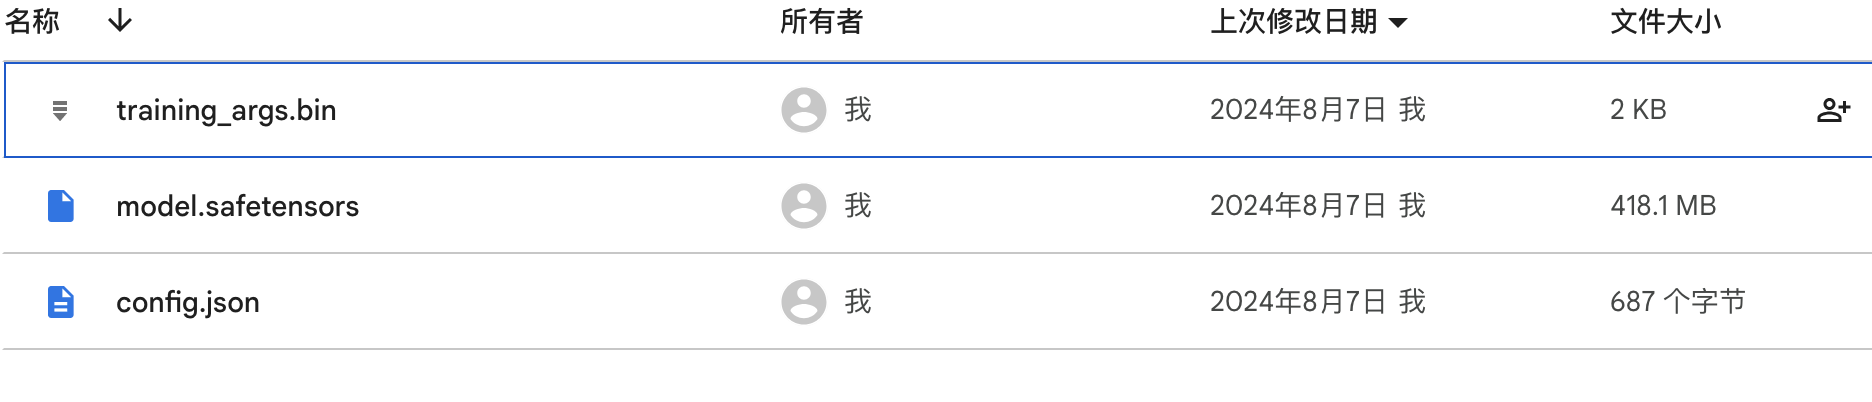